In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

import datetime

from statsmodels.graphics.mosaicplot import mosaic

In [3]:
%config InlineBackend.figure_format = 'retina'

# 1. Базовый препроцессинг (Basic preprocessing)

## 1.1. Датасет (Dataset)

In [125]:
data = pd.read_excel('Analytic_test.xlsx')

In [126]:
data.columns = data.iloc[0]
data = data[1:]
data = data.loc[:, data.columns.notna()]

In [127]:
# for checking
data.columns.to_list()

['HID',
 'active_Red',
 'has_Green_id',
 'has_Black_id',
 'has_Blue_id',
 'Blue_activity_count',
 'Blue_gmv_total',
 'Green_gvm_total',
 'Green_gvm_order_count',
 'Black_gvm_total',
 'Black_gvm_order_count',
 'Red_android',
 'Green_android',
 'Black_android',
 'Blue_android',
 'Red_apple',
 'Green_apple',
 'Black_apple',
 'Blue_apple',
 'is_msk',
 'Red_web',
 'Green_web',
 'Black_web',
 'Blue_web']

**Заметка:** нужно переименовать - `rename` `gvm` в `gmv`- **Gross Merchandise Value** и `active_Red` в `has_Red_id` по типу `has_Blue_id`.

In [128]:
data.rename(columns = {'active_Red' : 'has_Red_id',
                       'Green_gvm_total' : 'Green_gmv_total',
                       'Green_gvm_order_count' : 'Green_gmv_order_count',
                       'Black_gvm_total' : 'Black_gmv_total',
                       'Black_gvm_order_count' : 'Black_gmv_order_count'},
                        #'Blue_gmv_total':'Blue_gvm_total'
                       inplace = True)

In [130]:
new_cols = ['HID',
 'has_Red_id',
 'has_Green_id',
 'has_Black_id',
 'has_Blue_id',
     
 'Green_gmv_total',
 'Green_gmv_order_count',
 'Black_gmv_total',
 'Black_gmv_order_count',
 'Blue_gmv_total',
 'Blue_activity_count',
      
 'Red_android',
 'Green_android',
 'Black_android',
 'Blue_android',
            
 'Red_apple',
 'Green_apple',
 'Black_apple',
 'Blue_apple',
            
 'Red_web',
 'Green_web',
 'Black_web',
 'Blue_web', 'is_msk']

In [131]:
data = data[new_cols]

In [10]:
# ATTENTION
base = data

In [154]:
# ATTENTION
data = base

## 1.2. Basic

* `Hid` - human_id, зашифрованный персональный идентификатор пользователя компаний
* `has_company_id` - наличие зарегистрированного аккаунта в компании
* `company_gmv_total` - суммарный `gmv` пользователя в сервисе
* `company_gmv_order_count` - количество успешных заказов пользователя в сервисе
* `company_activity_count` - количество активных действий пользователя в сервисе
* `company_android` - установленное у пользователя приложение компании на платформе `android`
* `company_apple` - установленное у пользователя приложение компании на платформе `Apple`
* `company _web` - установленное у пользователя приложение компании на `ПК`
* `is_msk` - территориальное расположение в Москве

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   HID                    100000 non-null  object
 1   has_Red_id             100000 non-null  object
 2   has_Green_id           100000 non-null  object
 3   has_Black_id           100000 non-null  object
 4   has_Blue_id            100000 non-null  object
 5   Green_gmv_total        100000 non-null  object
 6   Green_gmv_order_count  100000 non-null  object
 7   Black_gmv_total        100000 non-null  object
 8   Black_gmv_order_count  100000 non-null  object
 9   Blue_gmv_total         99999 non-null   object
 10  Blue_activity_count    100000 non-null  object
 11  Red_android            100000 non-null  object
 12  Green_android          100000 non-null  object
 13  Black_android          100000 non-null  object
 14  Blue_android           100000 non-null  object
 15  

## 1.3. Пропущенные значения (Missing values)

In [133]:
# percentage of missing data
(data.isna().sum() / len(data)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
0,
HID,0.00%
has_Red_id,0.00%
has_Green_id,0.00%
has_Black_id,0.00%
has_Blue_id,0.00%
Green_gmv_total,0.00%
Green_gmv_order_count,0.00%
Black_gmv_total,0.00%
Black_gmv_order_count,0.00%


## 1.4. Типы значений (Values' type)

### Замена ошибок

**Заметка:** значения. которые выделяются из ряда `Series` необходимо заменить `NaN`, а впоследствии `.median`.

In [155]:
for x in data.drop(columns='HID').columns.to_list():
    for y in data[x].unique():
        if len(str(y)) > 5:
            print(x)
            print(y)
            print(type(y))

Green_gmv_order_count
2019-05-04 00:00:00
<class 'datetime.datetime'>
Green_gmv_order_count
2019-05-02 00:00:00
<class 'datetime.datetime'>
Black_gmv_total
111754
<class 'int'>
Black_gmv_total
139544
<class 'int'>
Black_gmv_total
103928
<class 'int'>
Black_gmv_total
188252
<class 'int'>
Black_gmv_order_count
2019-05-02 00:00:00
<class 'datetime.datetime'>
Black_gmv_order_count
2019-05-06 00:00:00
<class 'datetime.datetime'>
Blue_activity_count
2019-05-04 00:00:00
<class 'datetime.datetime'>
Blue_activity_count
2019-05-07 00:00:00
<class 'datetime.datetime'>
Blue_activity_count
2019-05-01 00:00:00
<class 'datetime.datetime'>
Blue_activity_count
2019-05-03 00:00:00
<class 'datetime.datetime'>
Blue_activity_count
2019-05-06 00:00:00
<class 'datetime.datetime'>


In [156]:
# np.nan or MEDIAN
data = data.applymap(lambda x: np.nan if isinstance(x, datetime.datetime) else x)

###  `NaN` : замена медианой, конвертация в `float` => `int`

In [157]:
data[data.columns[1:]] = data[data.columns[1:]].astype(float)

In [158]:
data = data.fillna(data.median())

In [159]:
data[data.columns[1:]] = data[data.columns[1:]].astype(int)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   HID                    100000 non-null  object
 1   has_Red_id             100000 non-null  int64 
 2   has_Green_id           100000 non-null  int64 
 3   has_Black_id           100000 non-null  int64 
 4   has_Blue_id            100000 non-null  int64 
 5   Green_gmv_total        100000 non-null  int64 
 6   Green_gmv_order_count  100000 non-null  int64 
 7   Black_gmv_total        100000 non-null  int64 
 8   Black_gmv_order_count  100000 non-null  int64 
 9   Blue_gmv_total         100000 non-null  int64 
 10  Blue_activity_count    100000 non-null  int64 
 11  Red_android            100000 non-null  int64 
 12  Green_android          100000 non-null  int64 
 13  Black_android          100000 non-null  int64 
 14  Blue_android           100000 non-null  int64 
 15  

In [161]:
data.describe()

,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,Black_gmv_order_count,Blue_gmv_total,Blue_activity_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,Red_web,Green_web,Black_web,Blue_web,is_msk
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.55874,0.008900,0.010840,0.138010,59.934200,0.076990,94.873080,0.043850,2.461140,0.210080,...,0.080470,0.108740,0.006160,0.017820,0.04646,0.671080,0.001980,0.014610,0.10640,0.119210
std,0.49654,0.094344,0.104032,0.360645,1230.671036,1.693774,1699.422723,0.749862,126.674085,2.099398,...,0.272021,0.311314,0.078244,0.132297,0.21048,0.469823,0.044453,0.119986,0.30835,0.324037
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.00000,0.000000
max,1.00000,2.000000,2.000000,4.000000,94106.000000,168.000000,188252.000000,60.000000,32302.000000,237.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


# 2. Fields types

In [162]:
for x in data.columns.to_list():
    print(x)
    print(data[x].unique())
    print('-----------------')

HID
['00003c7fb5e57ce673f1801f3679f5c25' '00006b602533083e3bebfcbff08613931'
 '0000736c3f76339196cb1cc759b8363b' ...
 '325563dbbb35c393be38c5c79373ed180' '3255650825570bcc93bc9b076b0bfbb25e6'
 '325566ec18c0db59083f5f6bb1b5f93d5']
-----------------
has_Red_id
[0 1]
-----------------
has_Green_id
[0 1 2]
-----------------
has_Black_id
[0 1 2]
-----------------
has_Blue_id
[1 0 2 3 4]
-----------------
Green_gmv_total
[    0  2516 23766  2448  1146 37960  2340  9056  4136   500  3092  3000
  1974  4724  4330  1940  1122  1420  2540 29396  2040  1844  1900  7418
 27582  9154  6492  2132 11806  9316  5766   400  8078   840  2924  2306
  1000  1136   540  1888   480  6658  2548  2914 65174   800   678  2676
  2258  2240  1364  9250 11042  5406  2610  1108  1106  1488   712 34494
  1578  6884  5750   478 18388  1238  5434 20566   362  7182   814  4830
  8338  2876  4632  1762   898 18576  1832  5292 15398   490  5550  3582
   592  4610 10690  3396  2450  5696  5194  5518  3138  6790 12968   9

## `fields`

* `Hid` - human_id, зашифрованный персональный идентификатор пользователя компаний
* `has_company_id` - наличие зарегистрированного аккаунта в компании
* `company_gmv_total` - суммарный `gmv` пользователя в сервисе
* `company_gmv_order_count` - количество успешных заказов пользователя в сервисе
* `company_activity_count` - количество активных действий пользователя в сервисе
* `company_android` - установленное у пользователя приложение компании на платформе `android`
* `company_apple` - установленное у пользователя приложение компании на платформе `Apple`
* `company _web` - установленное у пользователя приложение компании на `ПК`
* `is_msk` - территориальное расположение в Москве

In [163]:
#is_msk + HID
has_id_cols = data.columns[data.columns.str.contains('has')]
gmv_total_cols = data.columns[data.columns.str.contains('gmv_total')]
gmv_order_count_cols = data.columns[data.columns.str.contains('_gmv_order_count')]
activity_count_cols = data.columns[data.columns.str.contains('_activity_count')]
adroid_cols = data.columns[data.columns.str.contains('android')]
apple_cols = data.columns[data.columns.str.contains('apple')]
web_cols = data.columns[data.columns.str.contains('web')]

In [164]:
not_numeric = ['has_Red_id','has_Green_id','has_Black_id','has_Blue_id','Red_android','Green_android','Black_android',
          'Blue_android','Red_apple','Green_apple','Black_apple','Blue_apple','Red_web','Green_web','Black_web',
          'Blue_web', 'is_msk']
numeric = ['Green_gmv_total', 'Black_gmv_total', 'Blue_gmv_total', 'Green_gmv_order_count', 'Black_gmv_order_count',
               'Blue_activity_count']

## Выбросы

**Заметка:** для очистки данных от выбросов, выведем квантили по колонкам, затем - применим границу 0.95 квантиля для очистки данных.

In [165]:
for x in numeric_cols:
    print(x)
    print('0.25 квантиль:', data[x][data[x] > 0].quantile(0.25).round(3))
    print('0.25 квантиль:', column_data.quantile(0.25).round(3))
    print('0.5 квантиль:', data[x][data[x] > 0].quantile(0.5).round(3))
    print('0.75 квантиль:', data[x][data[x] > 0].quantile(0.75).round(3))
    print('0.95 квантиль:', data[x][data[x] > 0].quantile(0.95).round(3))
    print('0.75 квантиль + 4 IQR:', data[x][data[x] > 0].quantile(0.75) +\
    scipy.stats.iqr(data[x][data[x] > 0])*4)
    print('----------')

Green_gmv_total
0.25 квантиль: 1220.5
0.25 квантиль: 1.0
0.5 квантиль: 2861.0
0.75 квантиль: 6881.5
0.95 квантиль: 25756.0
0.75 квантиль + 4 IQR: 29525.5
----------
Black_gmv_total
0.25 квантиль: 2036.0
0.25 квантиль: 1.0
0.5 квантиль: 4160.0
0.75 квантиль: 9554.0
0.95 квантиль: 32990.4
0.75 квантиль + 4 IQR: 39626.0
----------
Blue_gmv_total
0.25 квантиль: 31.0
0.25 квантиль: 1.0
0.5 квантиль: 120.0
0.75 квантиль: 418.0
0.95 квантиль: 2230.0
0.75 квантиль + 4 IQR: 1966.0
----------
Green_gmv_order_count
0.25 квантиль: 1.0
0.25 квантиль: 1.0
0.5 квантиль: 4.0
0.75 квантиль: 9.0
0.95 квантиль: 32.0
0.75 квантиль + 4 IQR: 41.0
----------
Black_gmv_order_count
0.25 квантиль: 1.0
0.25 квантиль: 1.0
0.5 квантиль: 2.0
0.75 квантиль: 4.0
0.95 квантиль: 15.0
0.75 квантиль + 4 IQR: 16.0
----------
Blue_activity_count
0.25 квантиль: 1.0
0.25 квантиль: 1.0
0.5 квантиль: 2.0
0.75 квантиль: 6.0
0.95 квантиль: 20.0
0.75 квантиль + 4 IQR: 26.0
----------


In [166]:
data_cleaned = data[(data['Green_gmv_total'] < 39626.0)]
data_cleaned = data_cleaned[(data_cleaned['Black_gmv_total'] <= 39626.0)]
data_cleaned = data_cleaned[(data_cleaned['Blue_gmv_total'] <= 1966.0)]
data_cleaned = data_cleaned[(data_cleaned['Green_gmv_order_count'] <= 41.0)]
data_cleaned = data_cleaned[(data_cleaned['Black_gmv_order_count'] <= 16.0)]
data_cleaned = data_cleaned[(data_cleaned['Blue_activity_count'] <= 26.0)]

### `numeric`

**Заметка:** для дальнейших выводов рассмотрим `continuous` признаки на нормальность распредления:
* на гистограмах (графически)
* совместим теоретические и эмпирические квантили
* построим боксплот с усами

Также для формальности тестов используем статистичесские тесты на параметры распределения.

In [167]:
def visualize_property(series, label):
    ####sns.set(rc = {'figure.figsize':(16, 20)}) 
    fig, axs = plt.subplots(3, figsize = (16,20))

    #axs[0].set_title('Histogram')
    axs[0].set_title('Histogram of {}'.format(label))
    sns.distplot(series, ax = axs[0])
    #axs[1].set_title('QQ')
    axs[1].set_title('QQ of {}'.format(label))
    scipy.stats.probplot(series, dist="norm", plot=axs[1])
    #axs[2].set_title('Box plot')
    axs[2].set_title('Box plot of {}'.format(label))
    sns.boxplot(series, orient = 'h', ax = axs[2]) # hue
    
    print("Jarque-Bera test statistic of {}".format(label), scipy.stats.jarque_bera(series)[0].round(3))
    print("Jarque-Bera p-value = {}".format(label), scipy.stats.jarque_bera(series)[1].round(3))
    print("Skewness test statistic = {}".format(label), scipy.stats.skewtest(series)[0].round(3))
    print("Skewness p-value = {}".format(label), scipy.stats.skewtest(series)[1].round(3))

Jarque-Bera test statistic of Green_gmv_total 1831.028
Jarque-Bera p-value = Green_gmv_total 0.0
Skewness test statistic = Green_gmv_total 17.103
Skewness p-value = Green_gmv_total 0.0
Jarque-Bera test statistic of Black_gmv_total 1818.525
Jarque-Bera p-value = Black_gmv_total 0.0
Skewness test statistic = Black_gmv_total 18.165
Skewness p-value = Black_gmv_total 0.0
Jarque-Bera test statistic of Blue_gmv_total 651.738
Jarque-Bera p-value = Blue_gmv_total 0.0
Skewness test statistic = Blue_gmv_total 11.673
Skewness p-value = Blue_gmv_total 0.0
Jarque-Bera test statistic of Green_gmv_order_count 1327.104
Jarque-Bera p-value = Green_gmv_order_count 0.0
Skewness test statistic = Green_gmv_order_count 16.538
Skewness p-value = Green_gmv_order_count 0.0
Jarque-Bera test statistic of Black_gmv_order_count 1309.766
Jarque-Bera p-value = Black_gmv_order_count 0.0
Skewness test statistic = Black_gmv_order_count 17.485
Skewness p-value = Black_gmv_order_count 0.0
Jarque-Bera test statistic of Bl

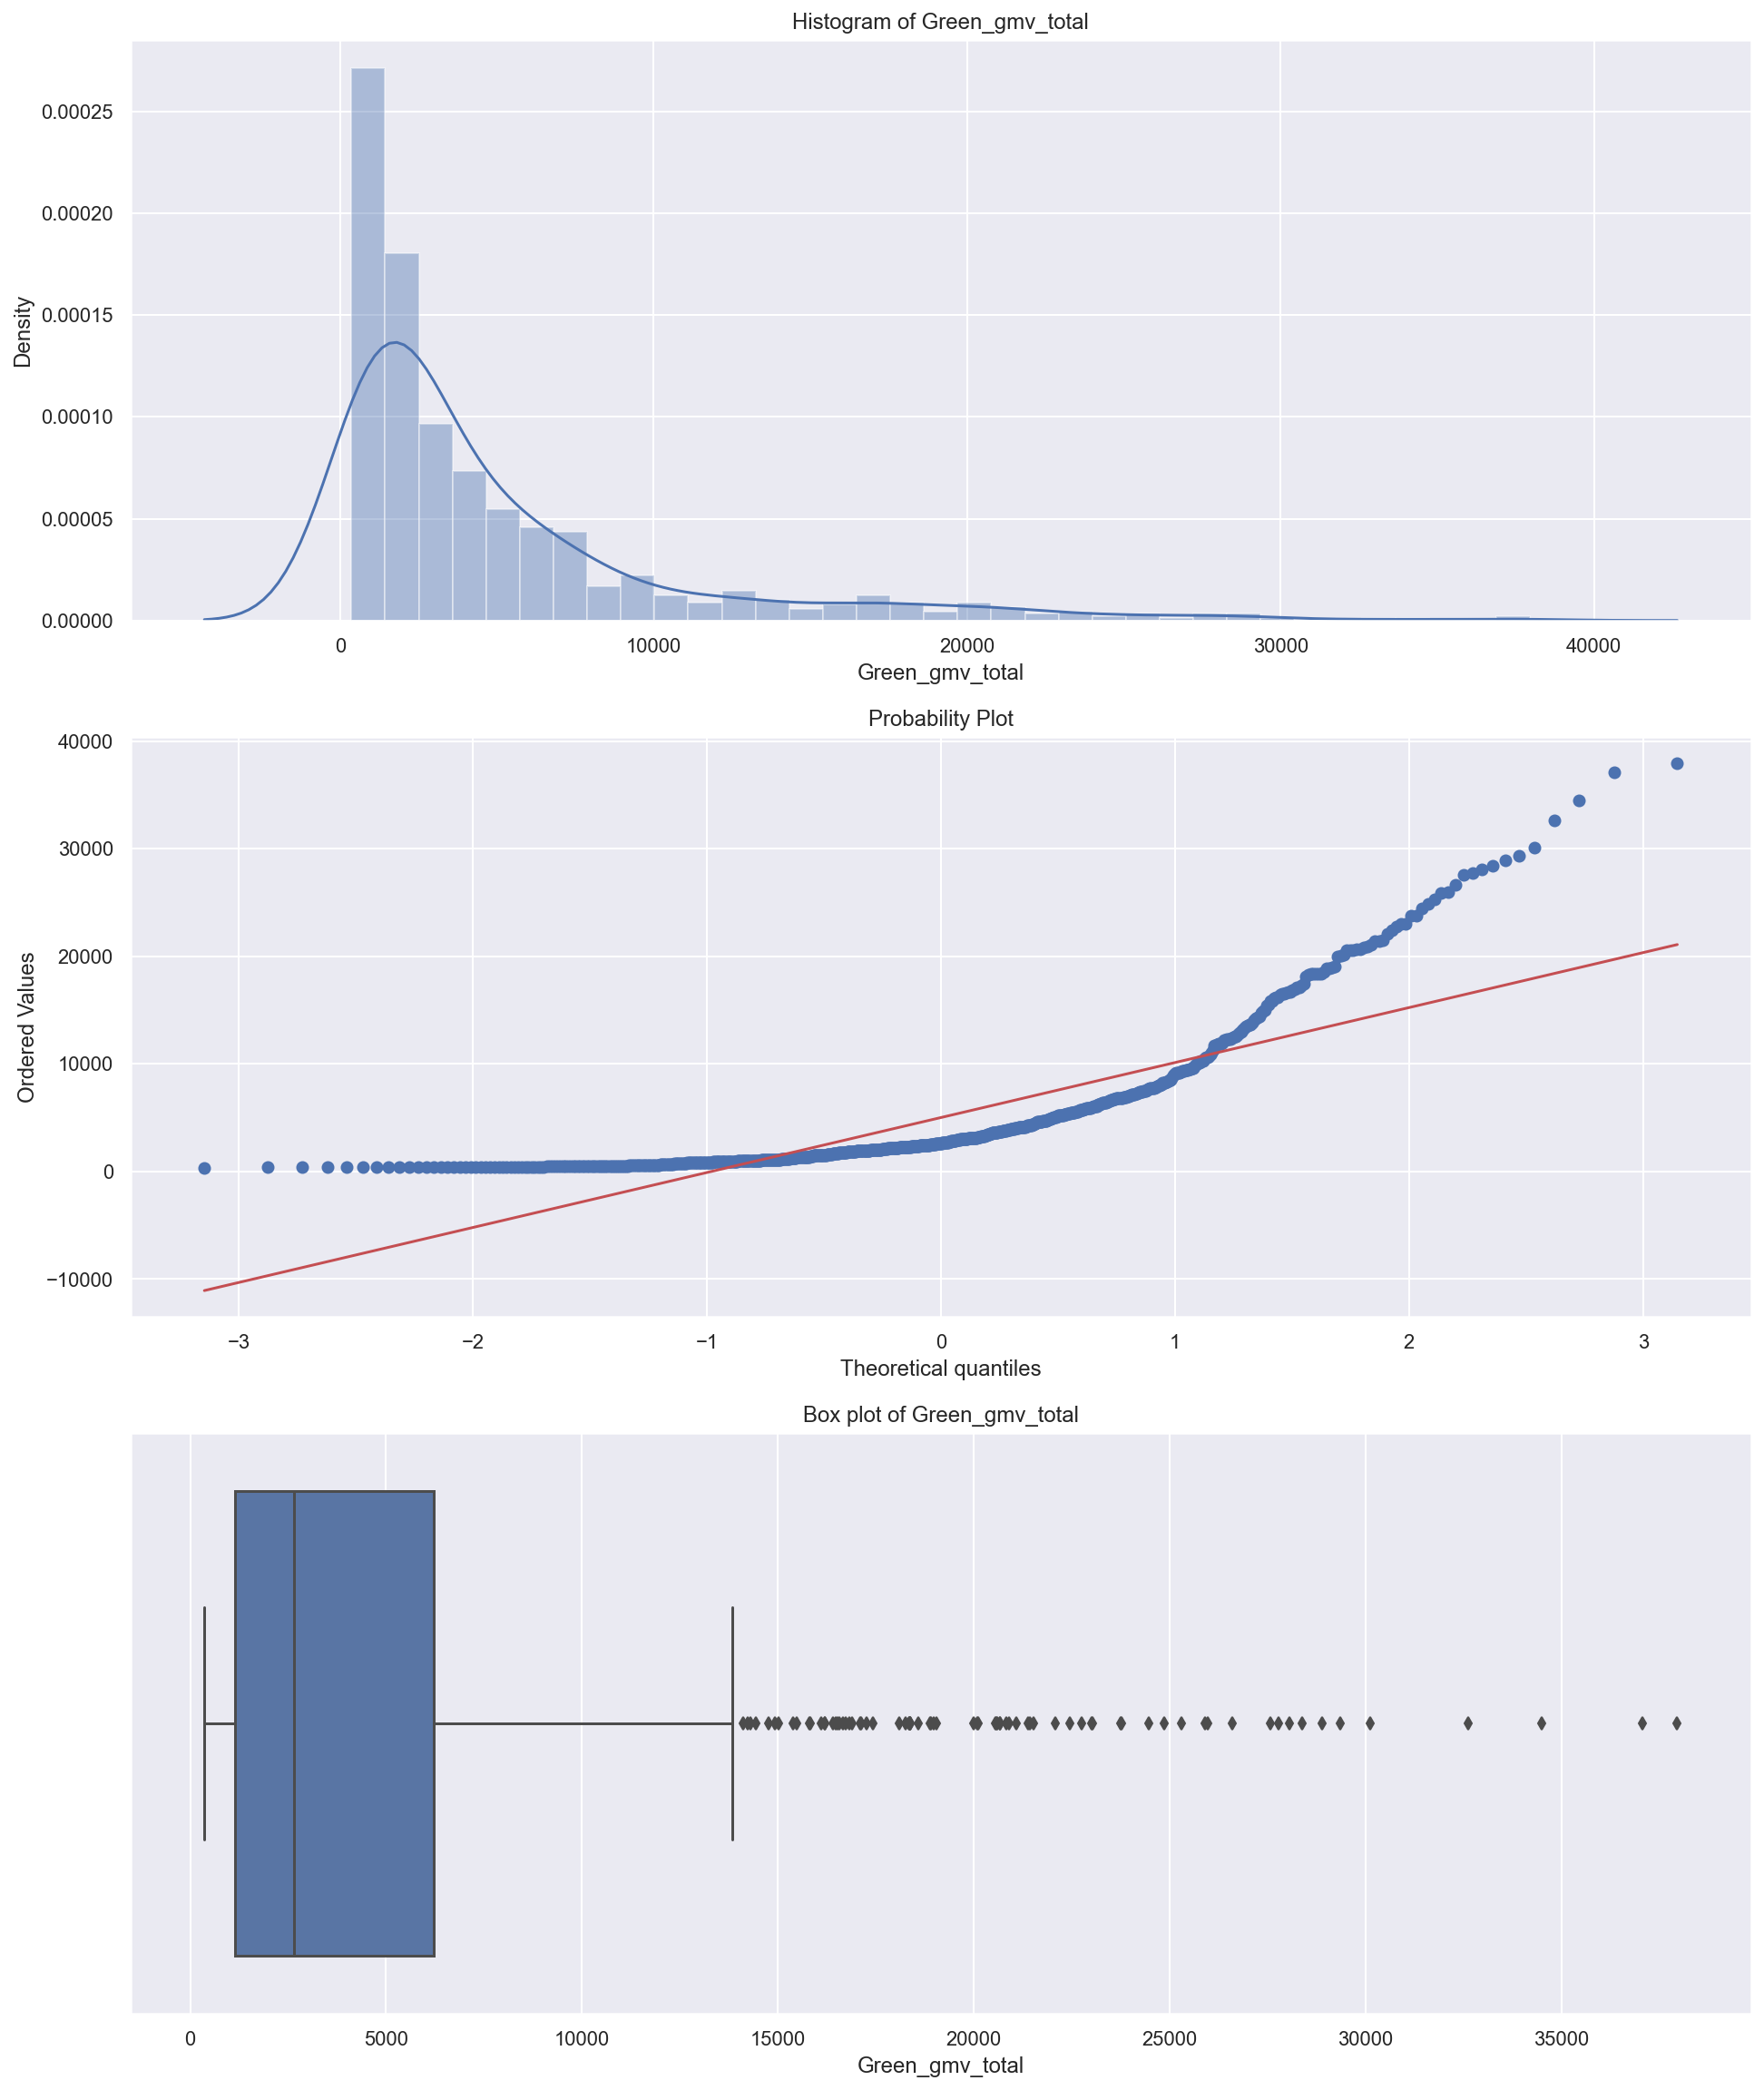

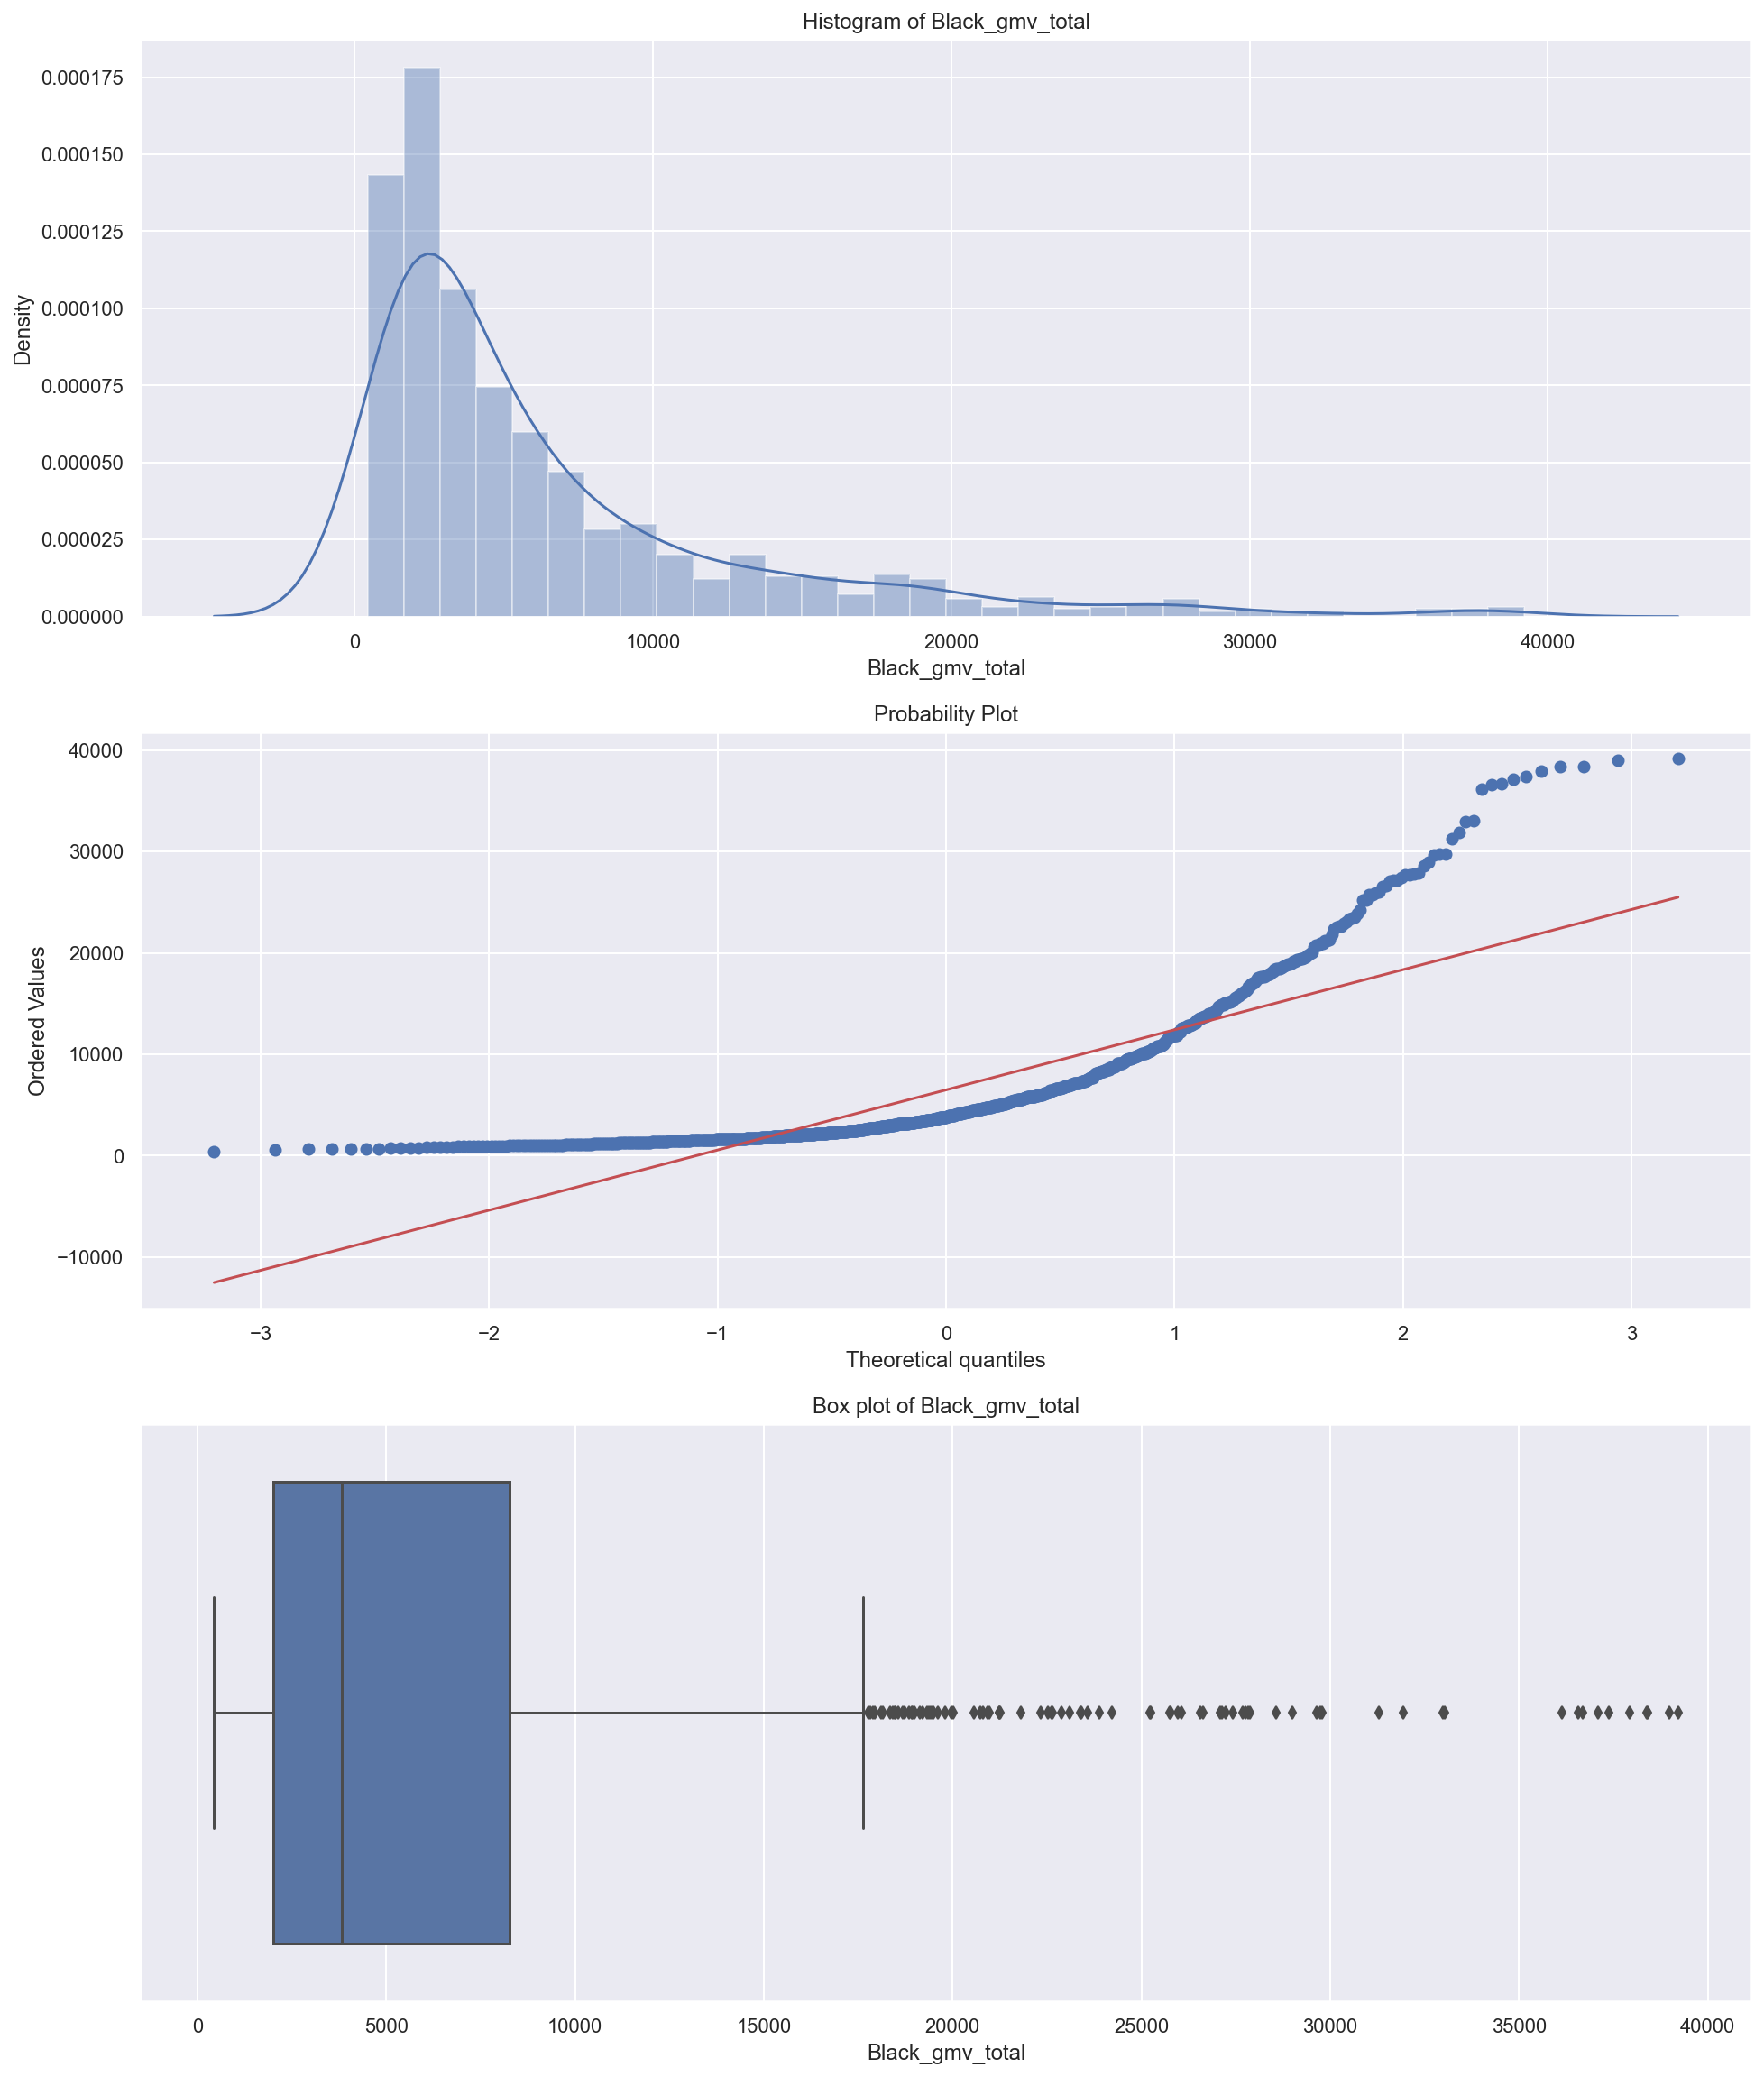

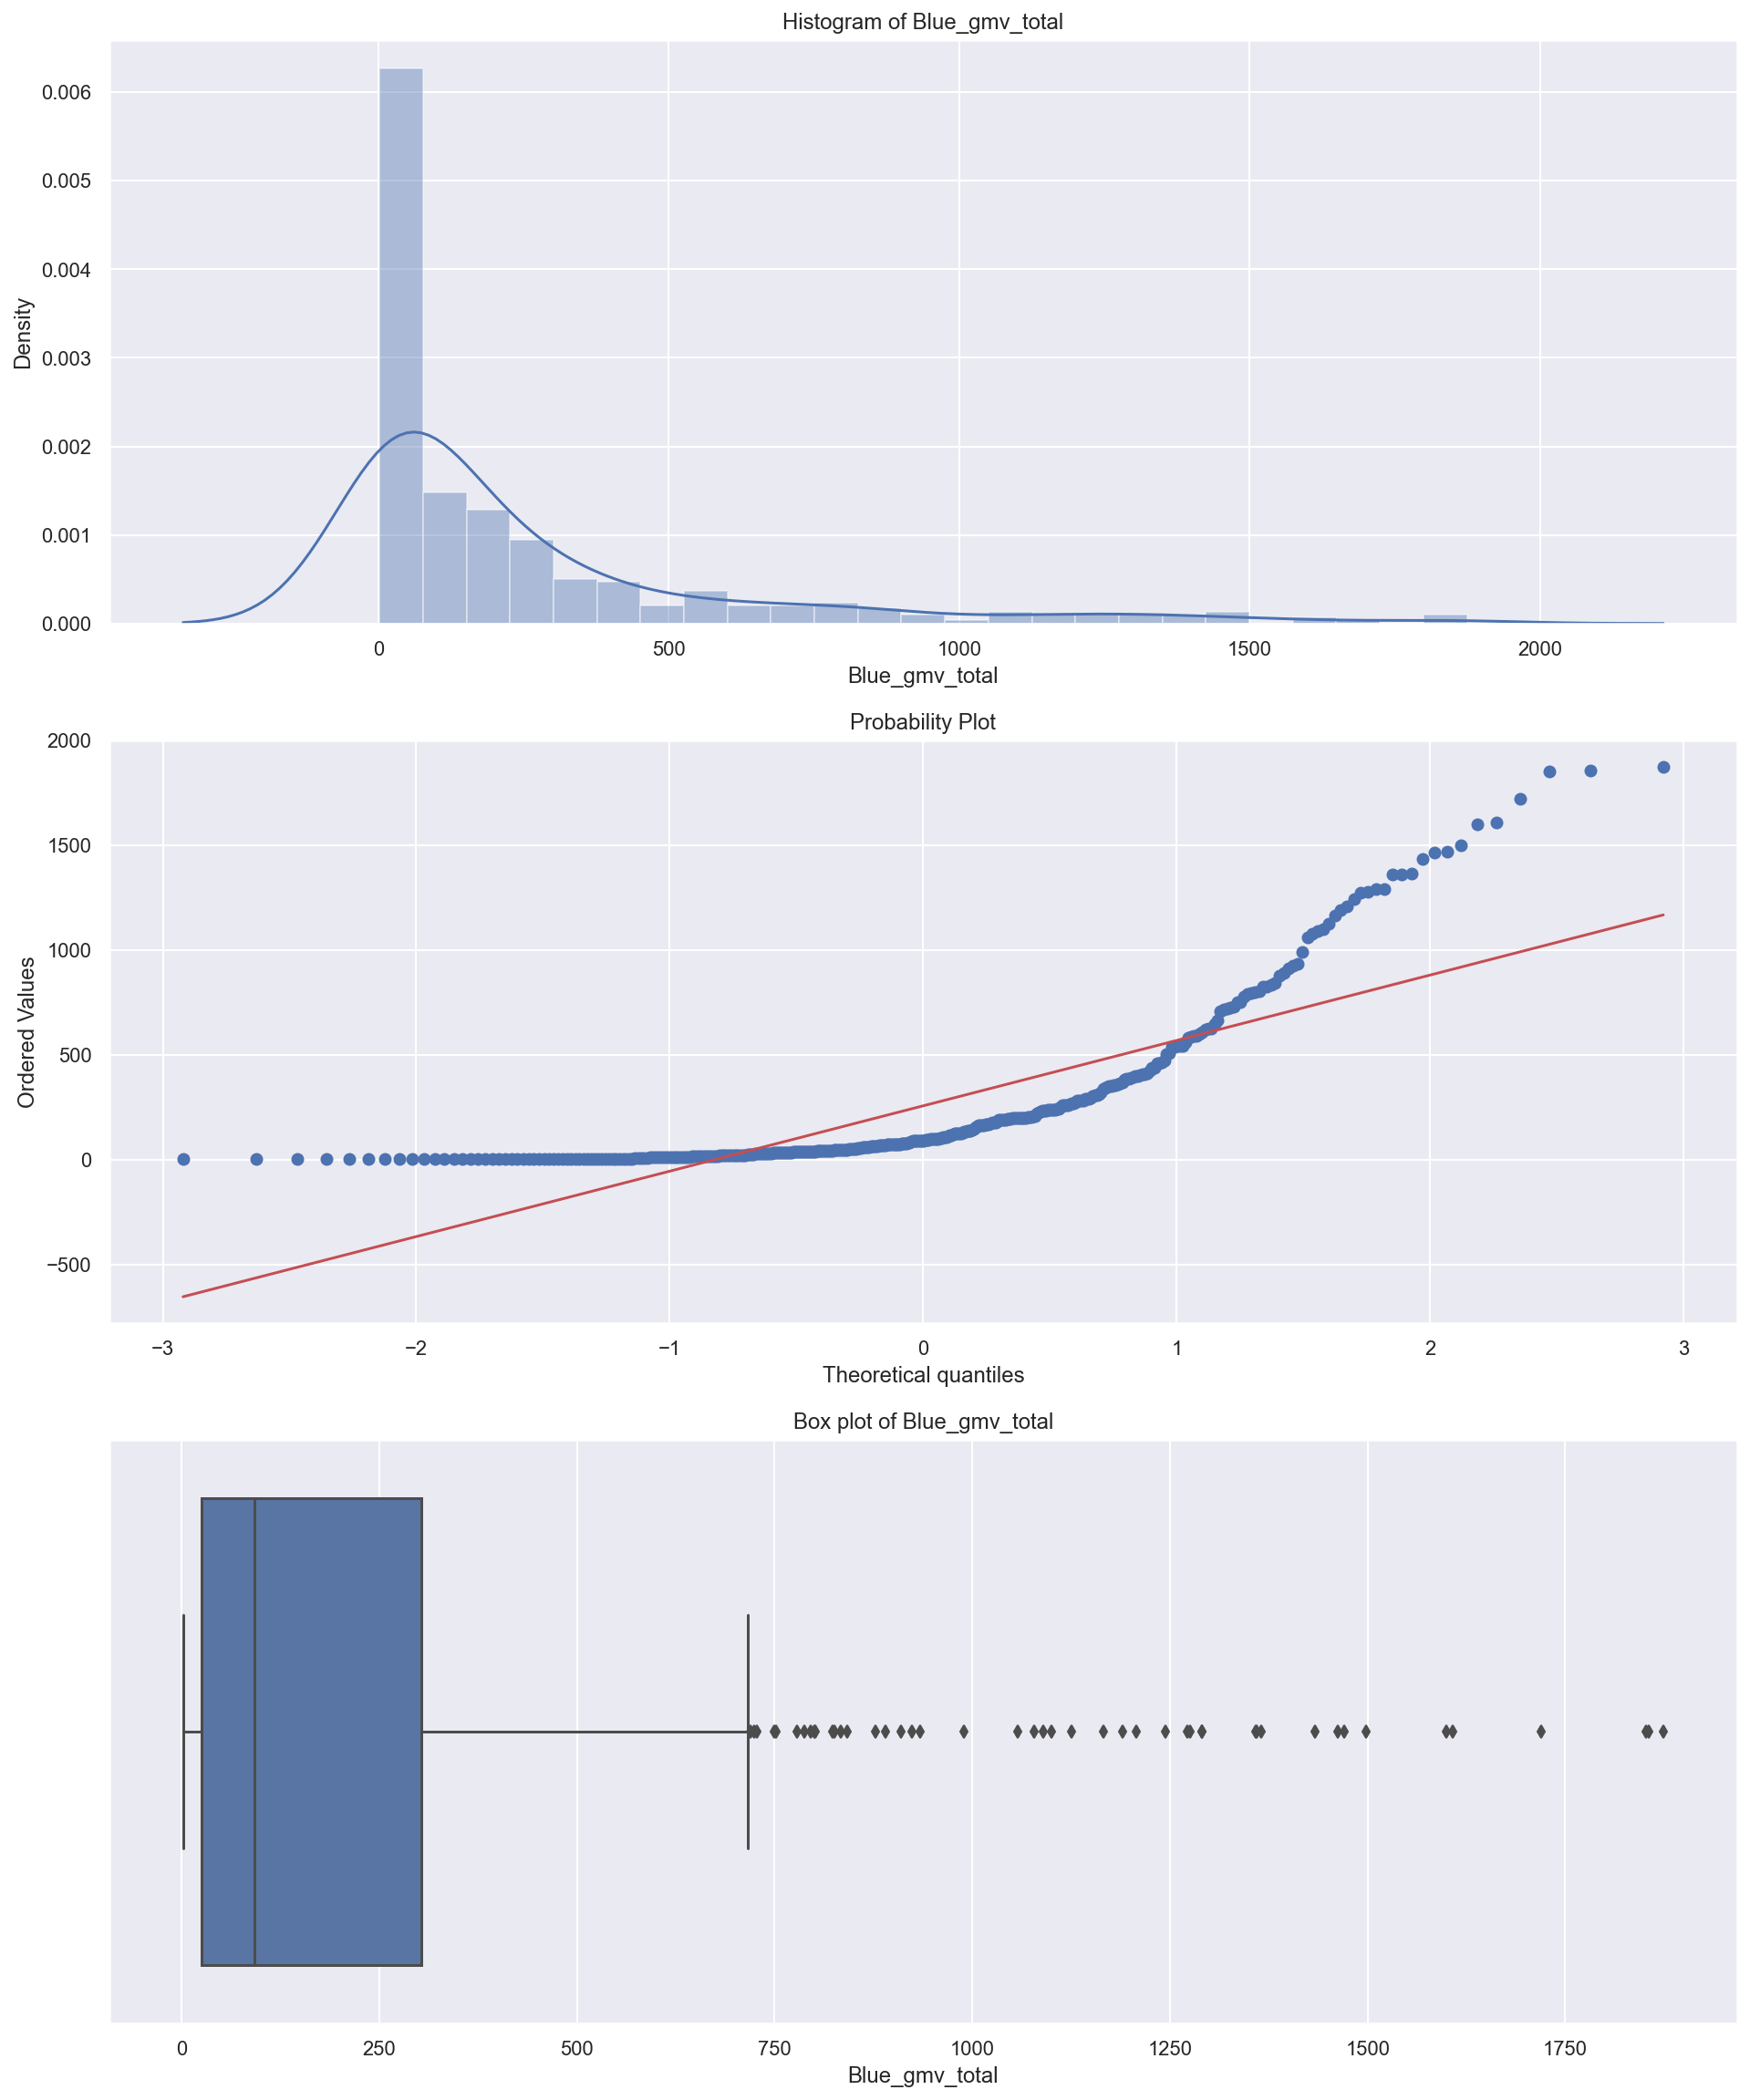

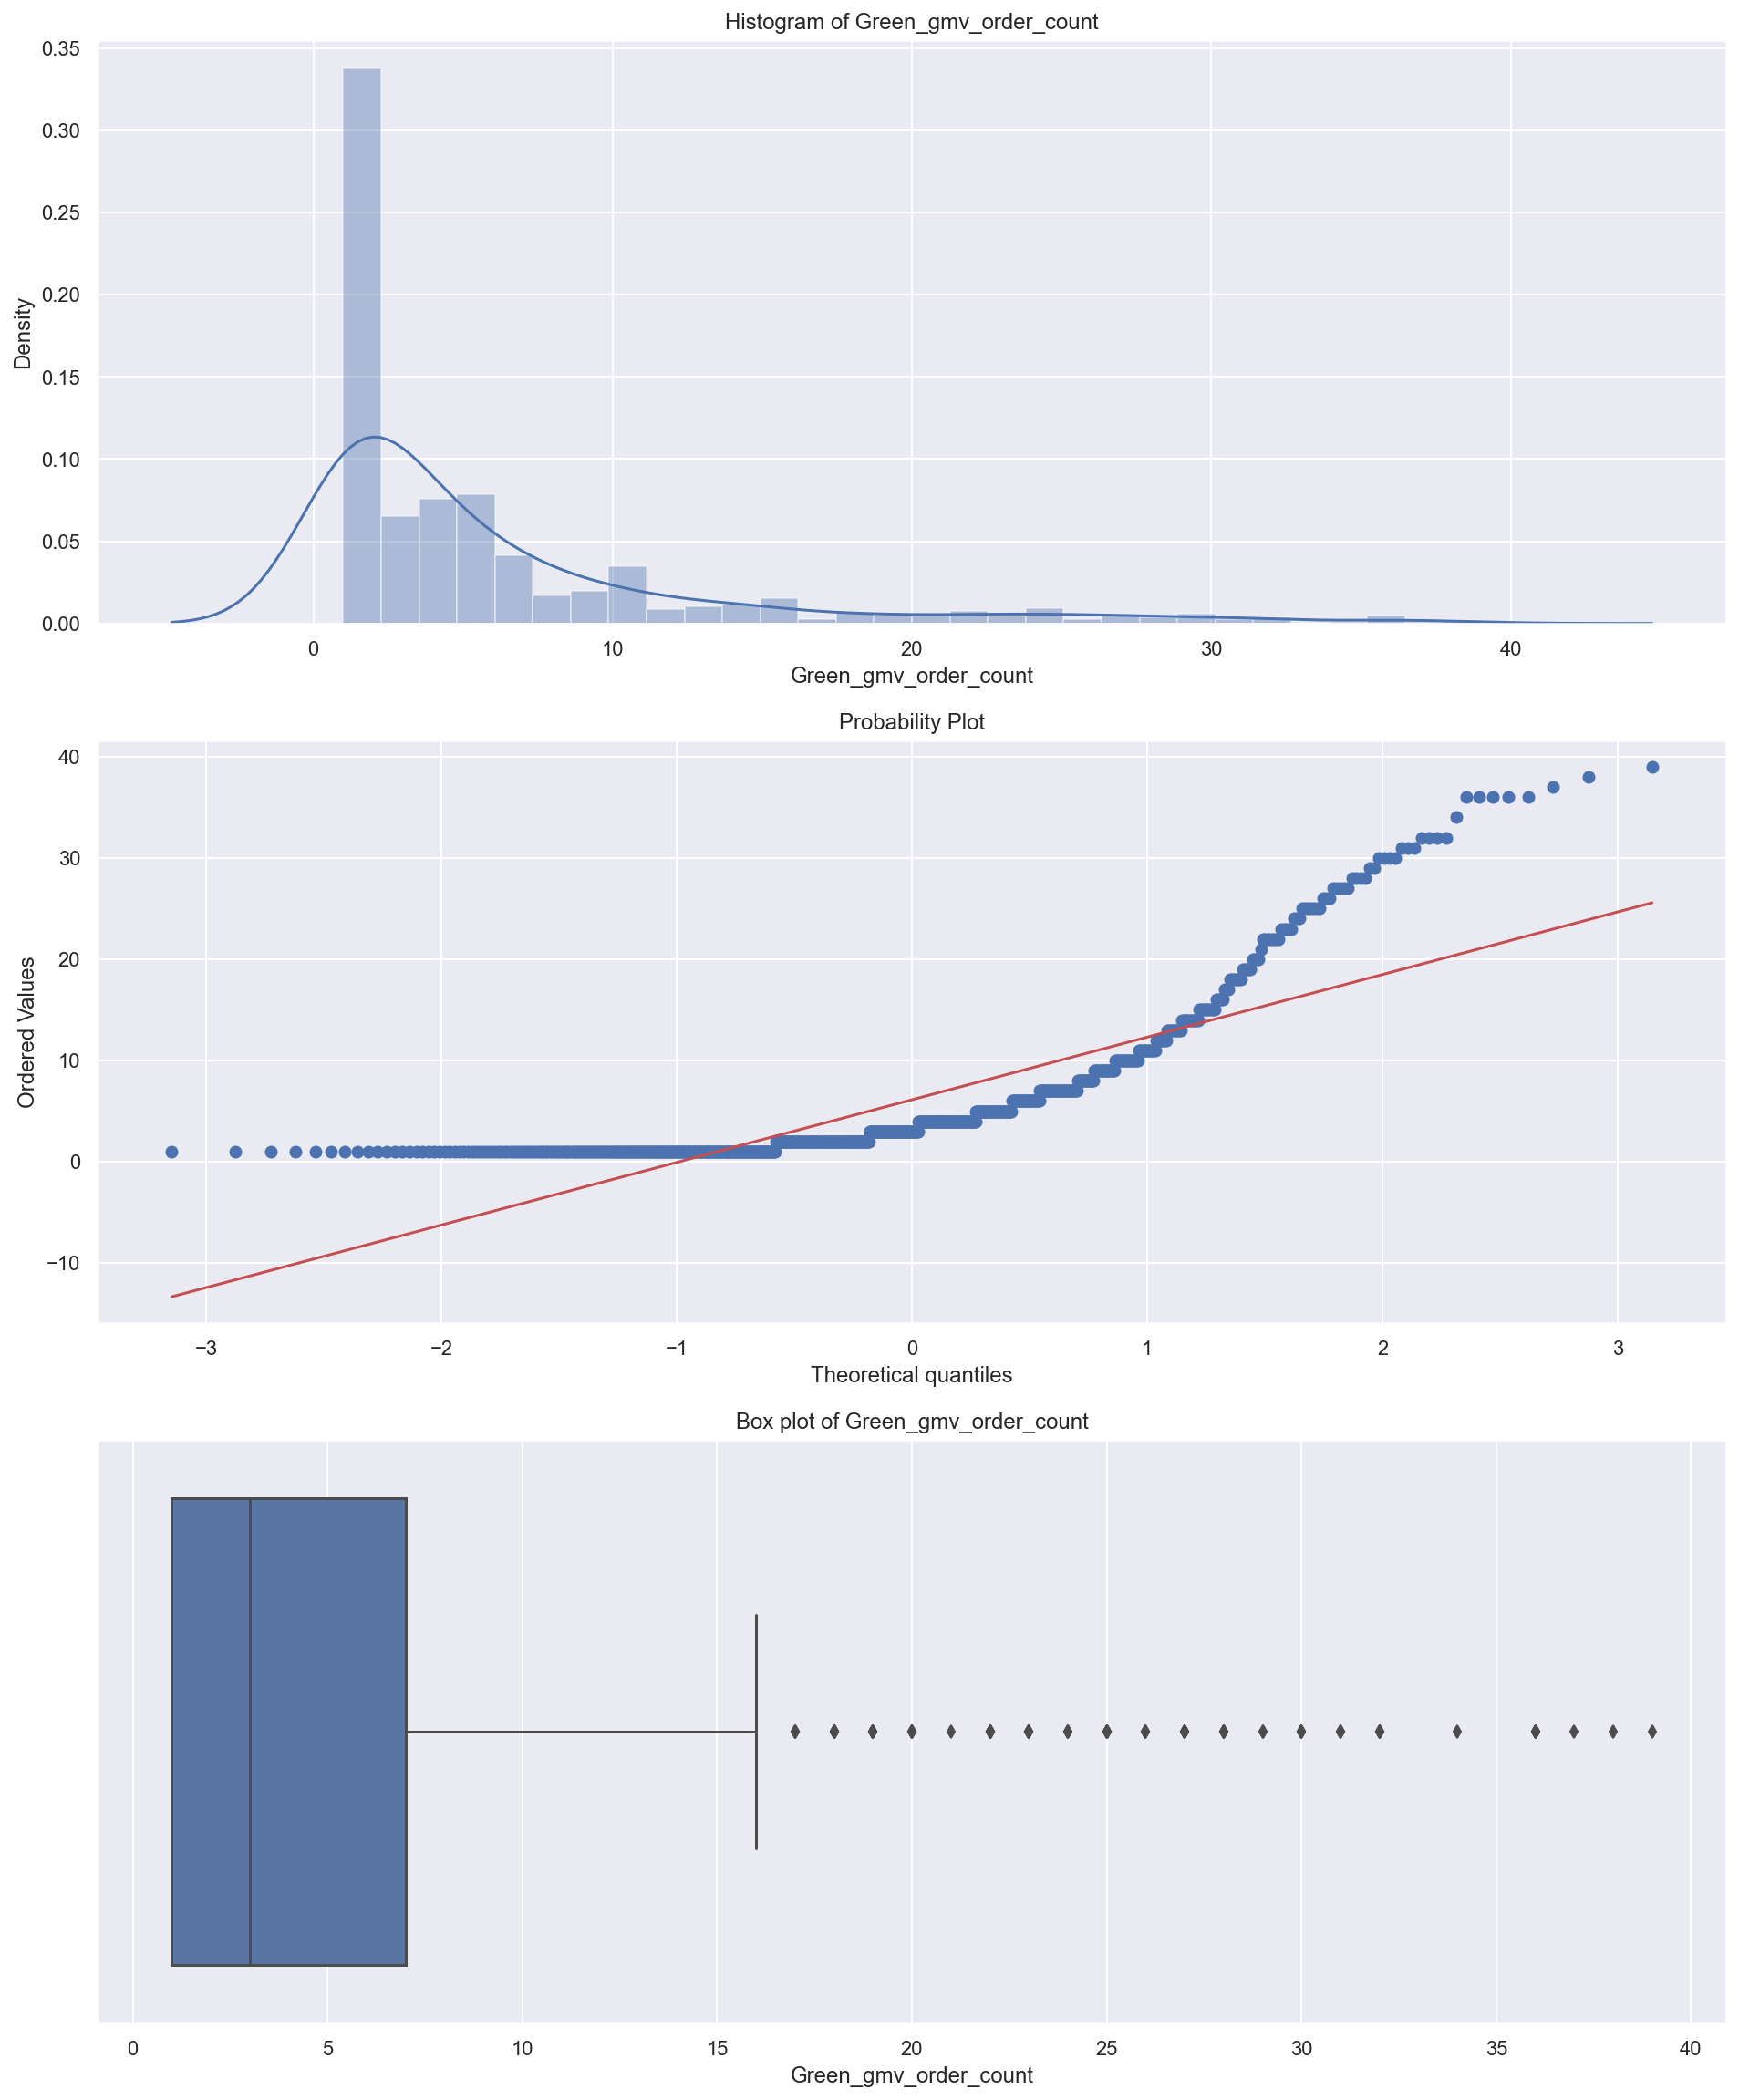

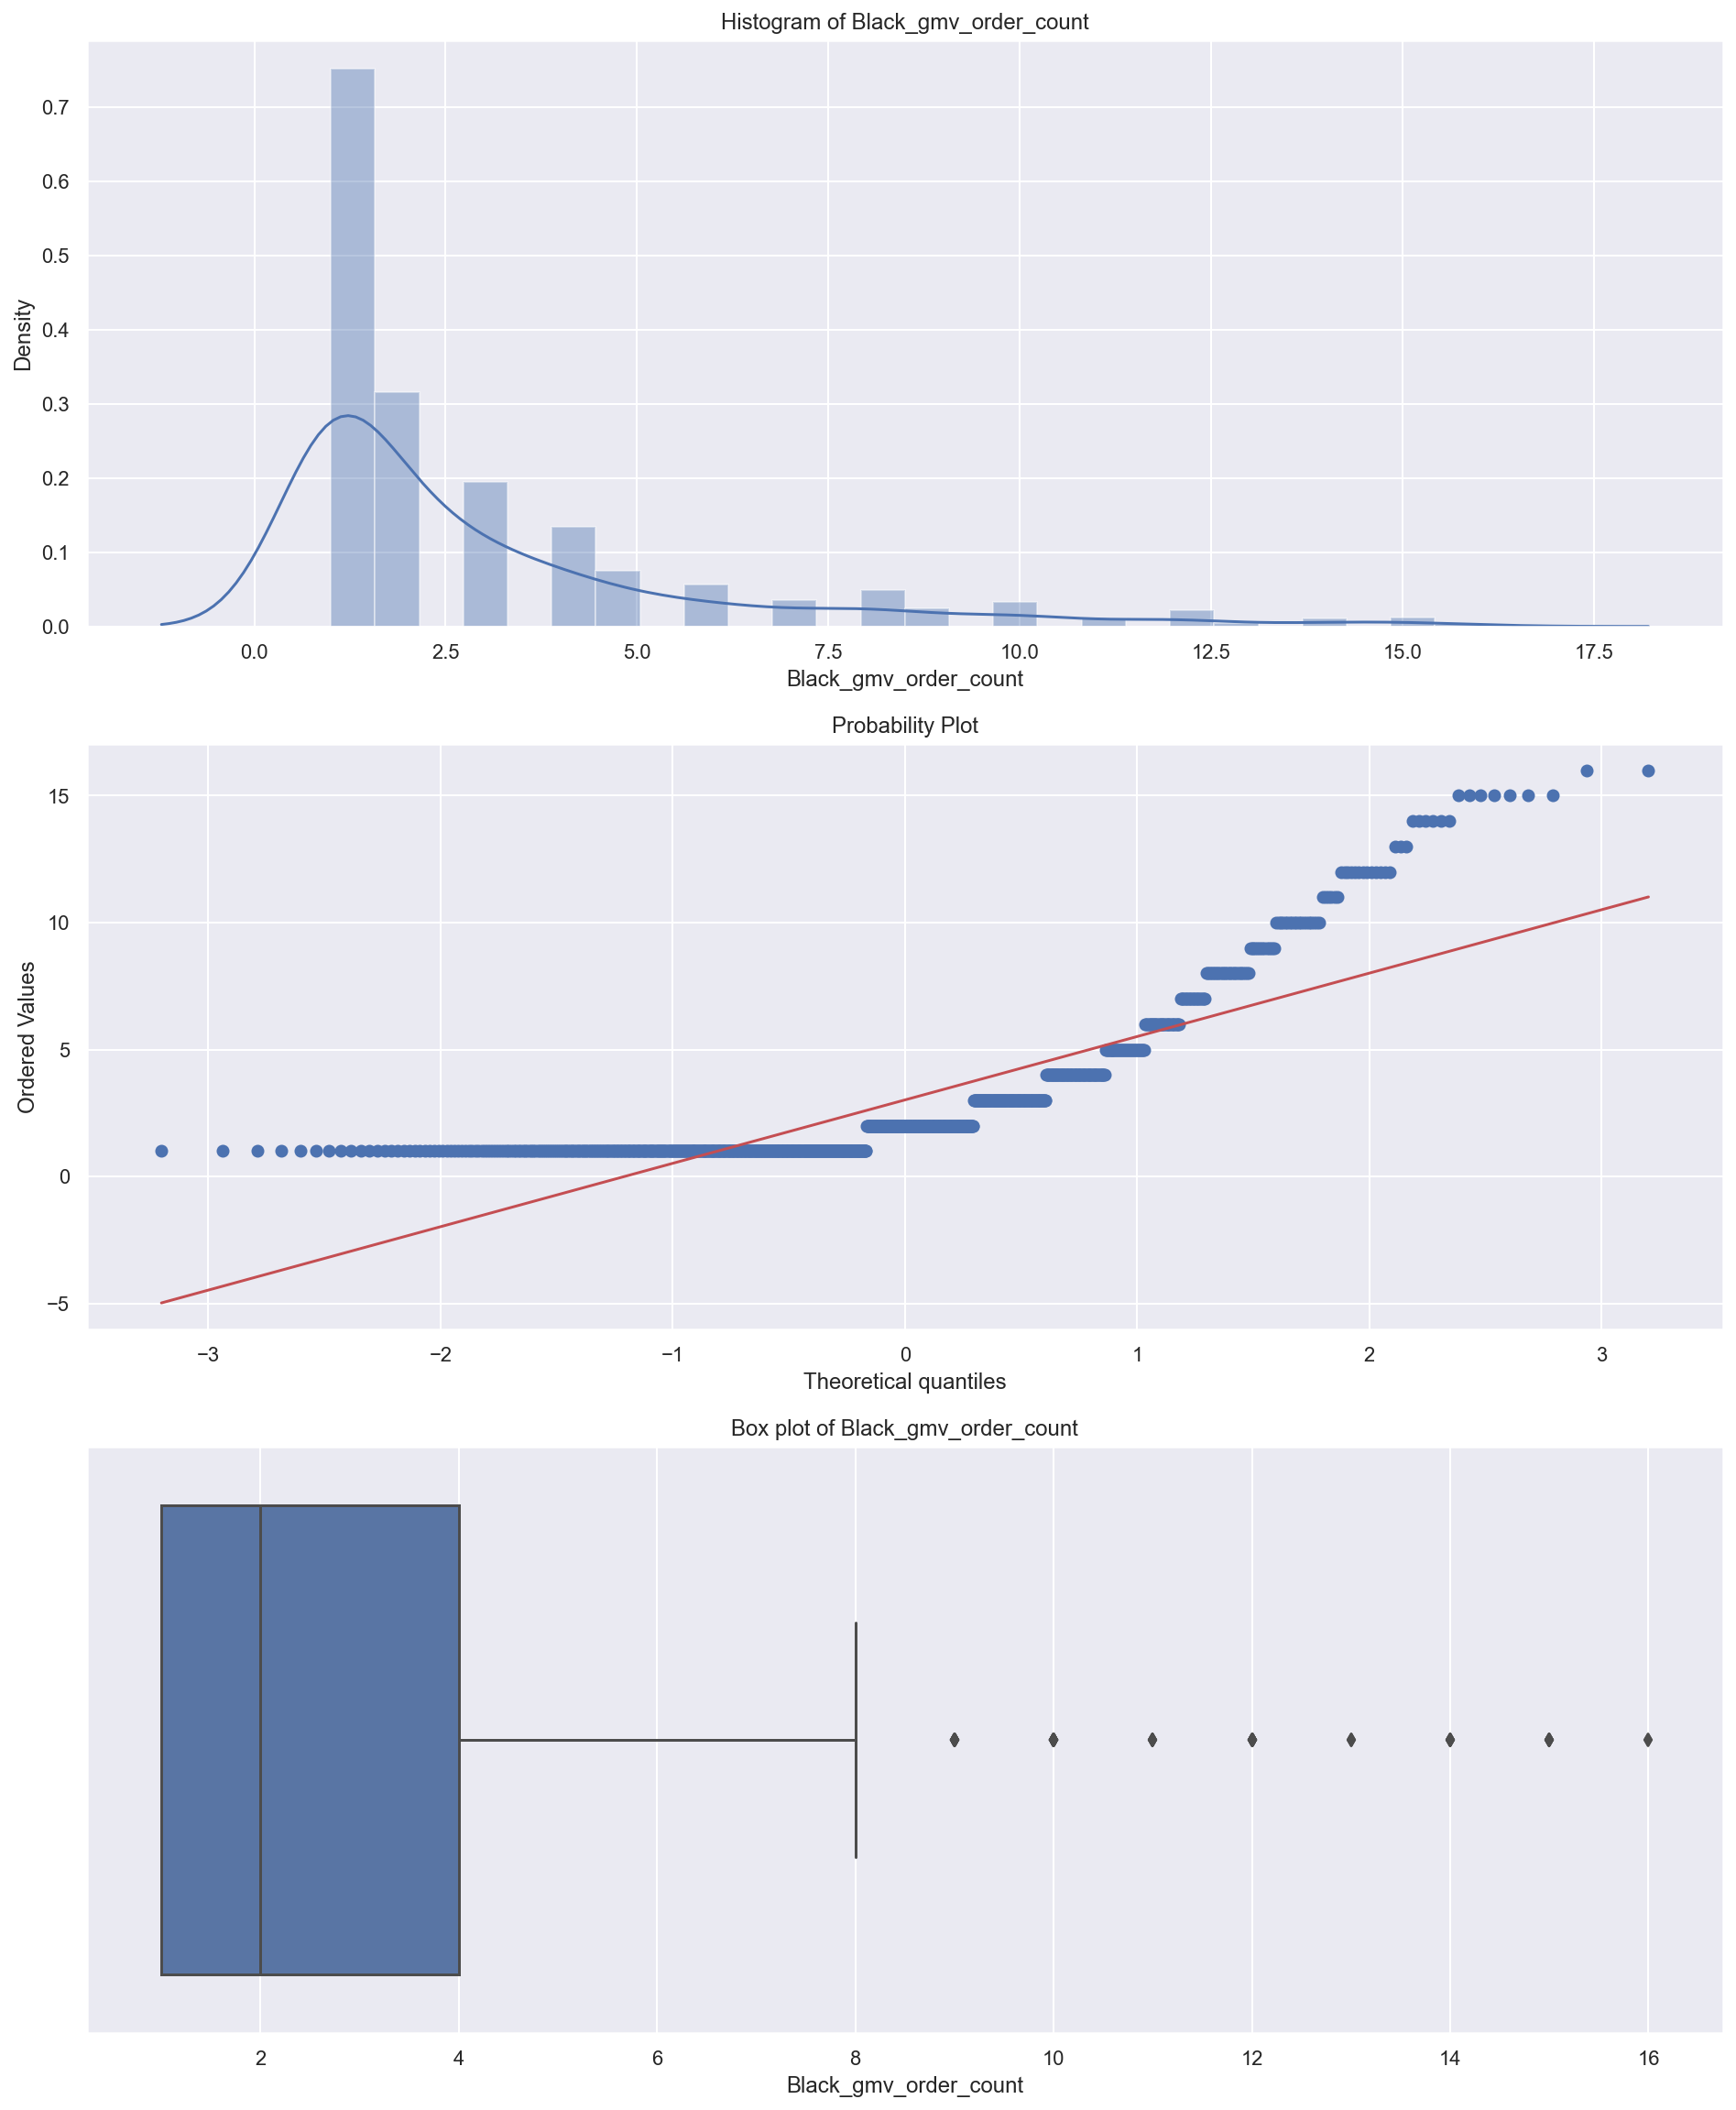

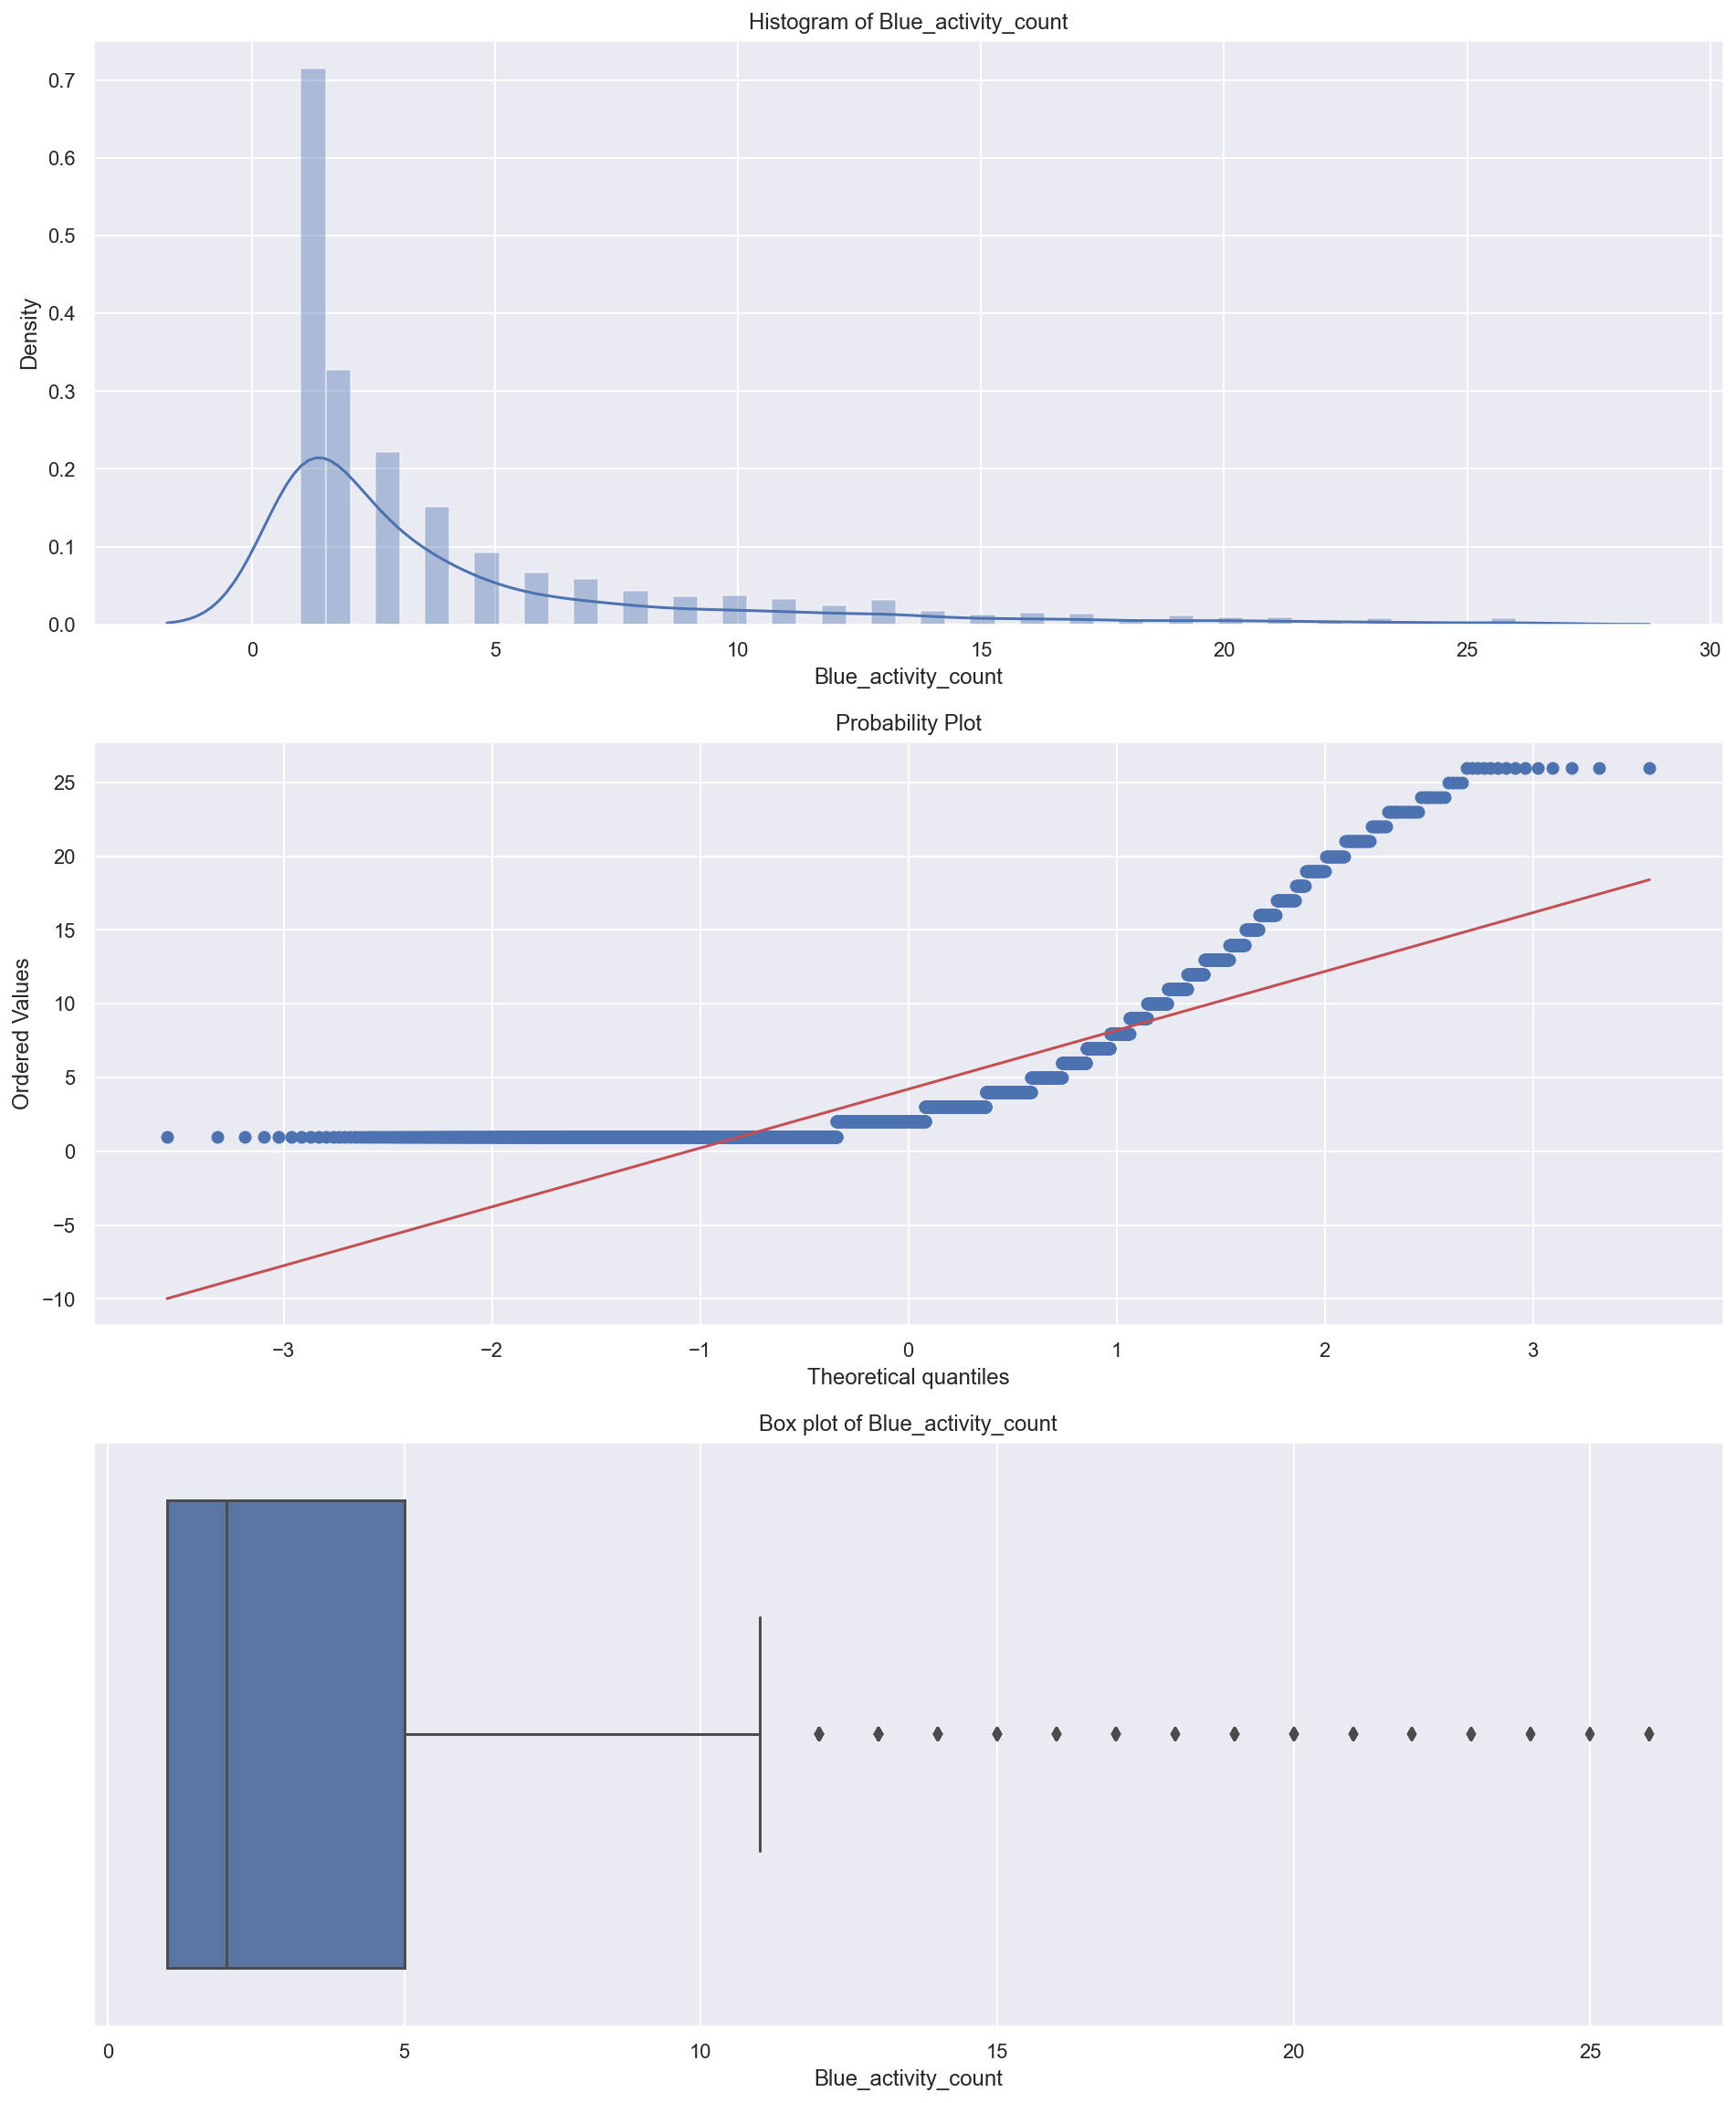

In [168]:
for x in numeric:
    graph = data_cleaned[data_cleaned[x] > 0][x]
    visualize_property(graph, str(x))

**Вывод:** для компания Blue, Black, Green распределения глобального `GMV` и количества заказов, а также пользовательской активности - распределения со смещением вправо - большинство пользователей имеют значения данных признаков мниже среднего.

### `not_numeric`

**Заметка:** для признаков с малым колисетвом уникальных значений строим `countplot`.

has_Red_id


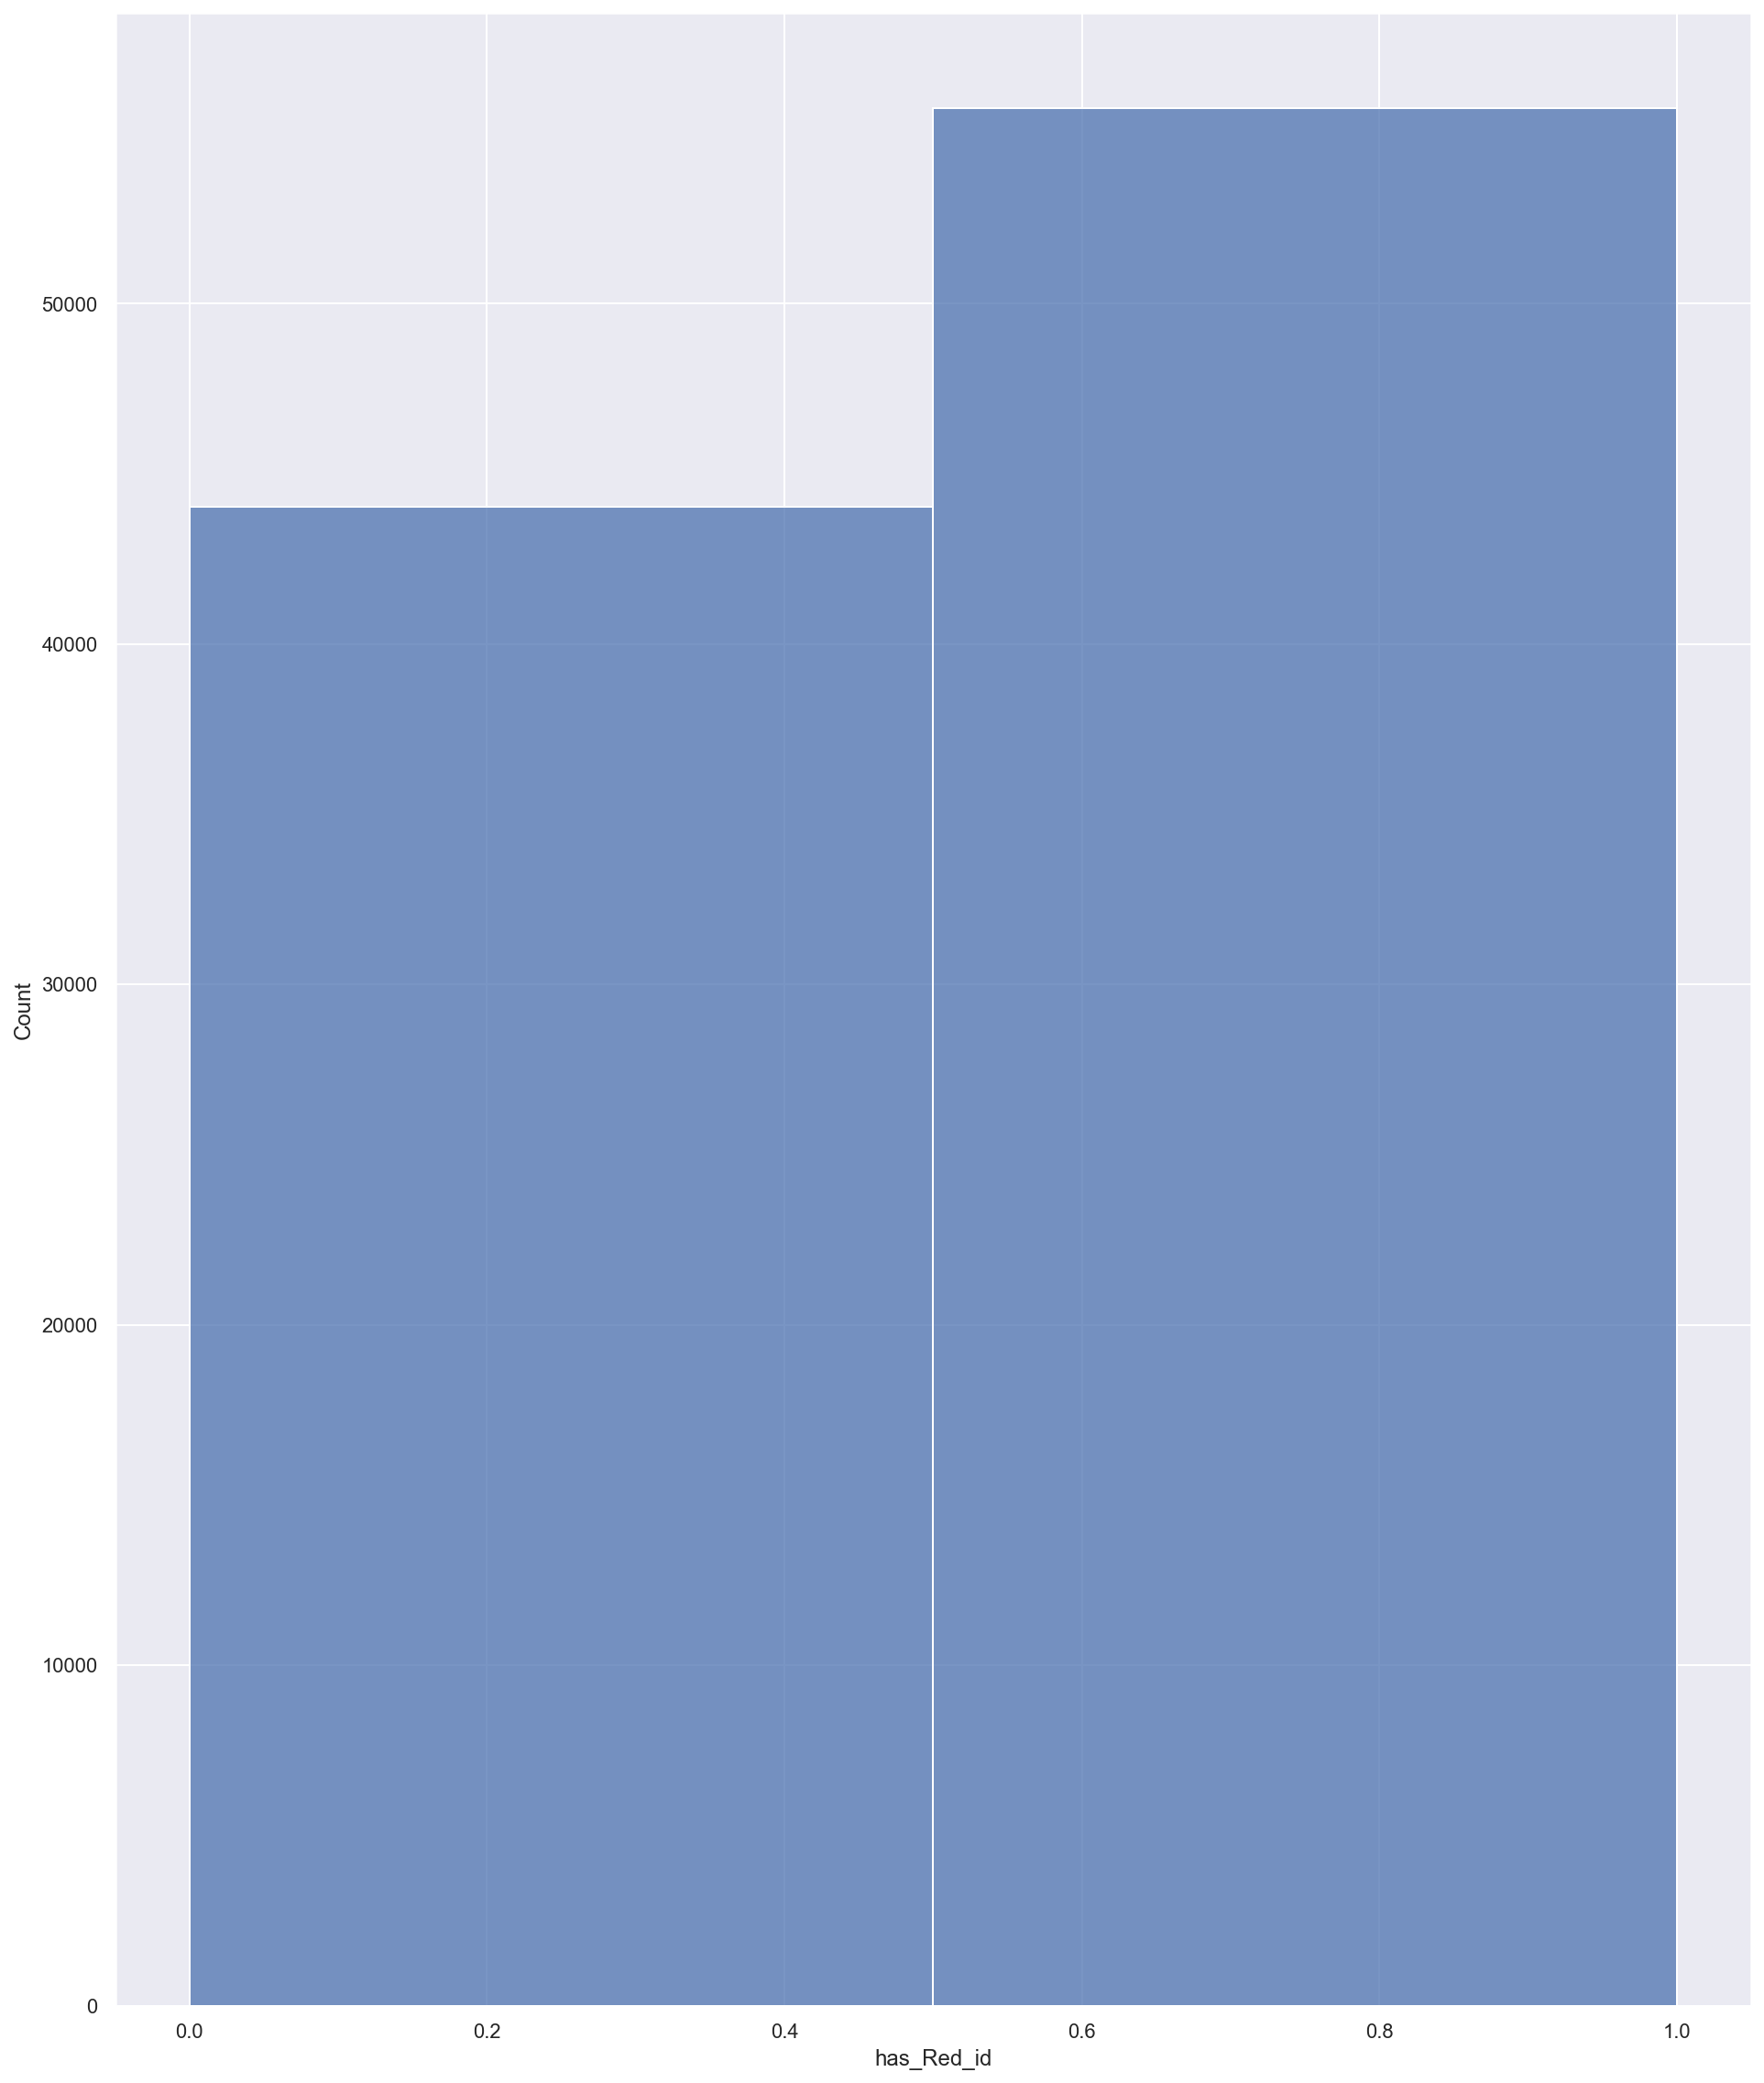

has_Green_id


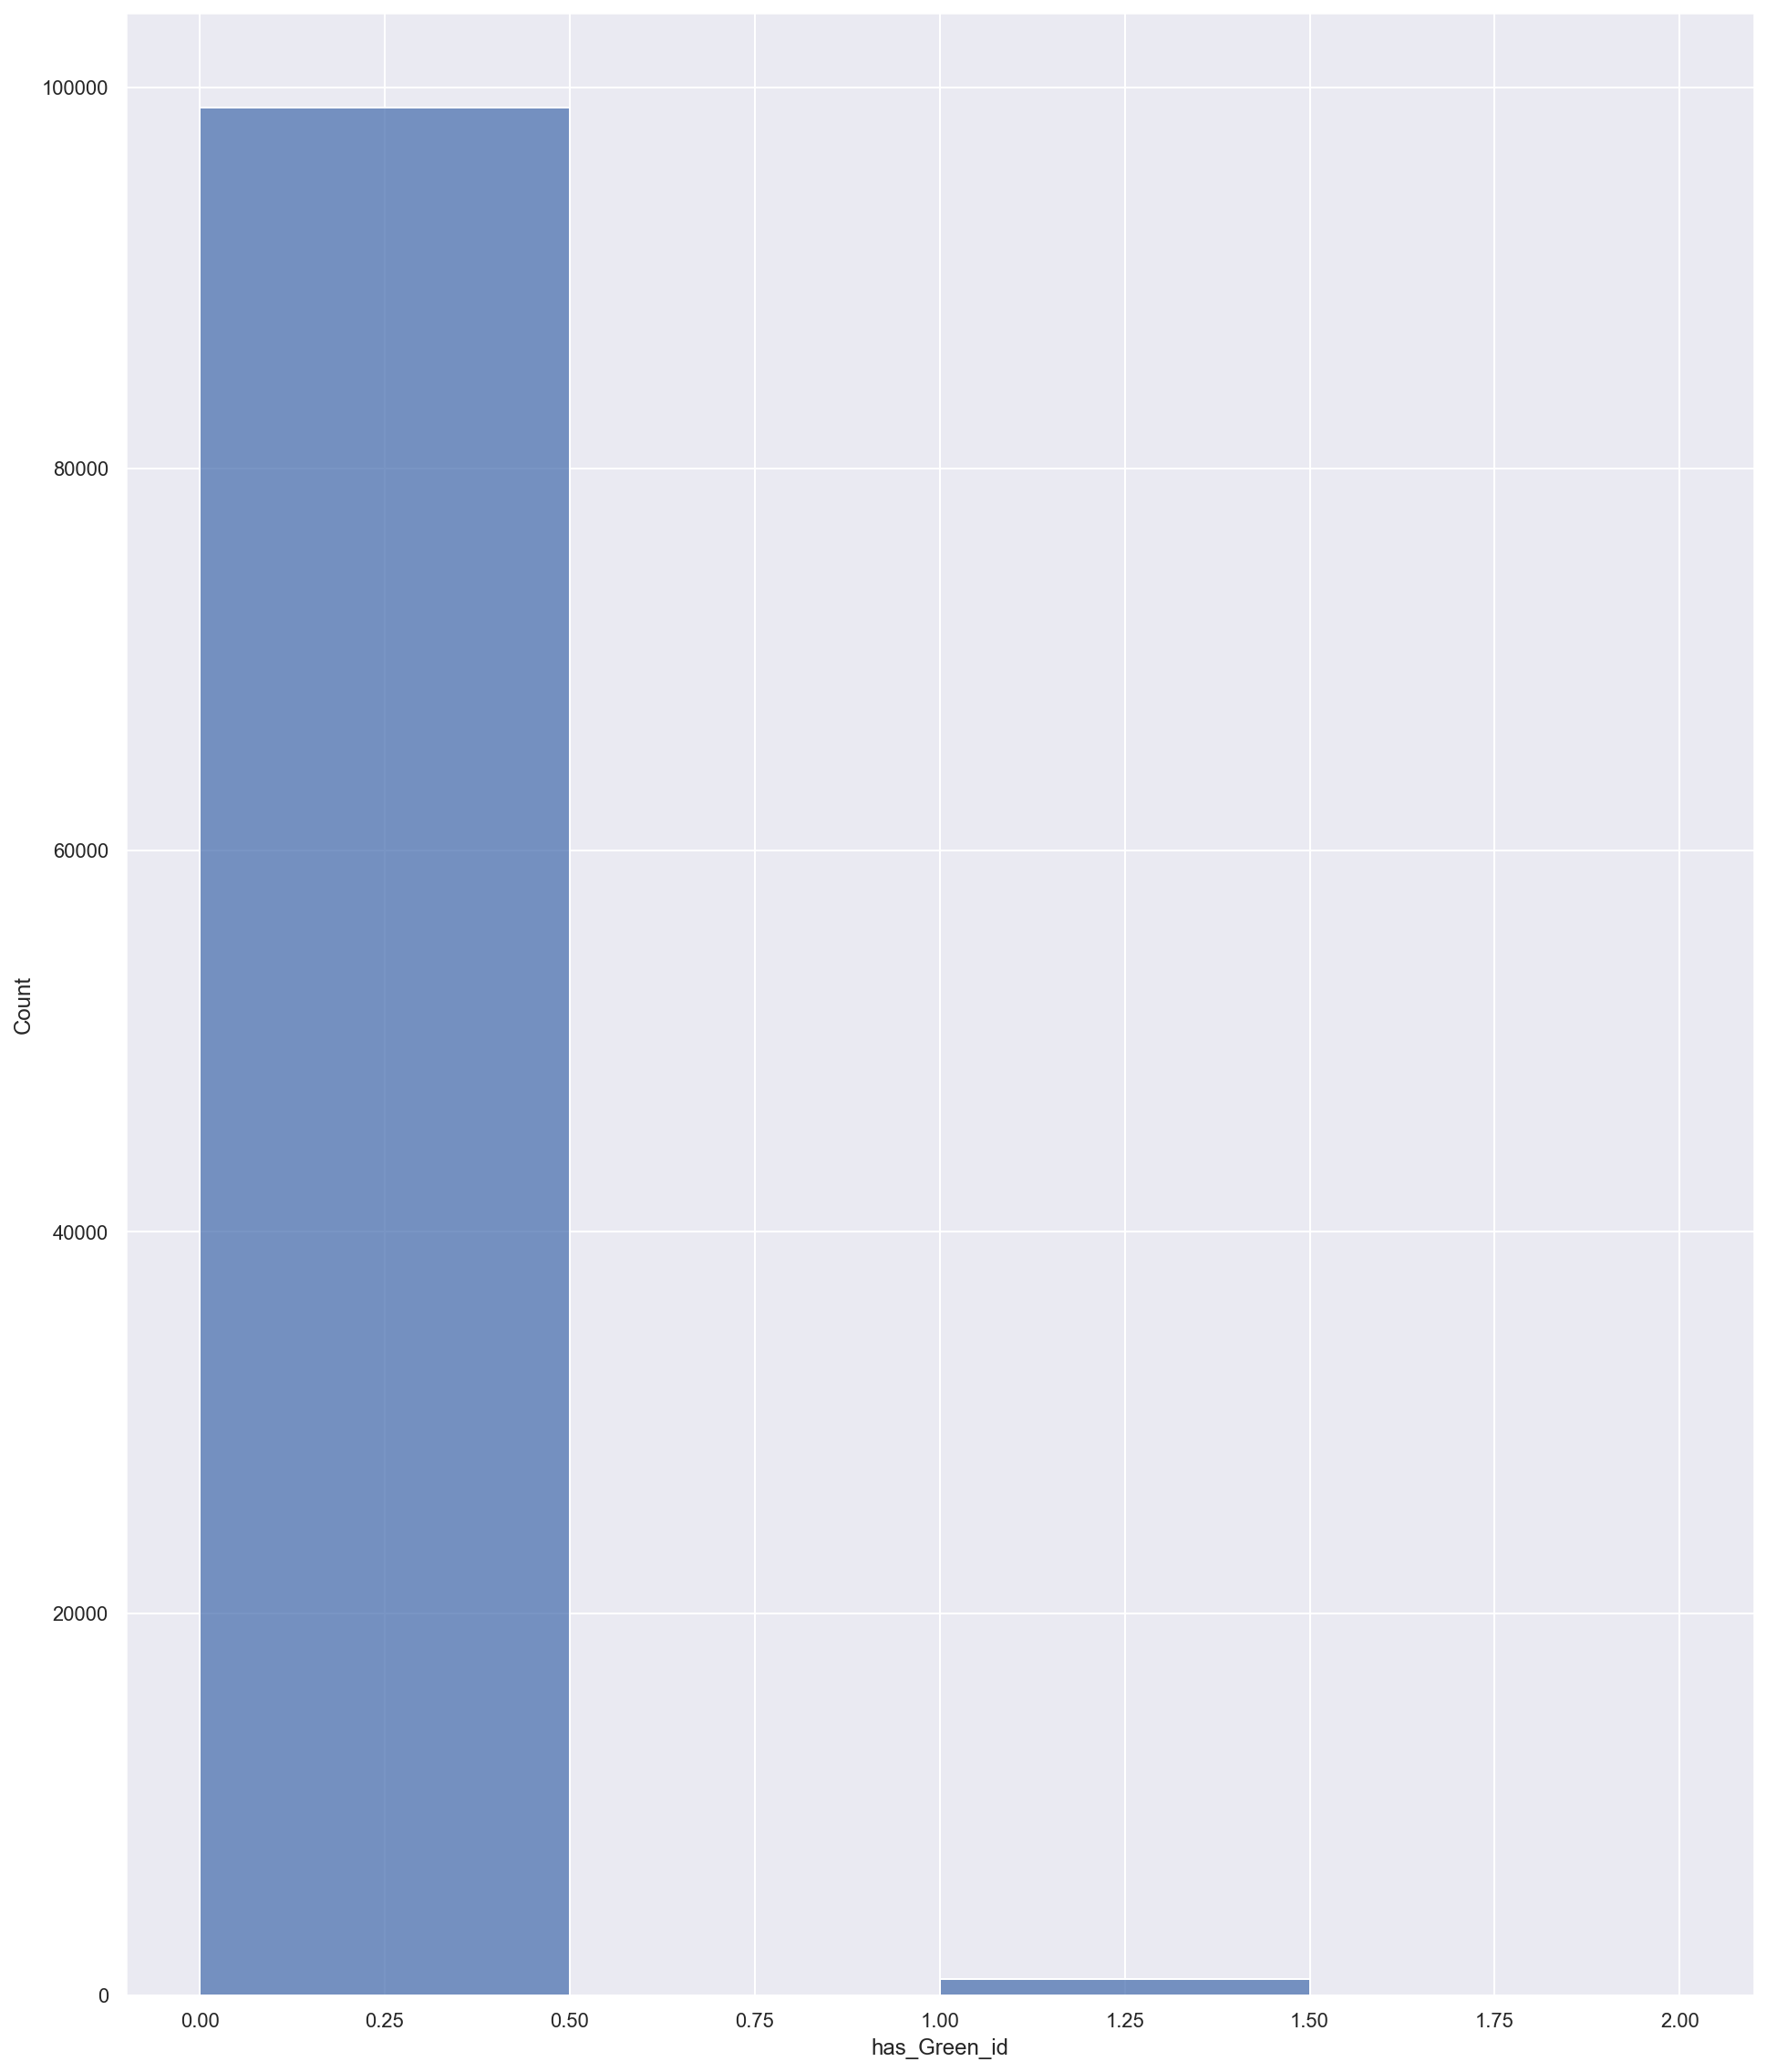

has_Black_id


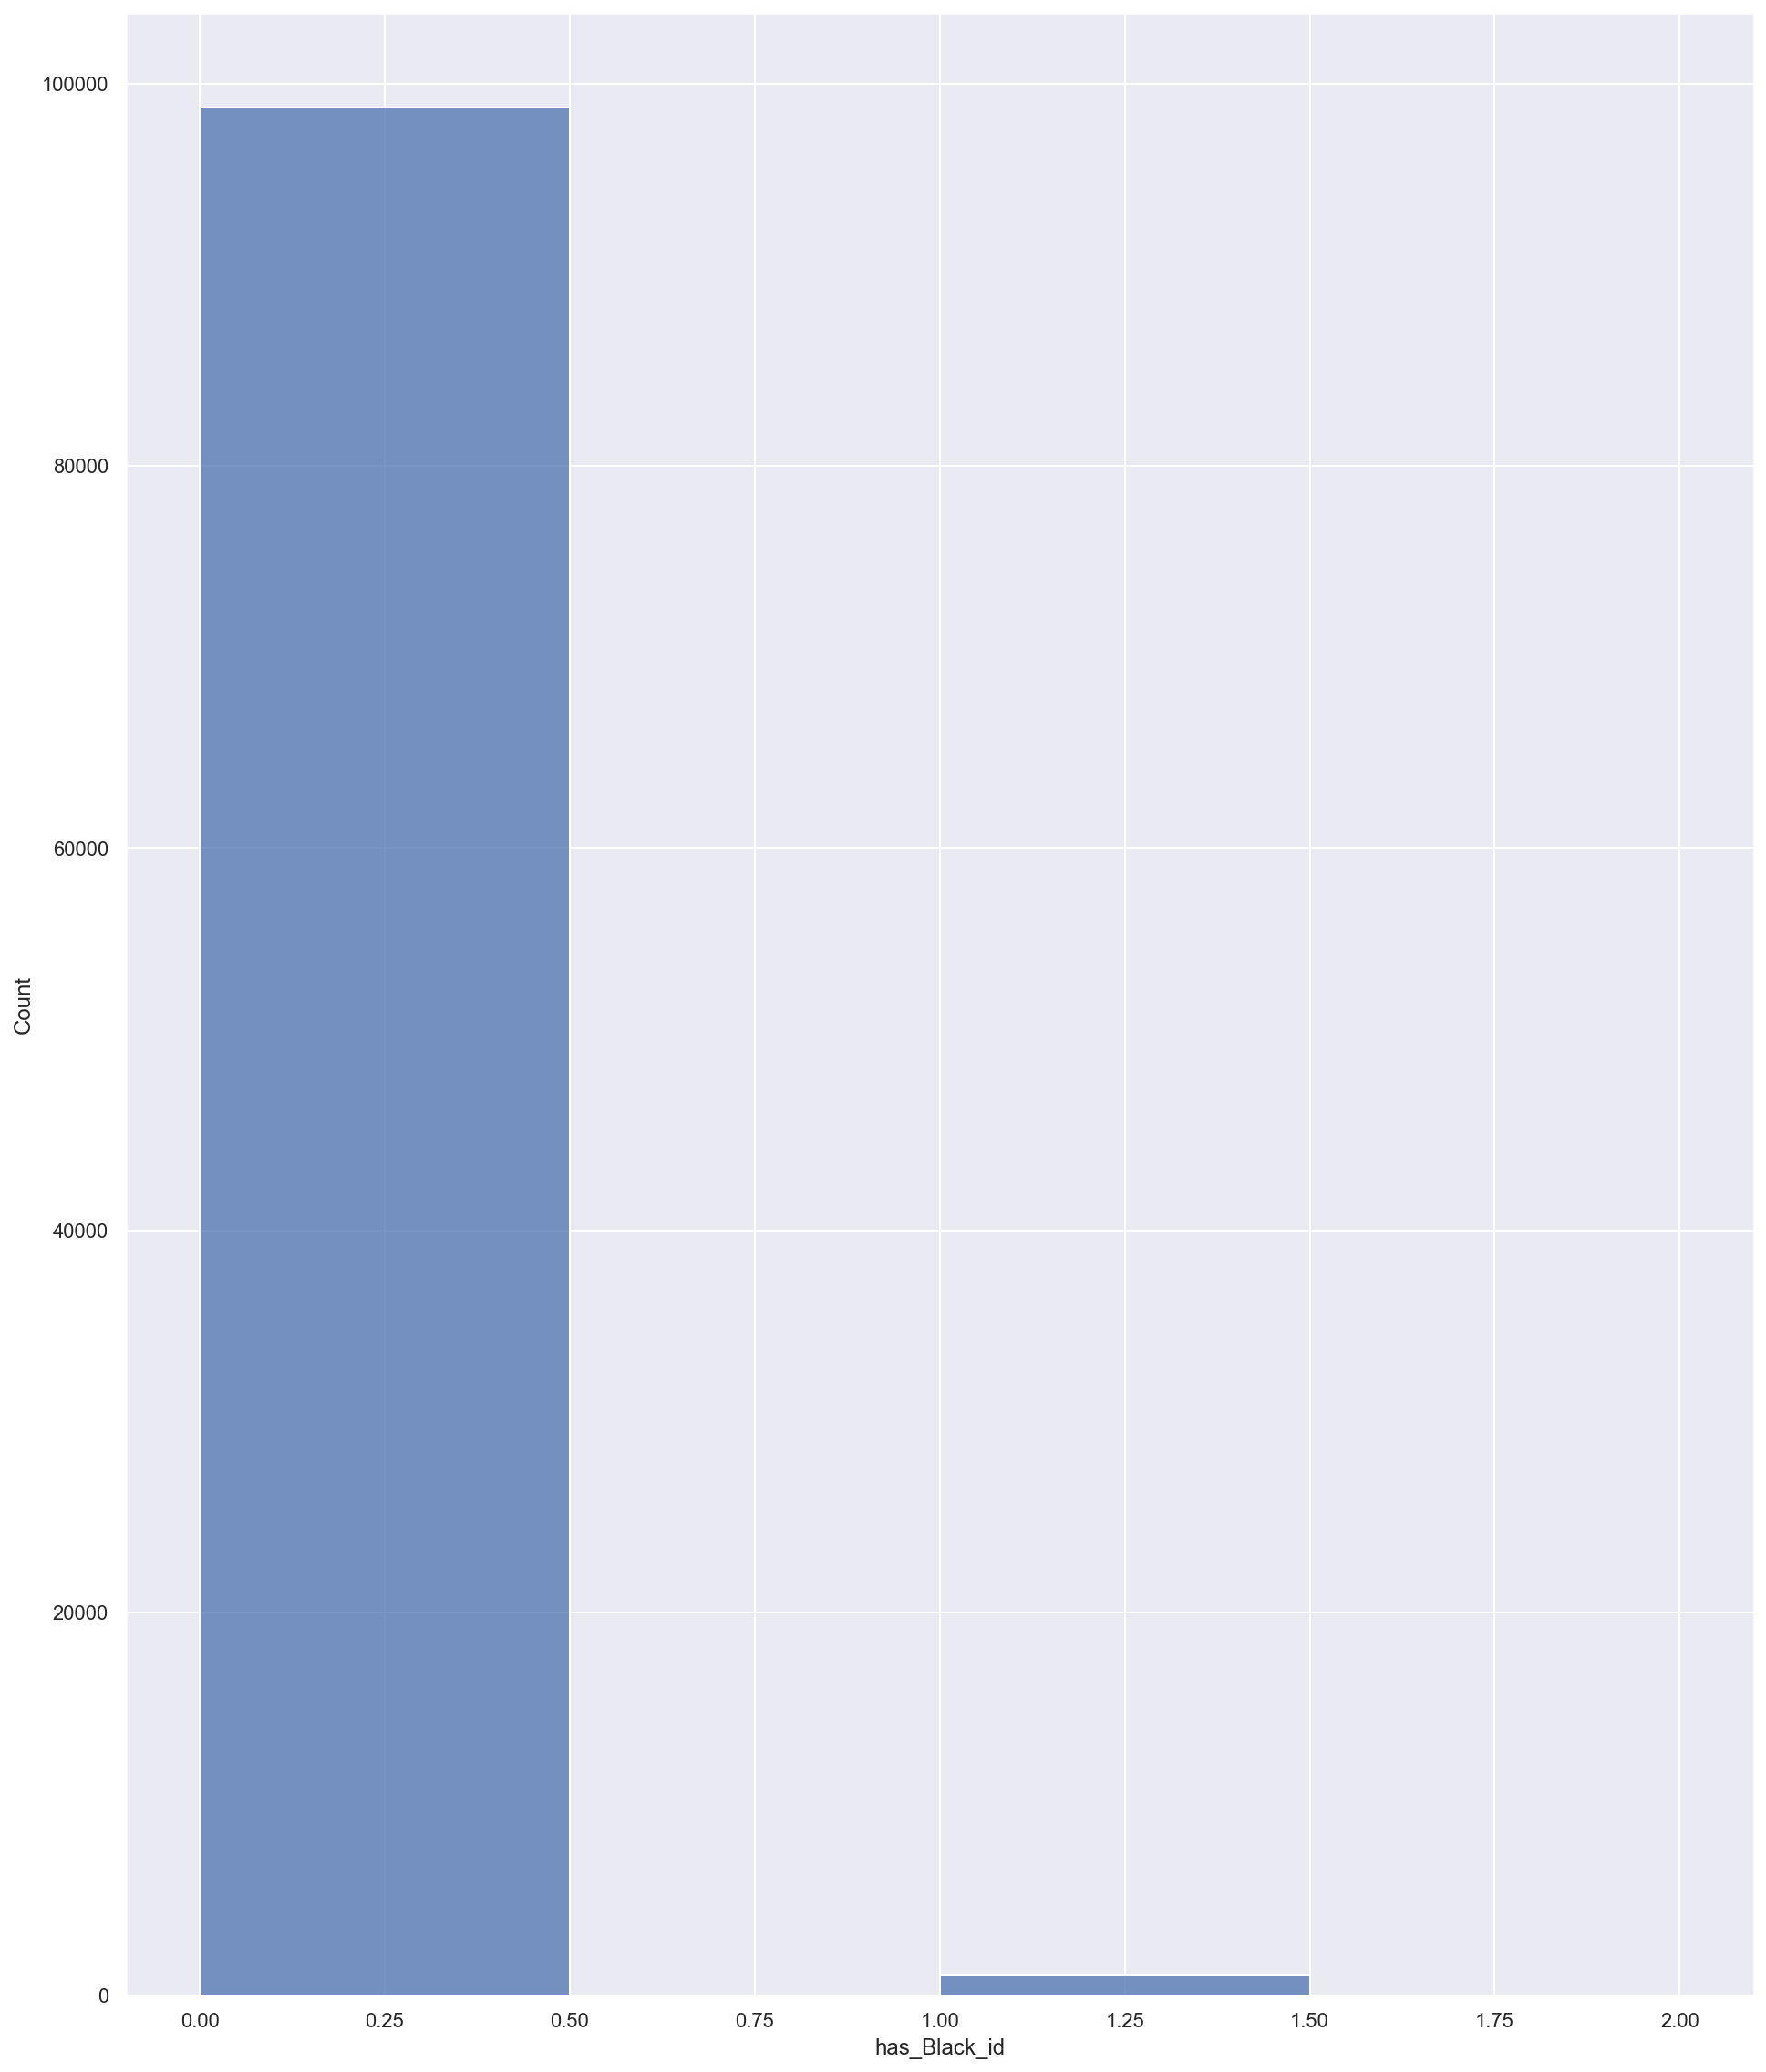

has_Blue_id


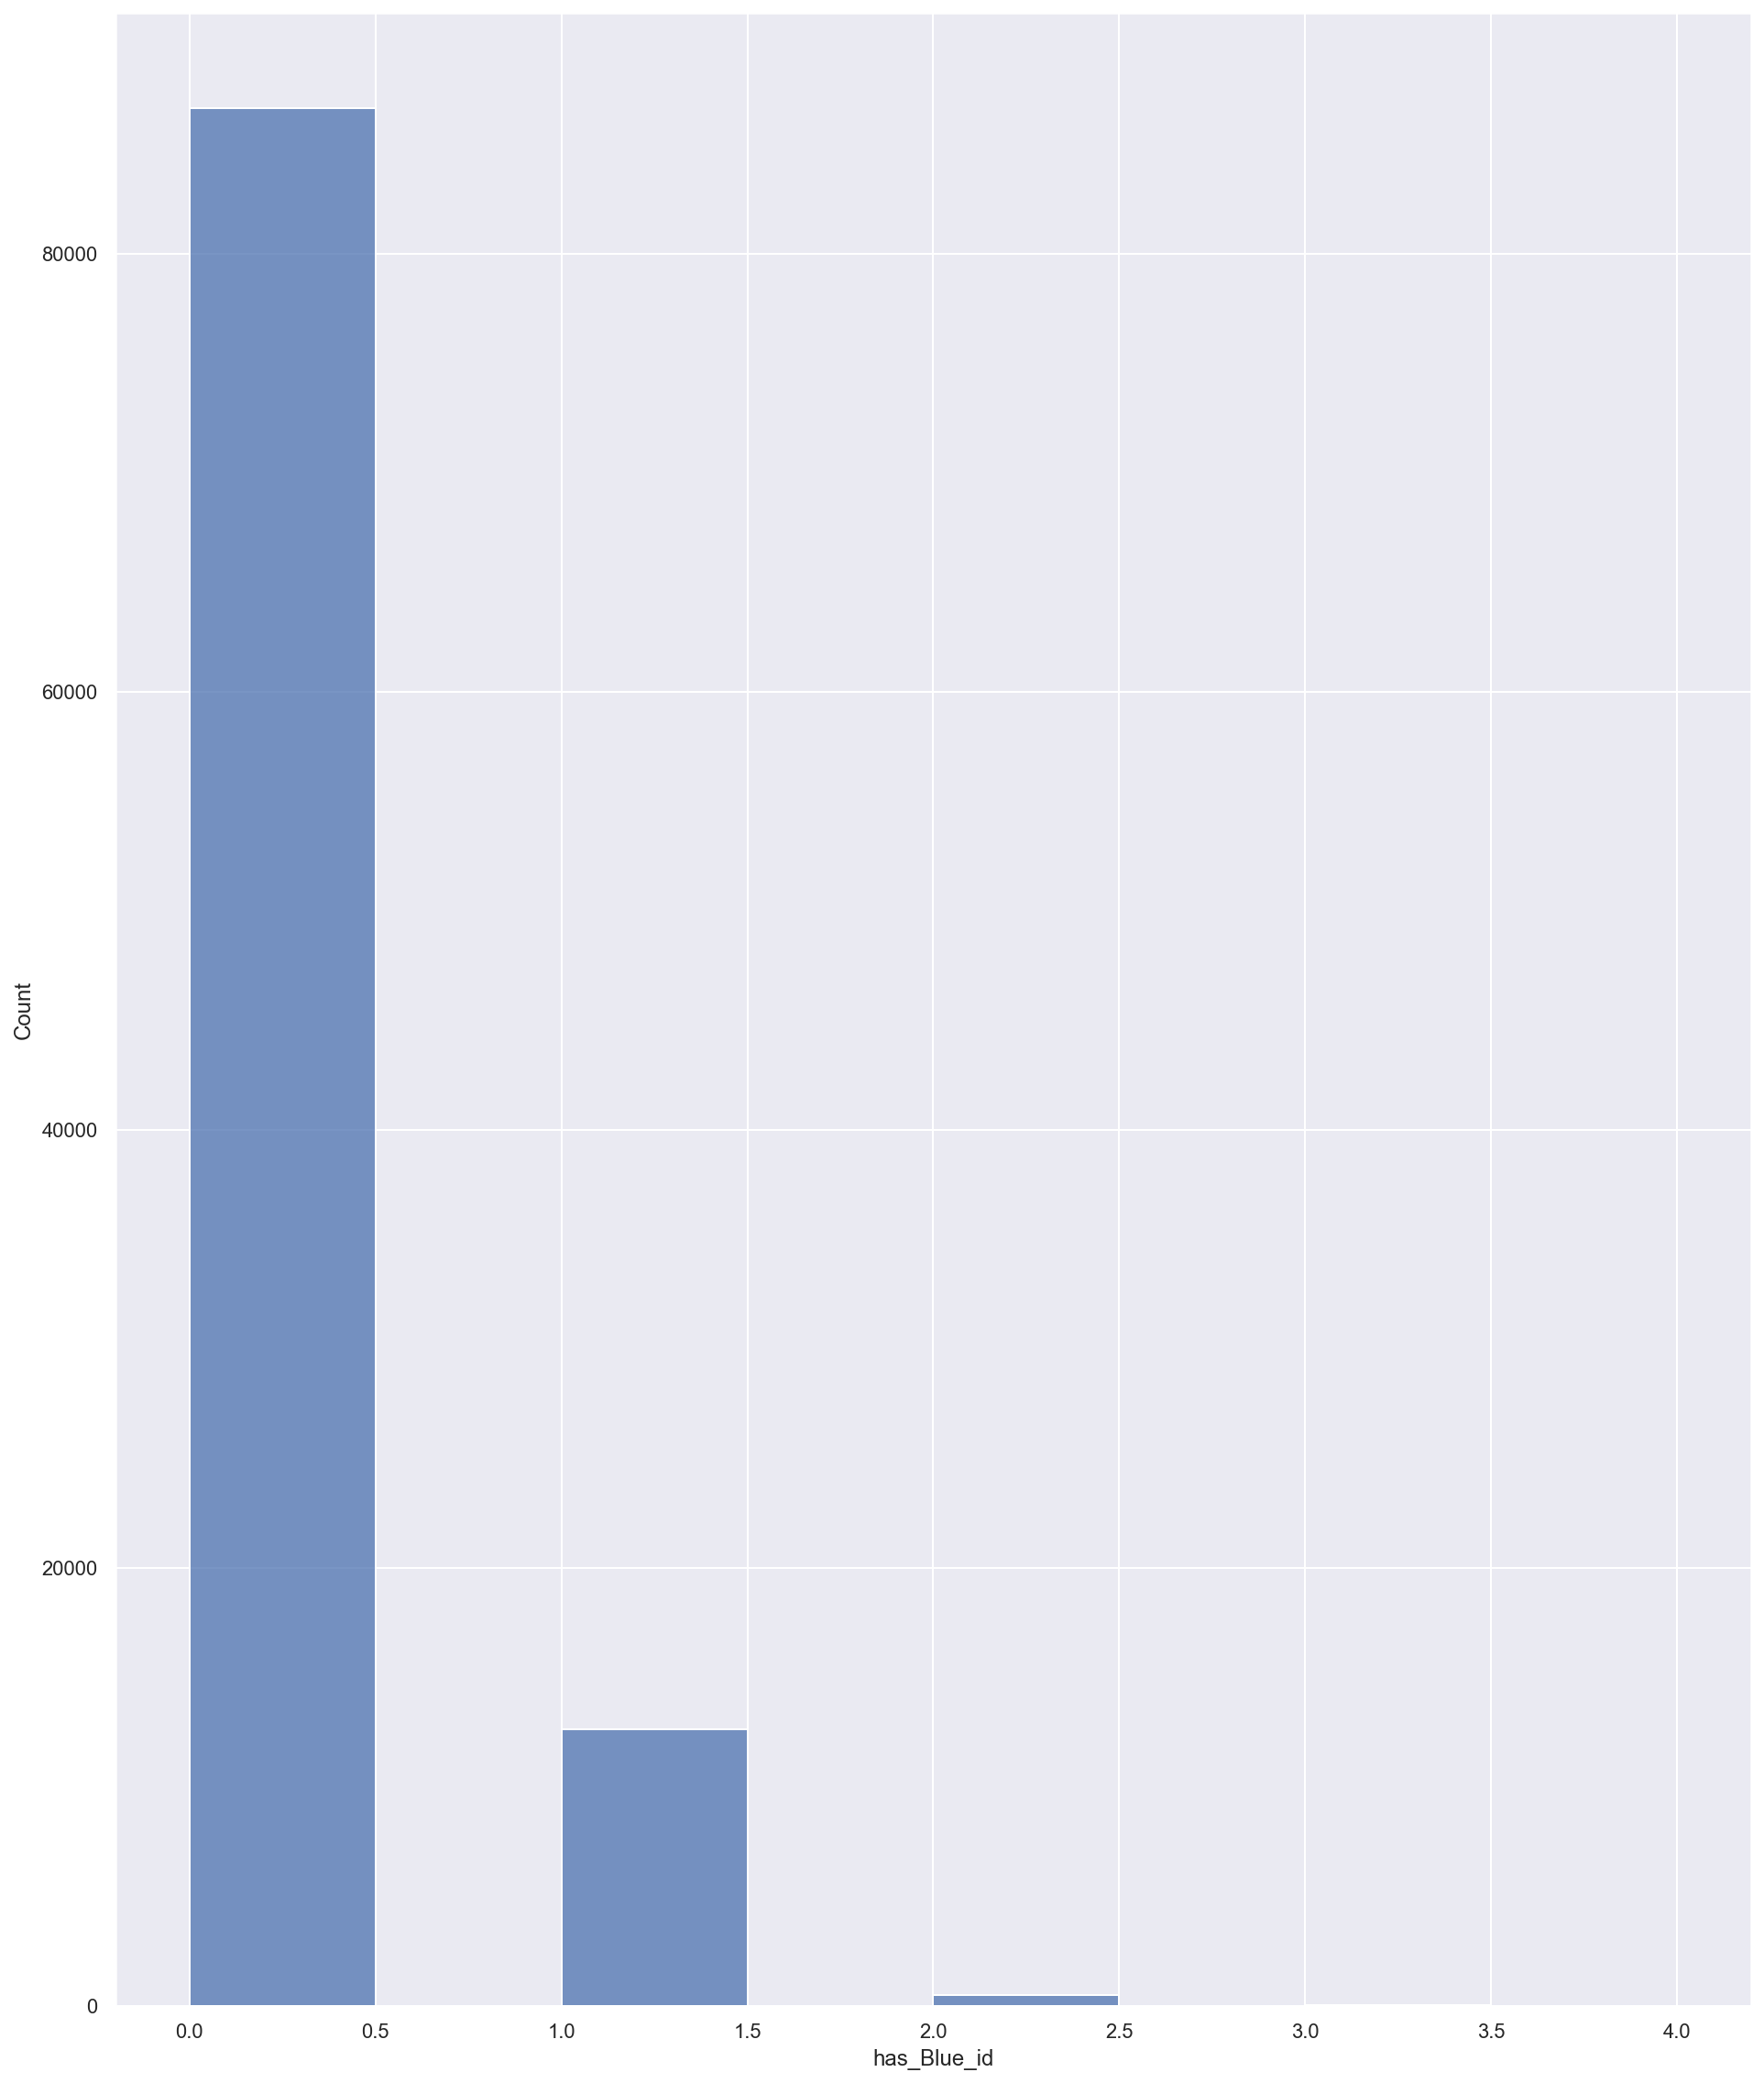

Red_android


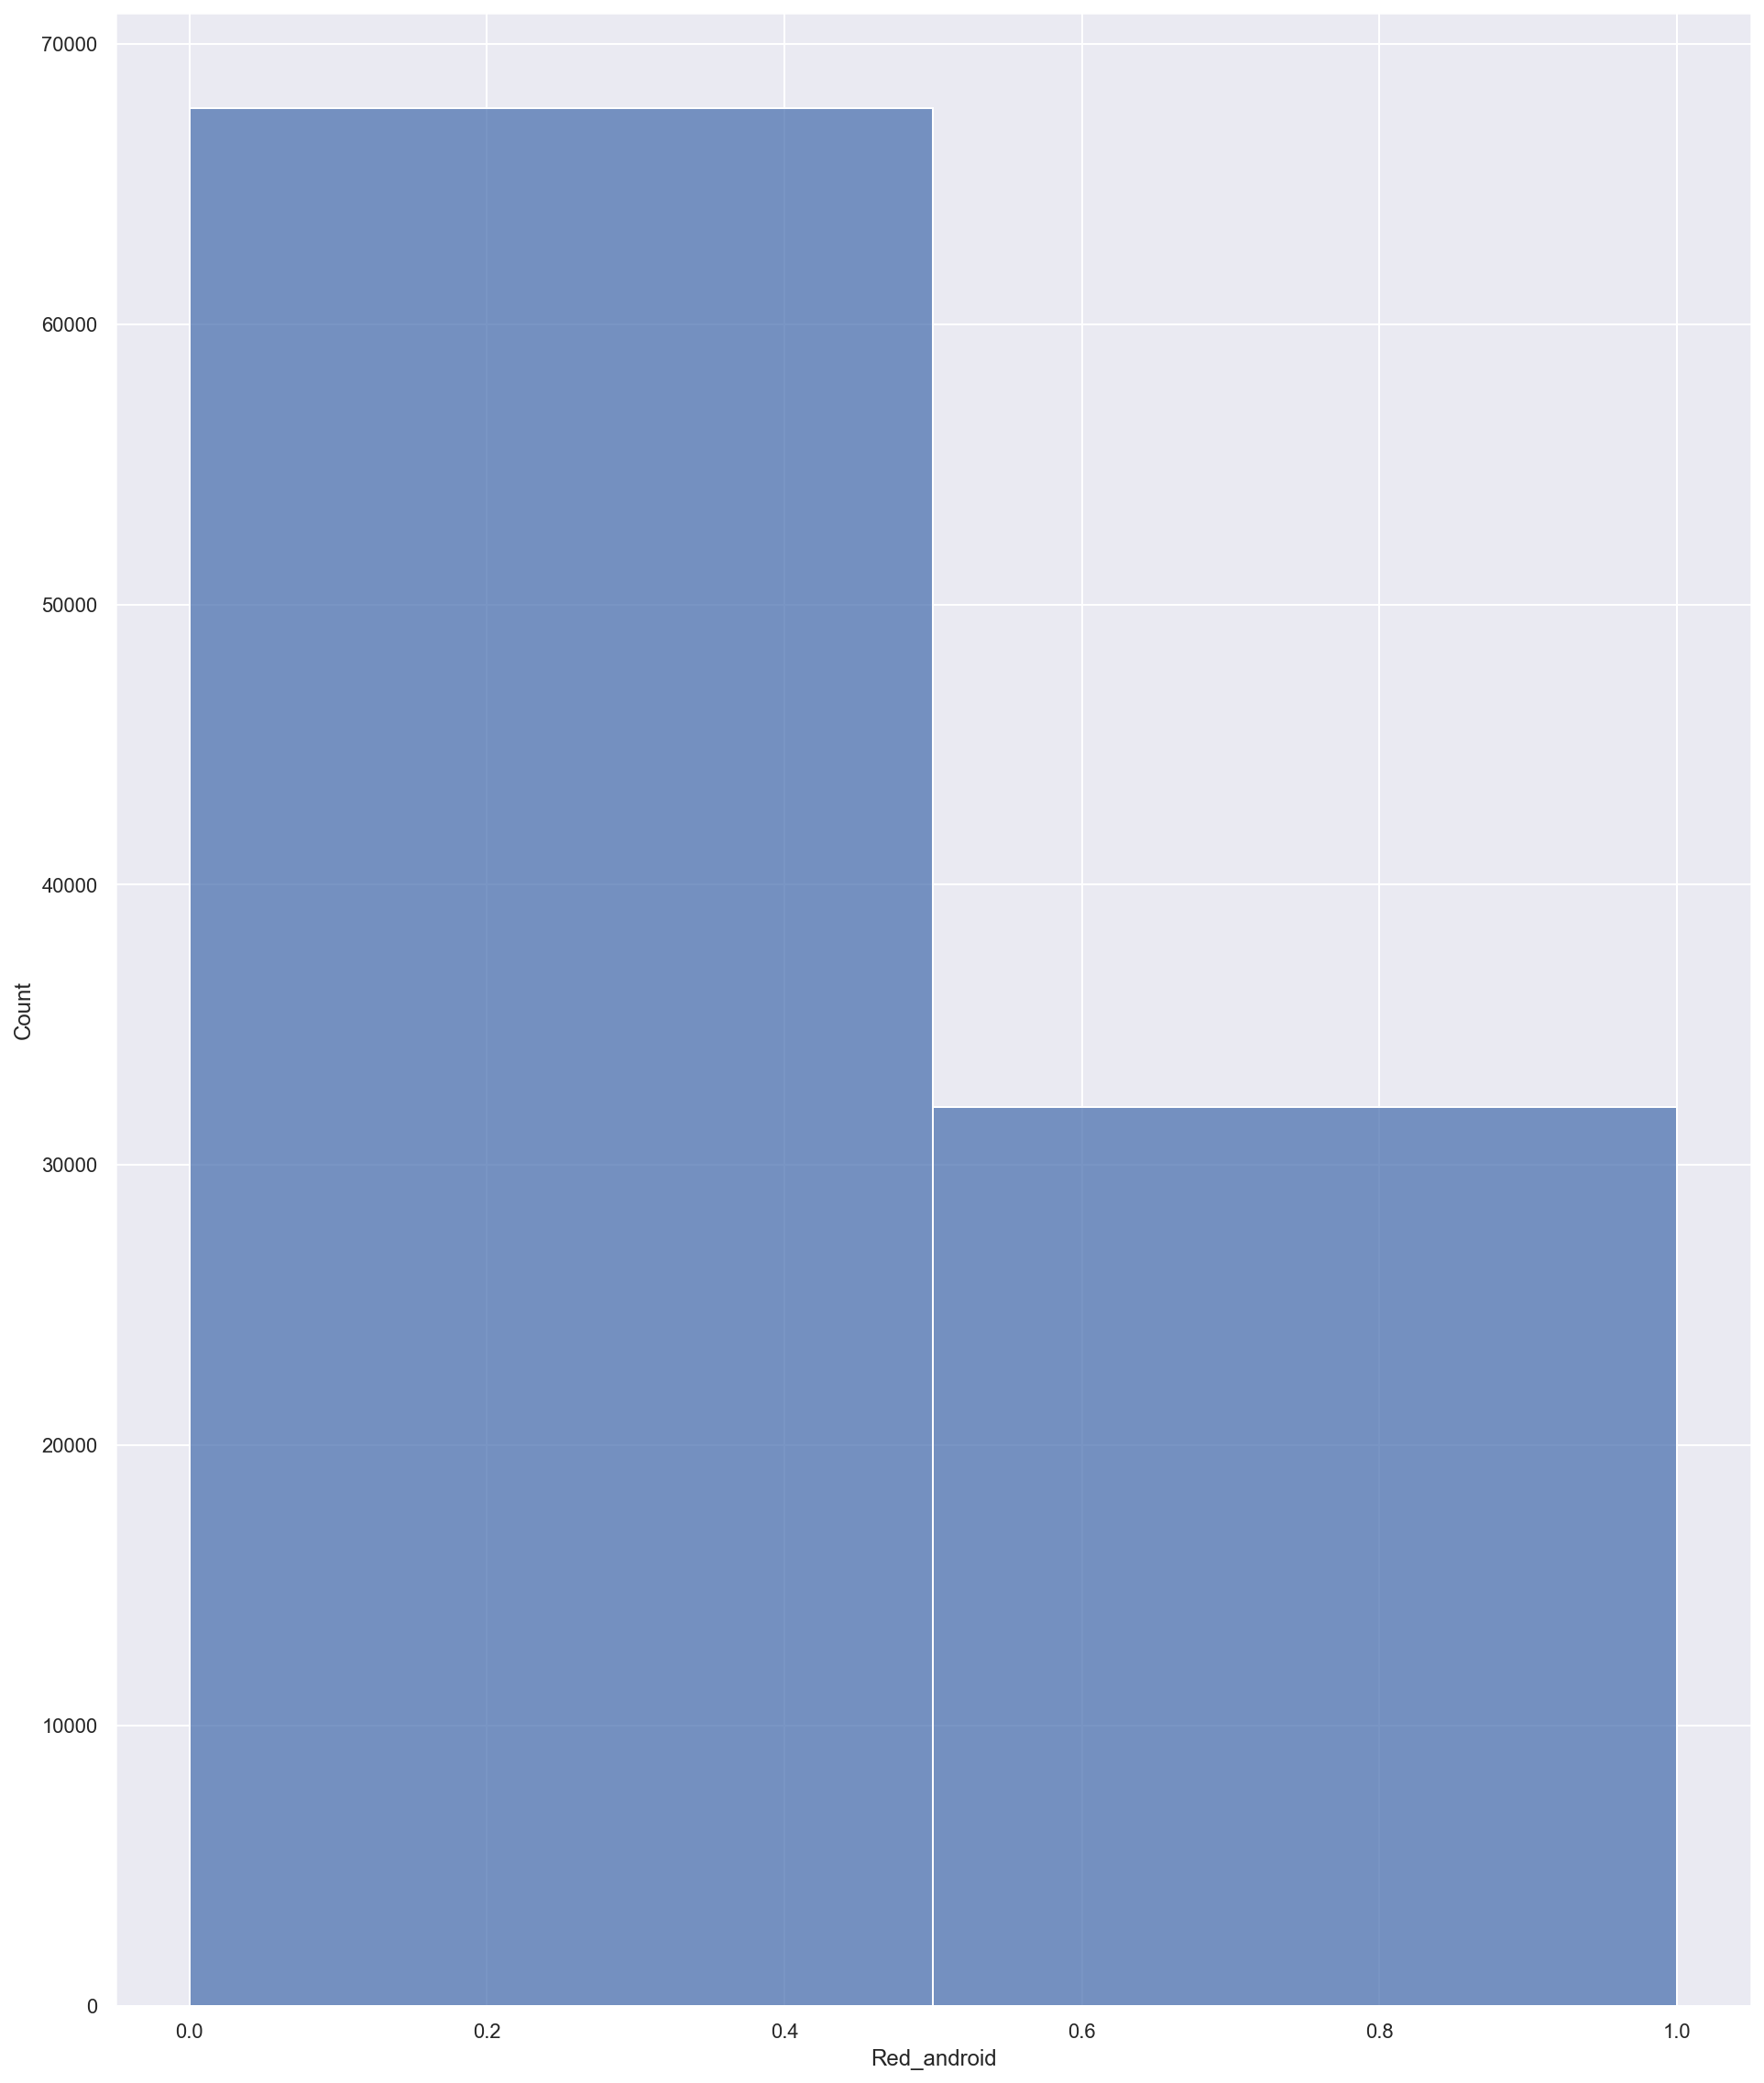

Green_android


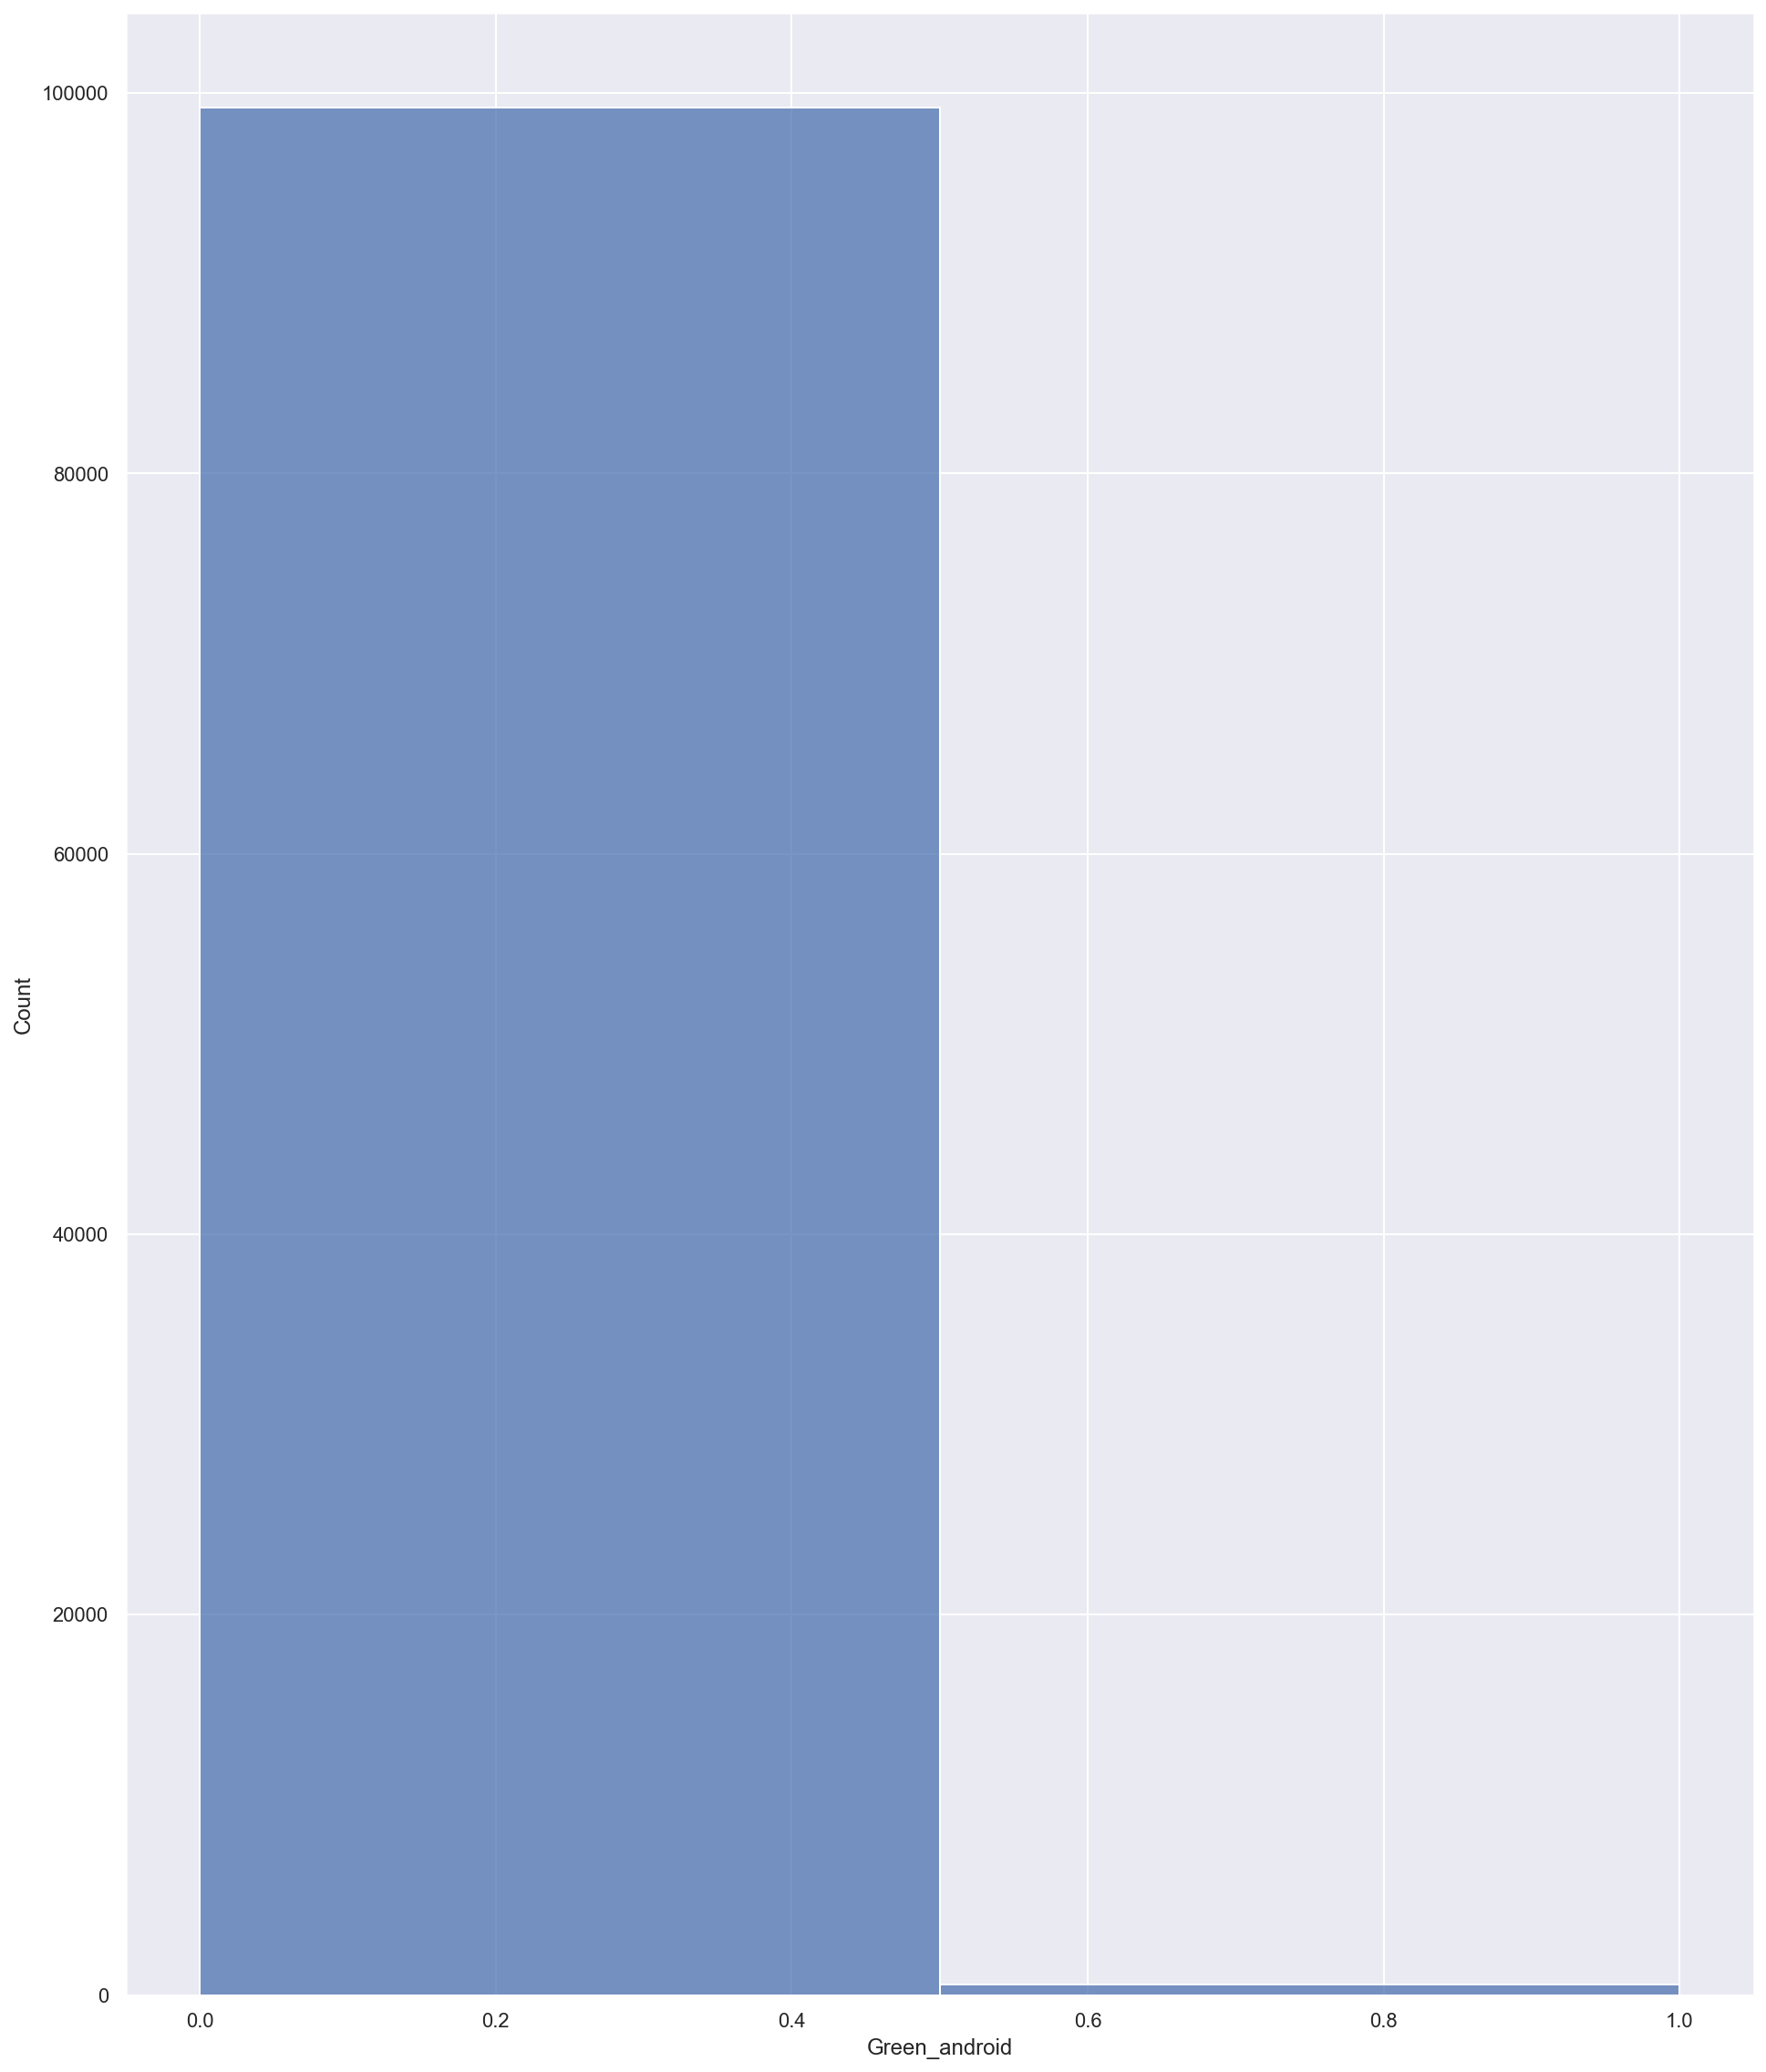

Black_android


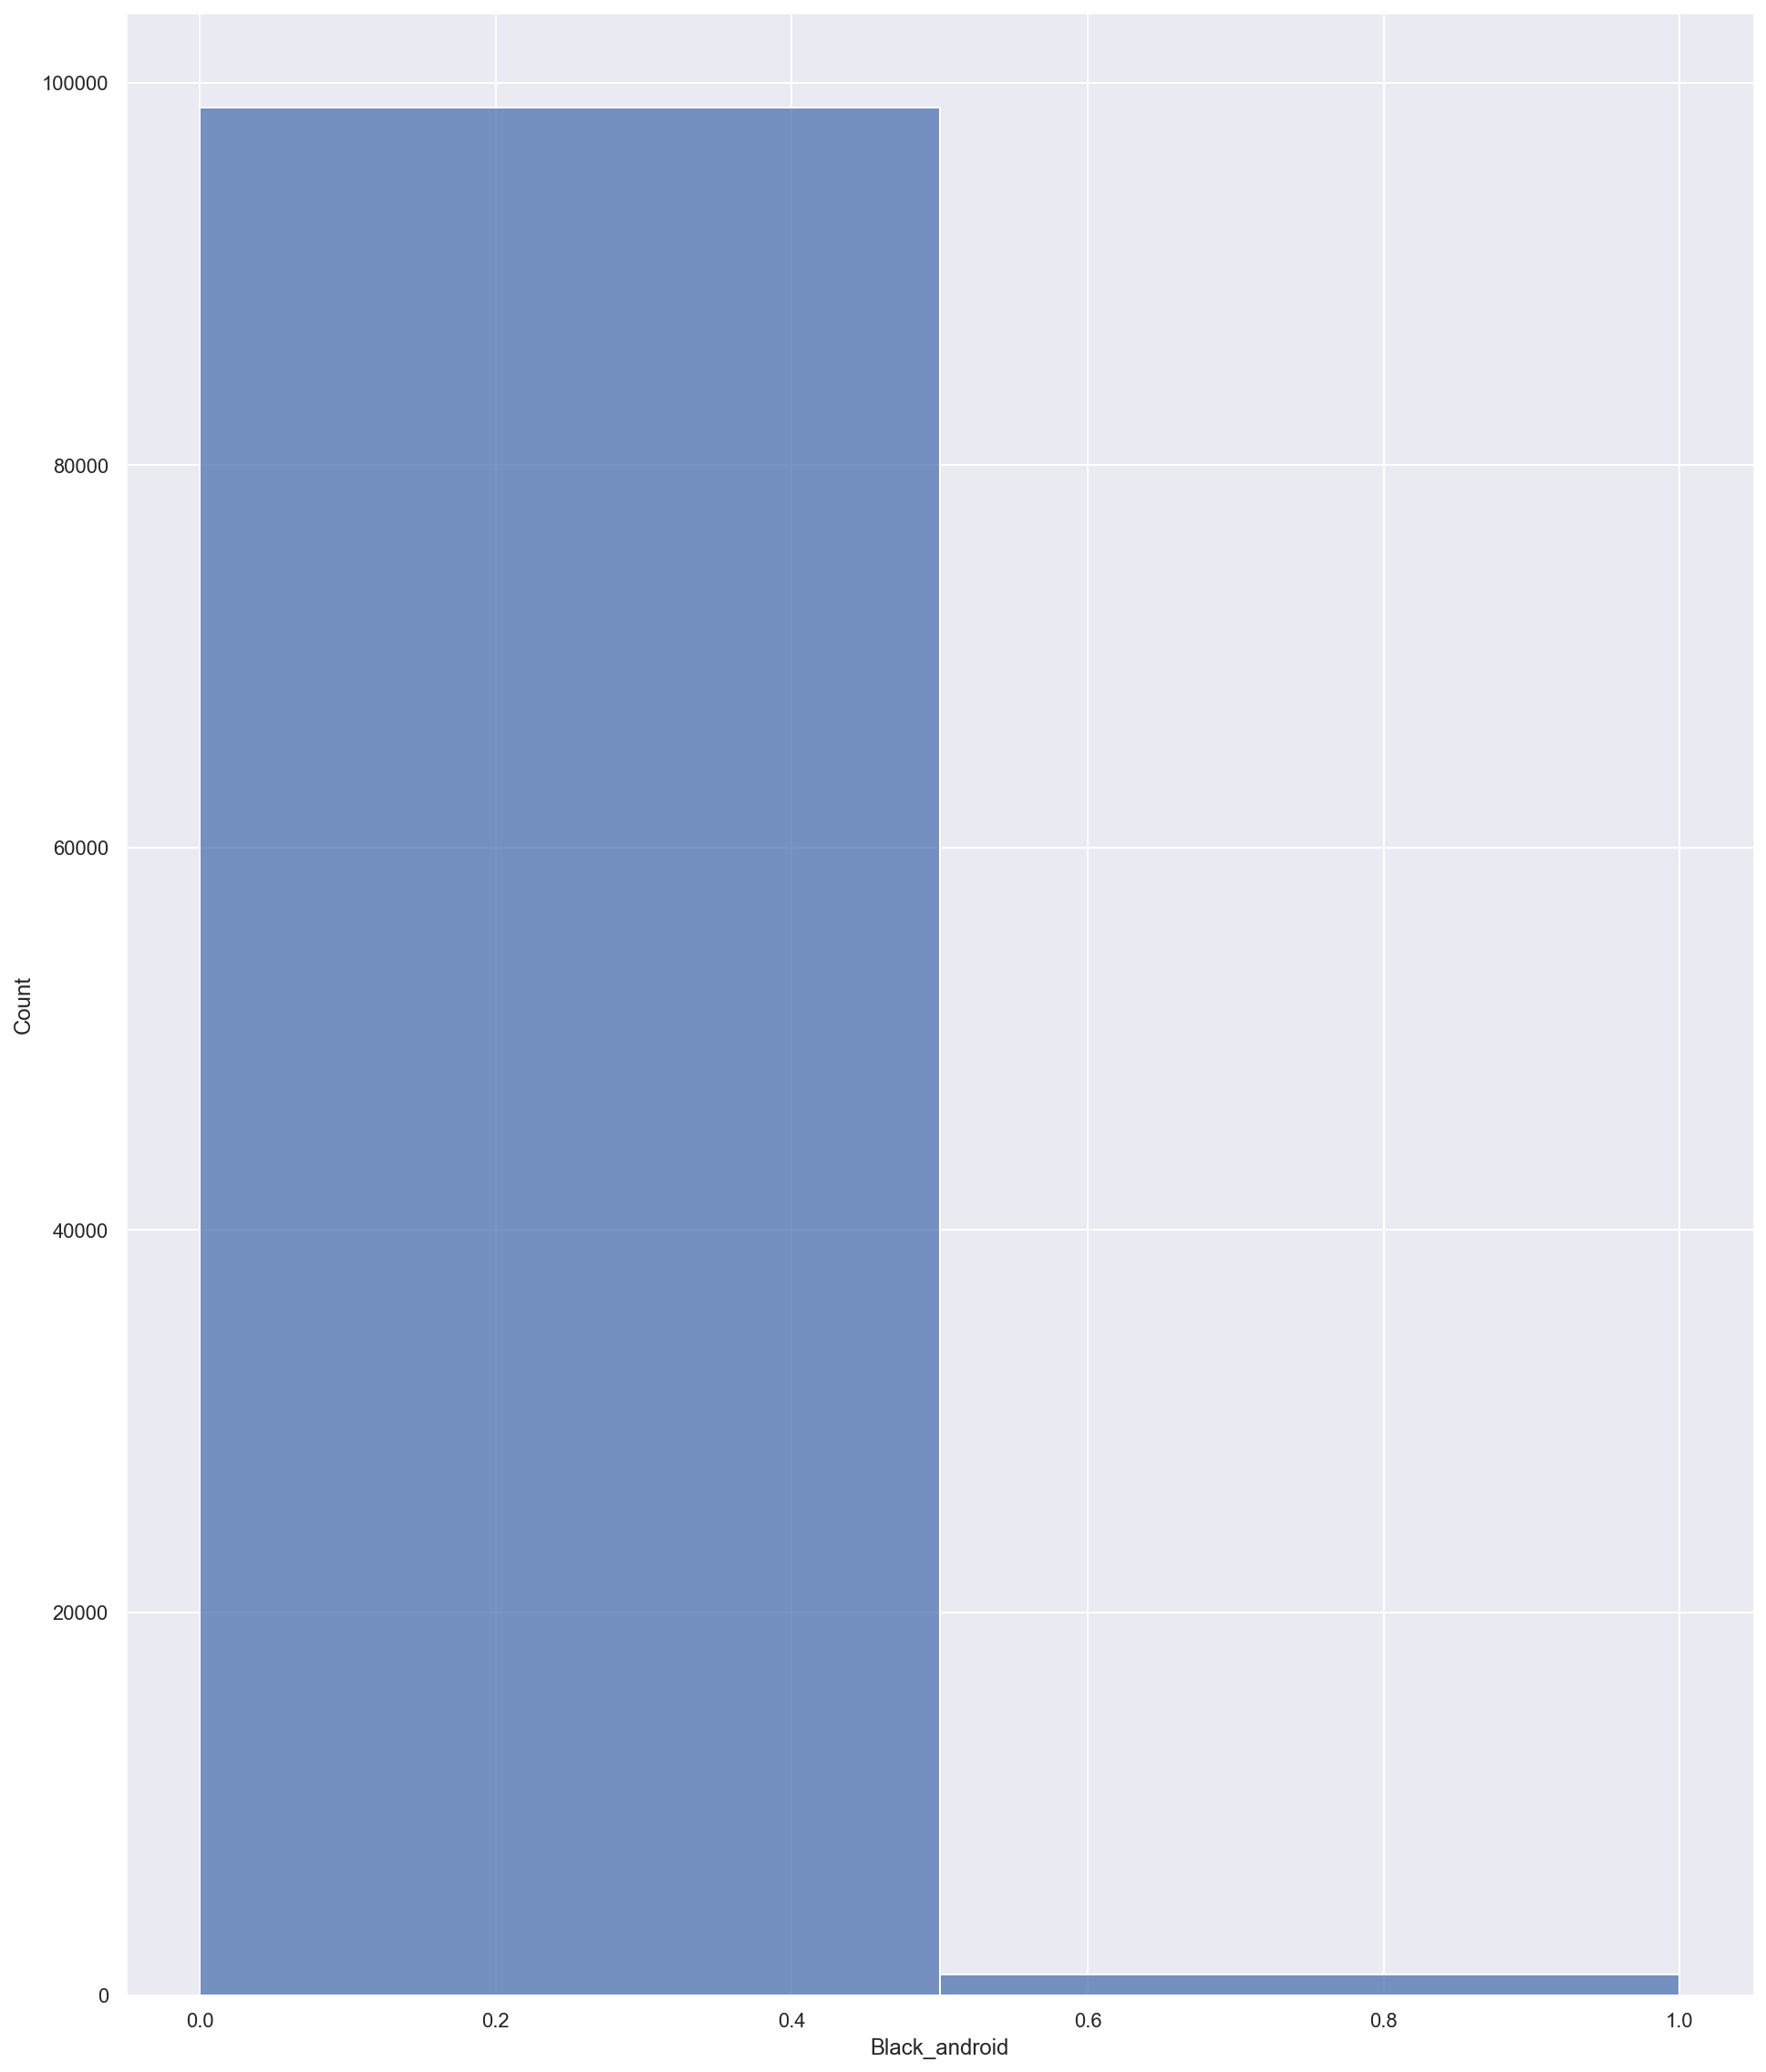

Blue_android


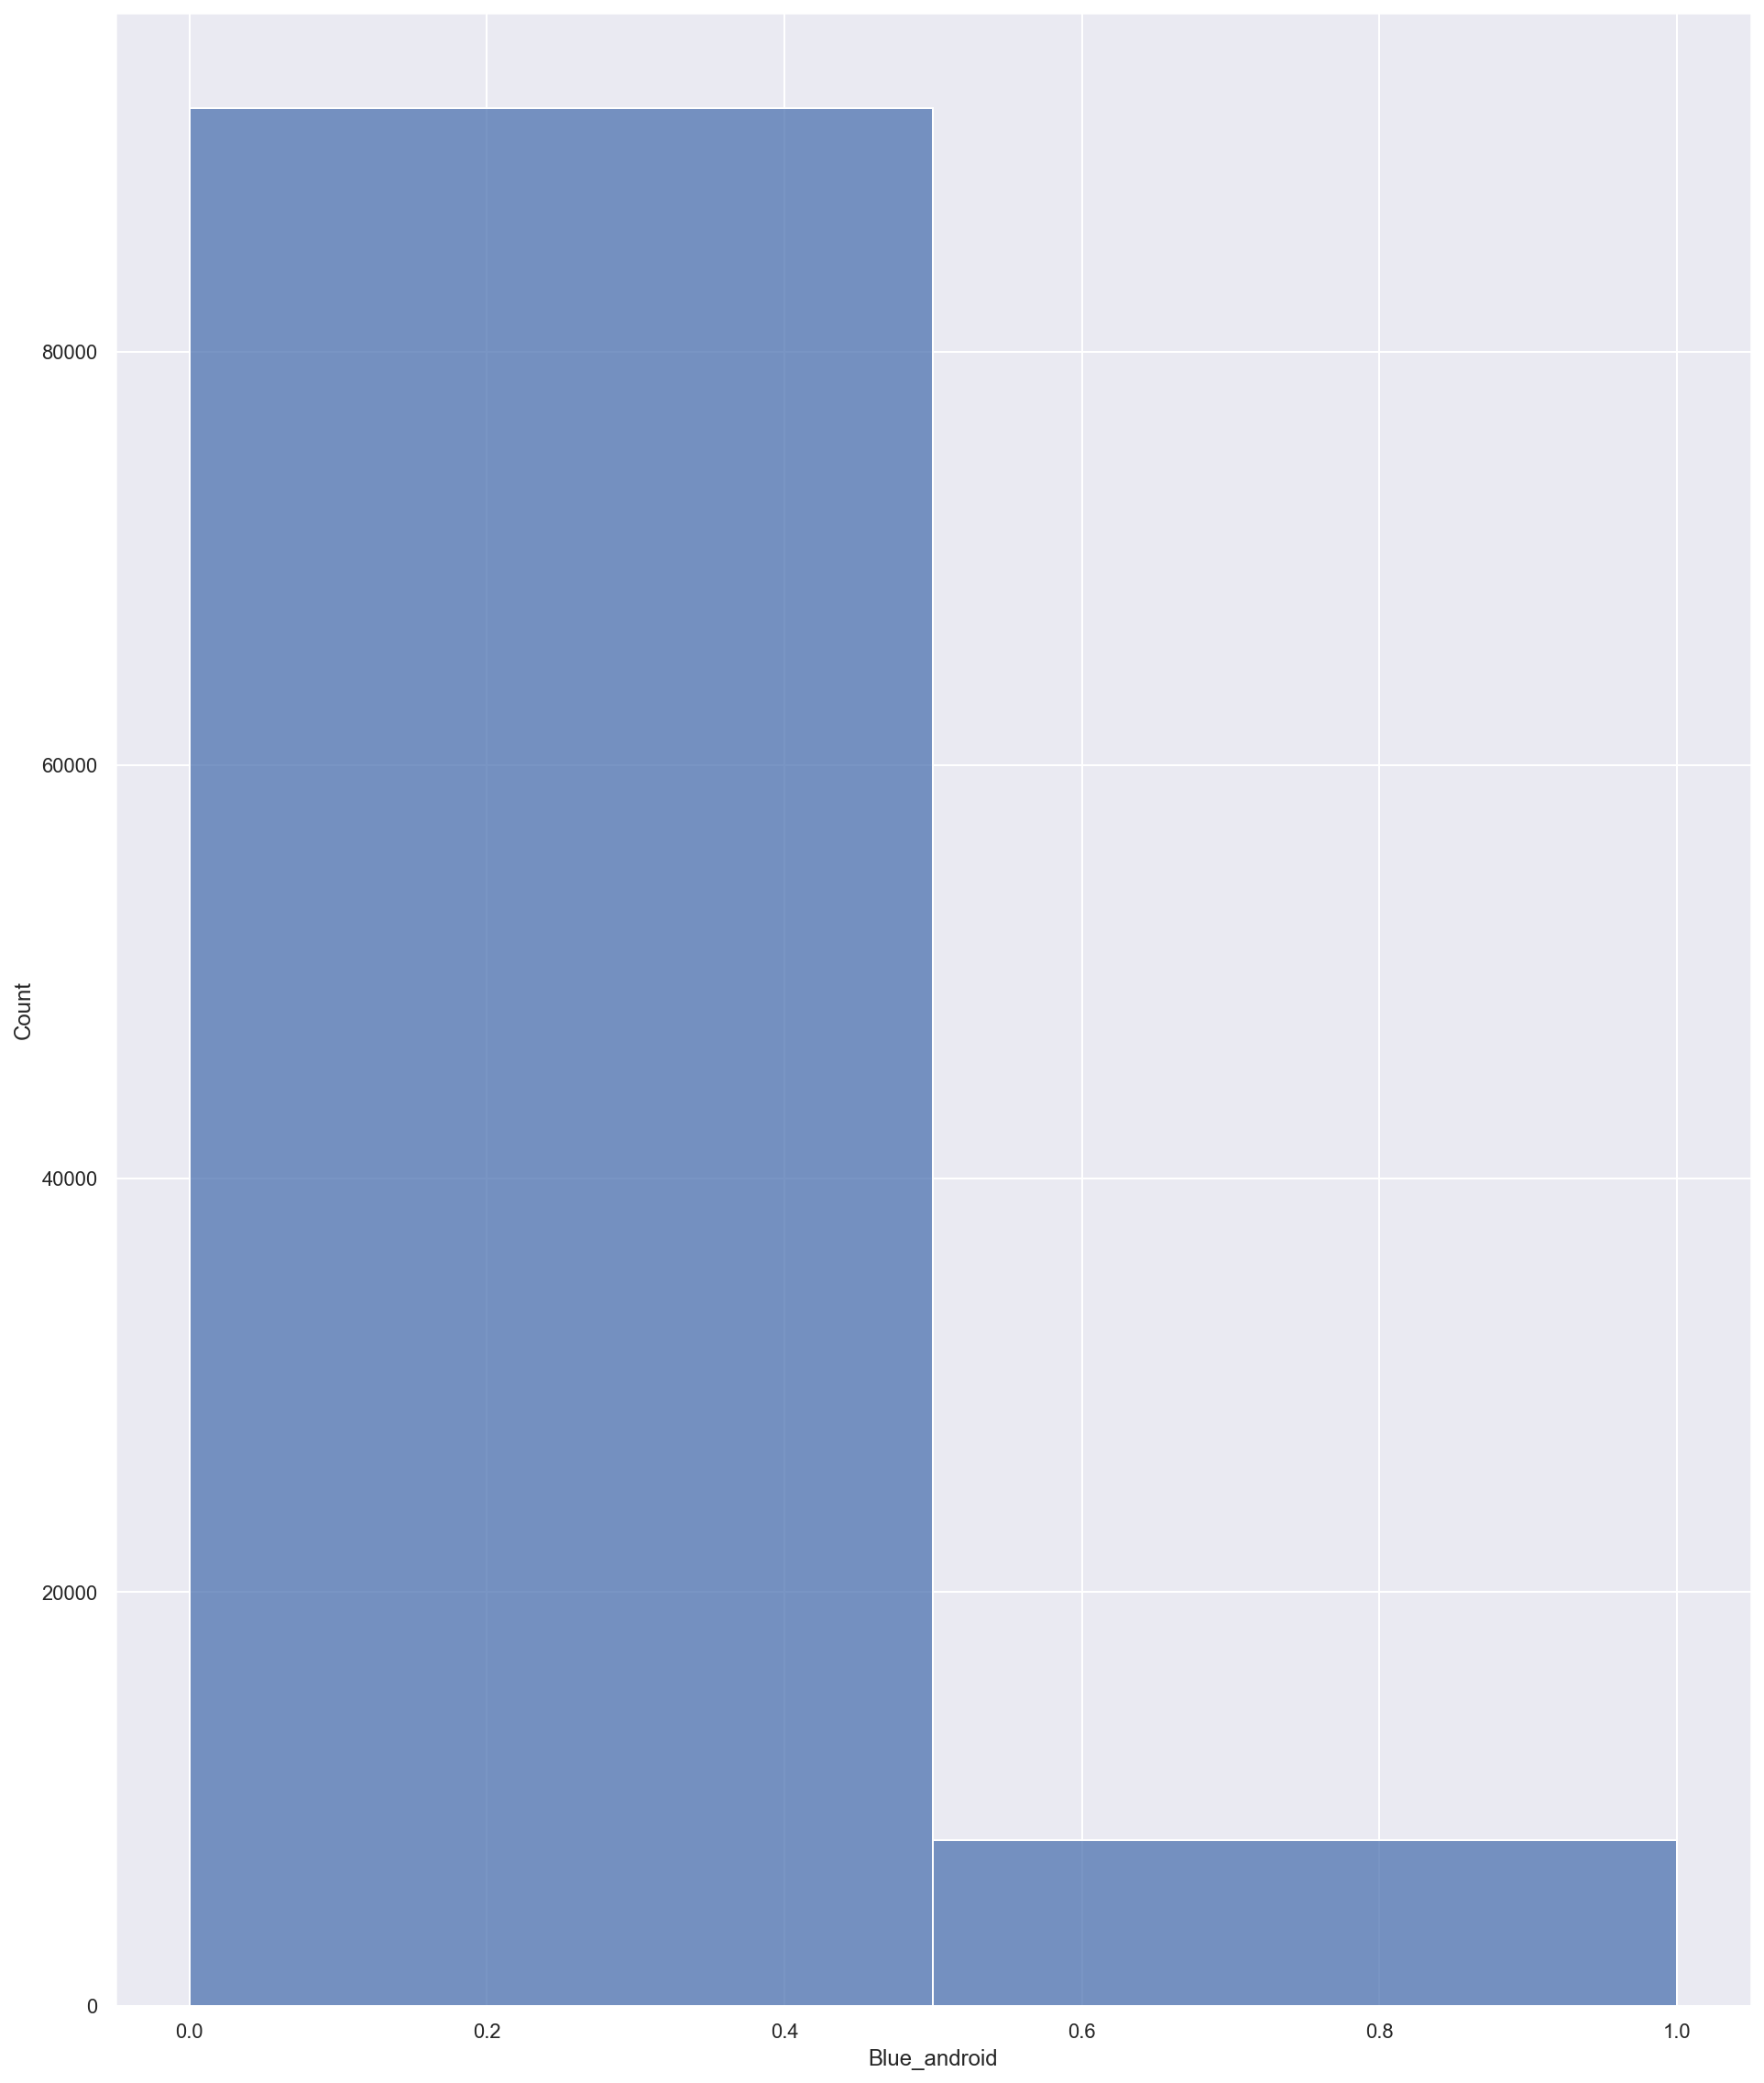

Red_apple


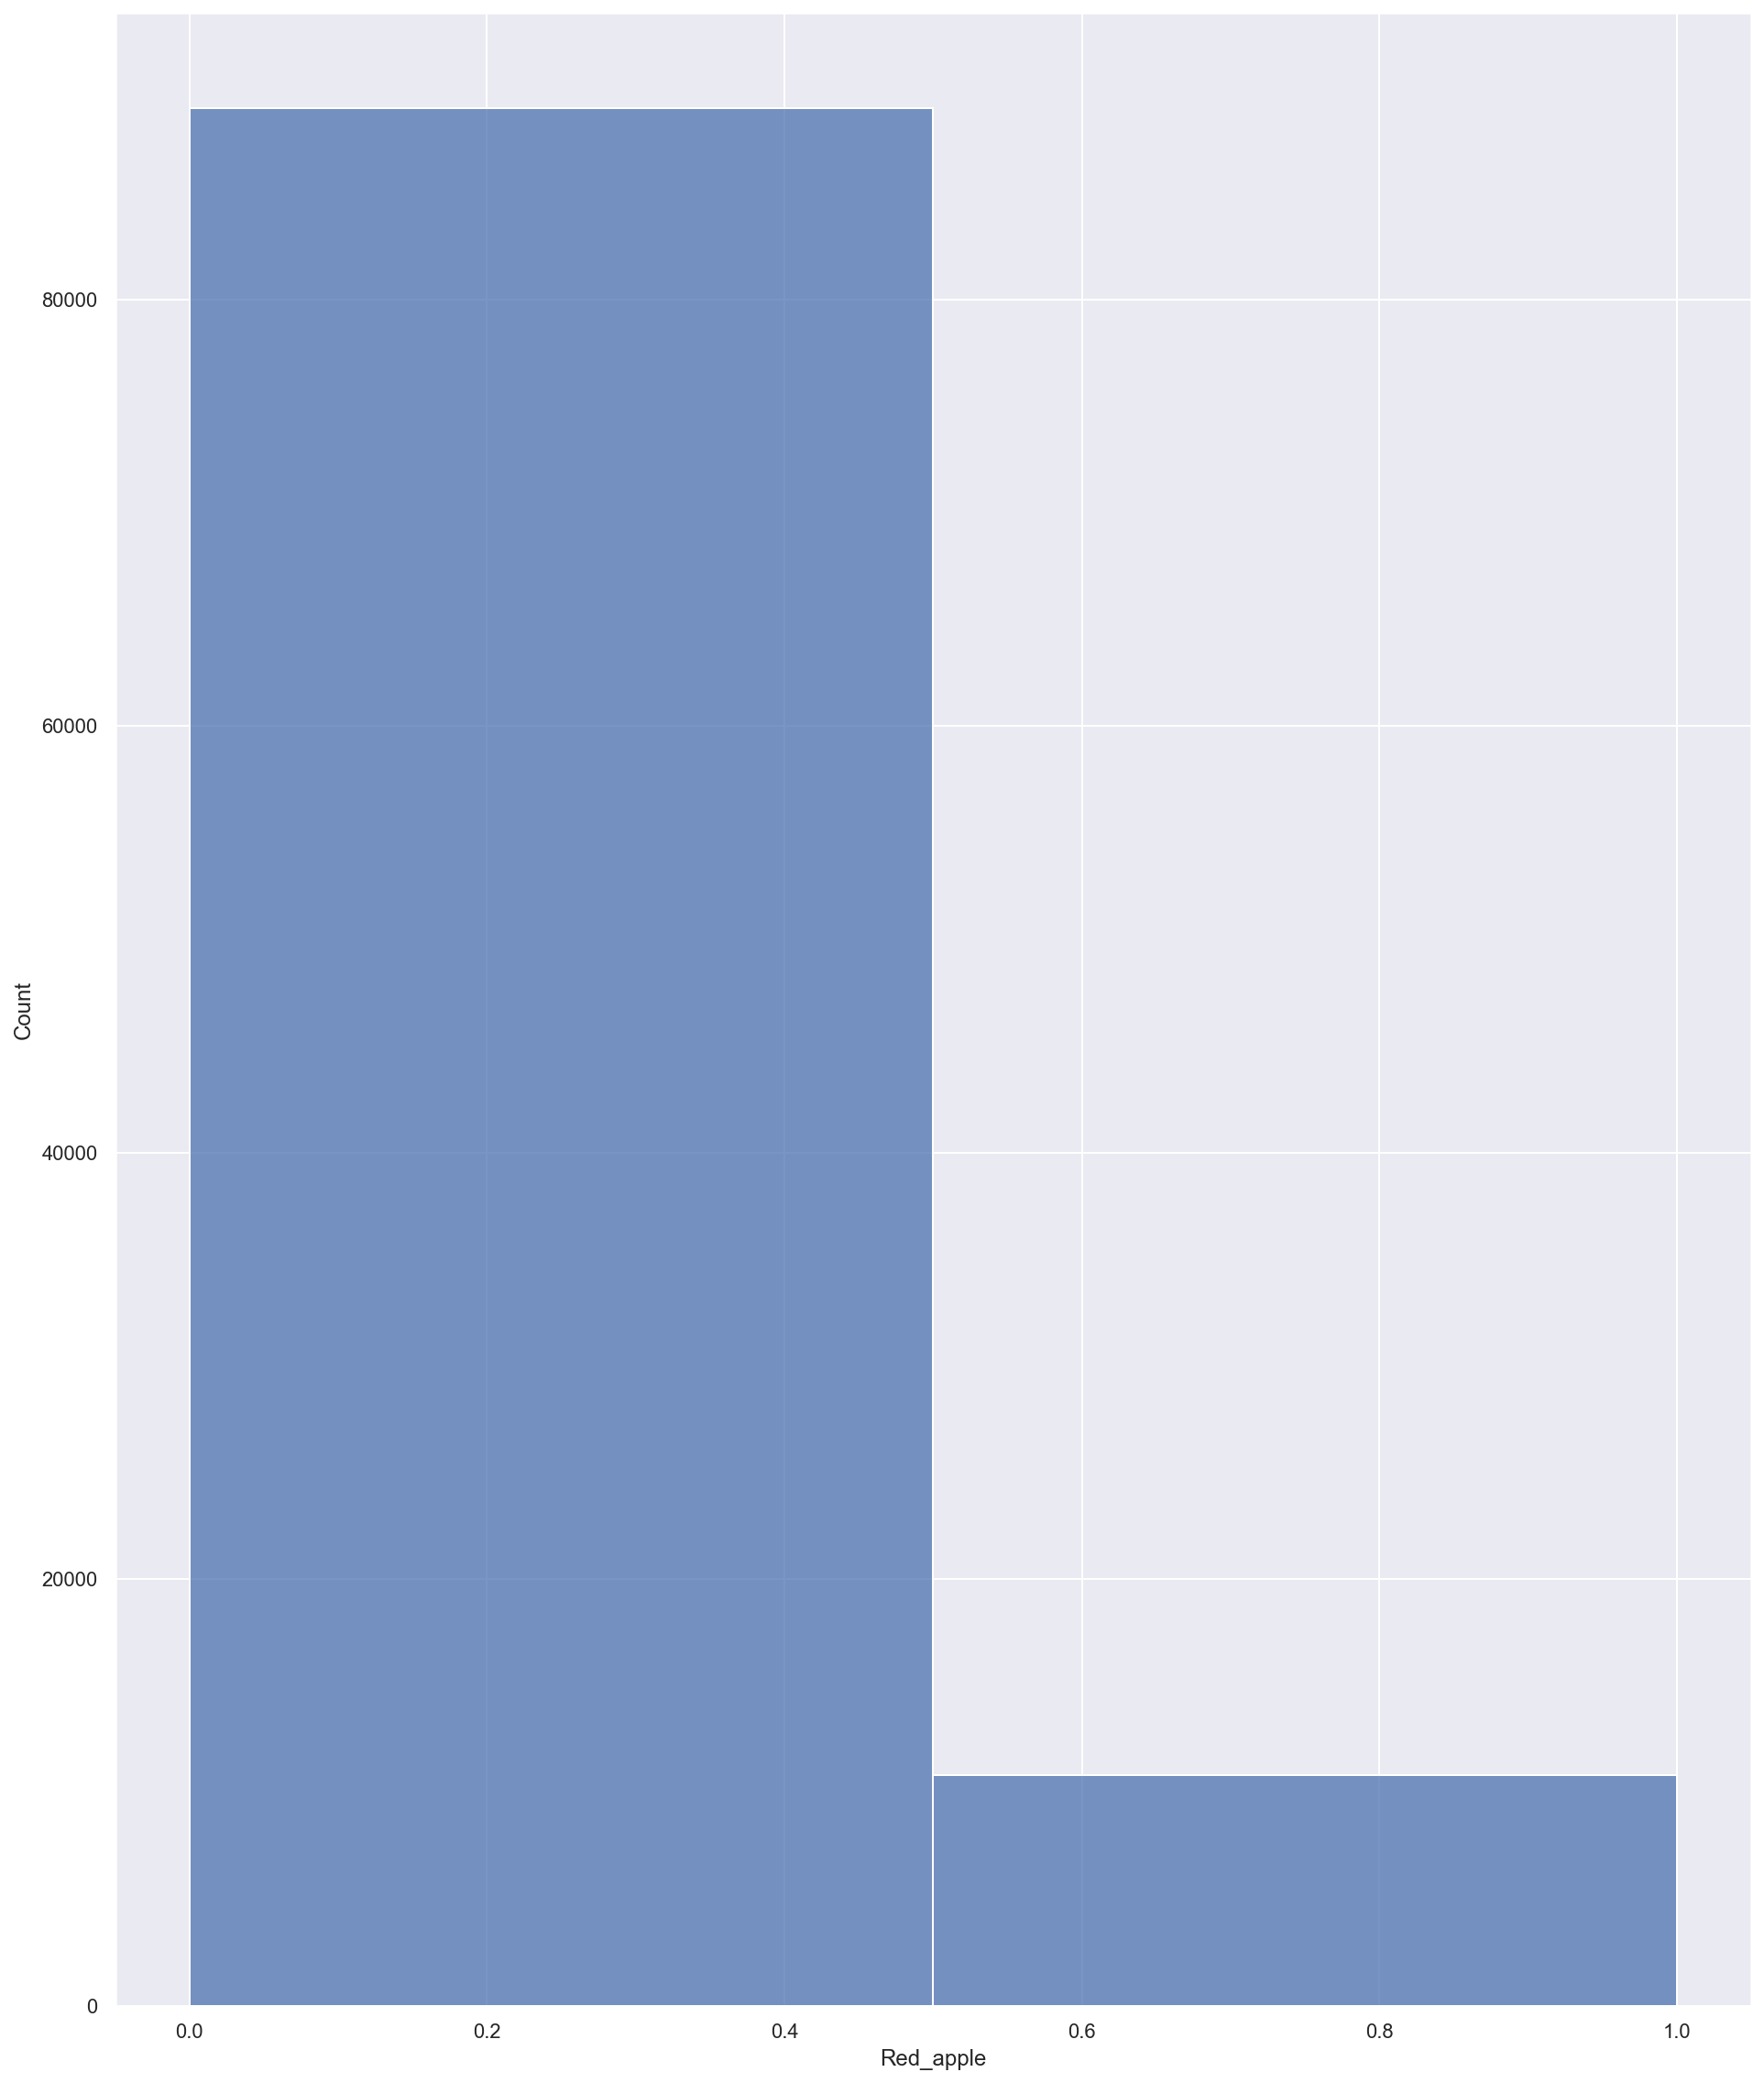

Green_apple


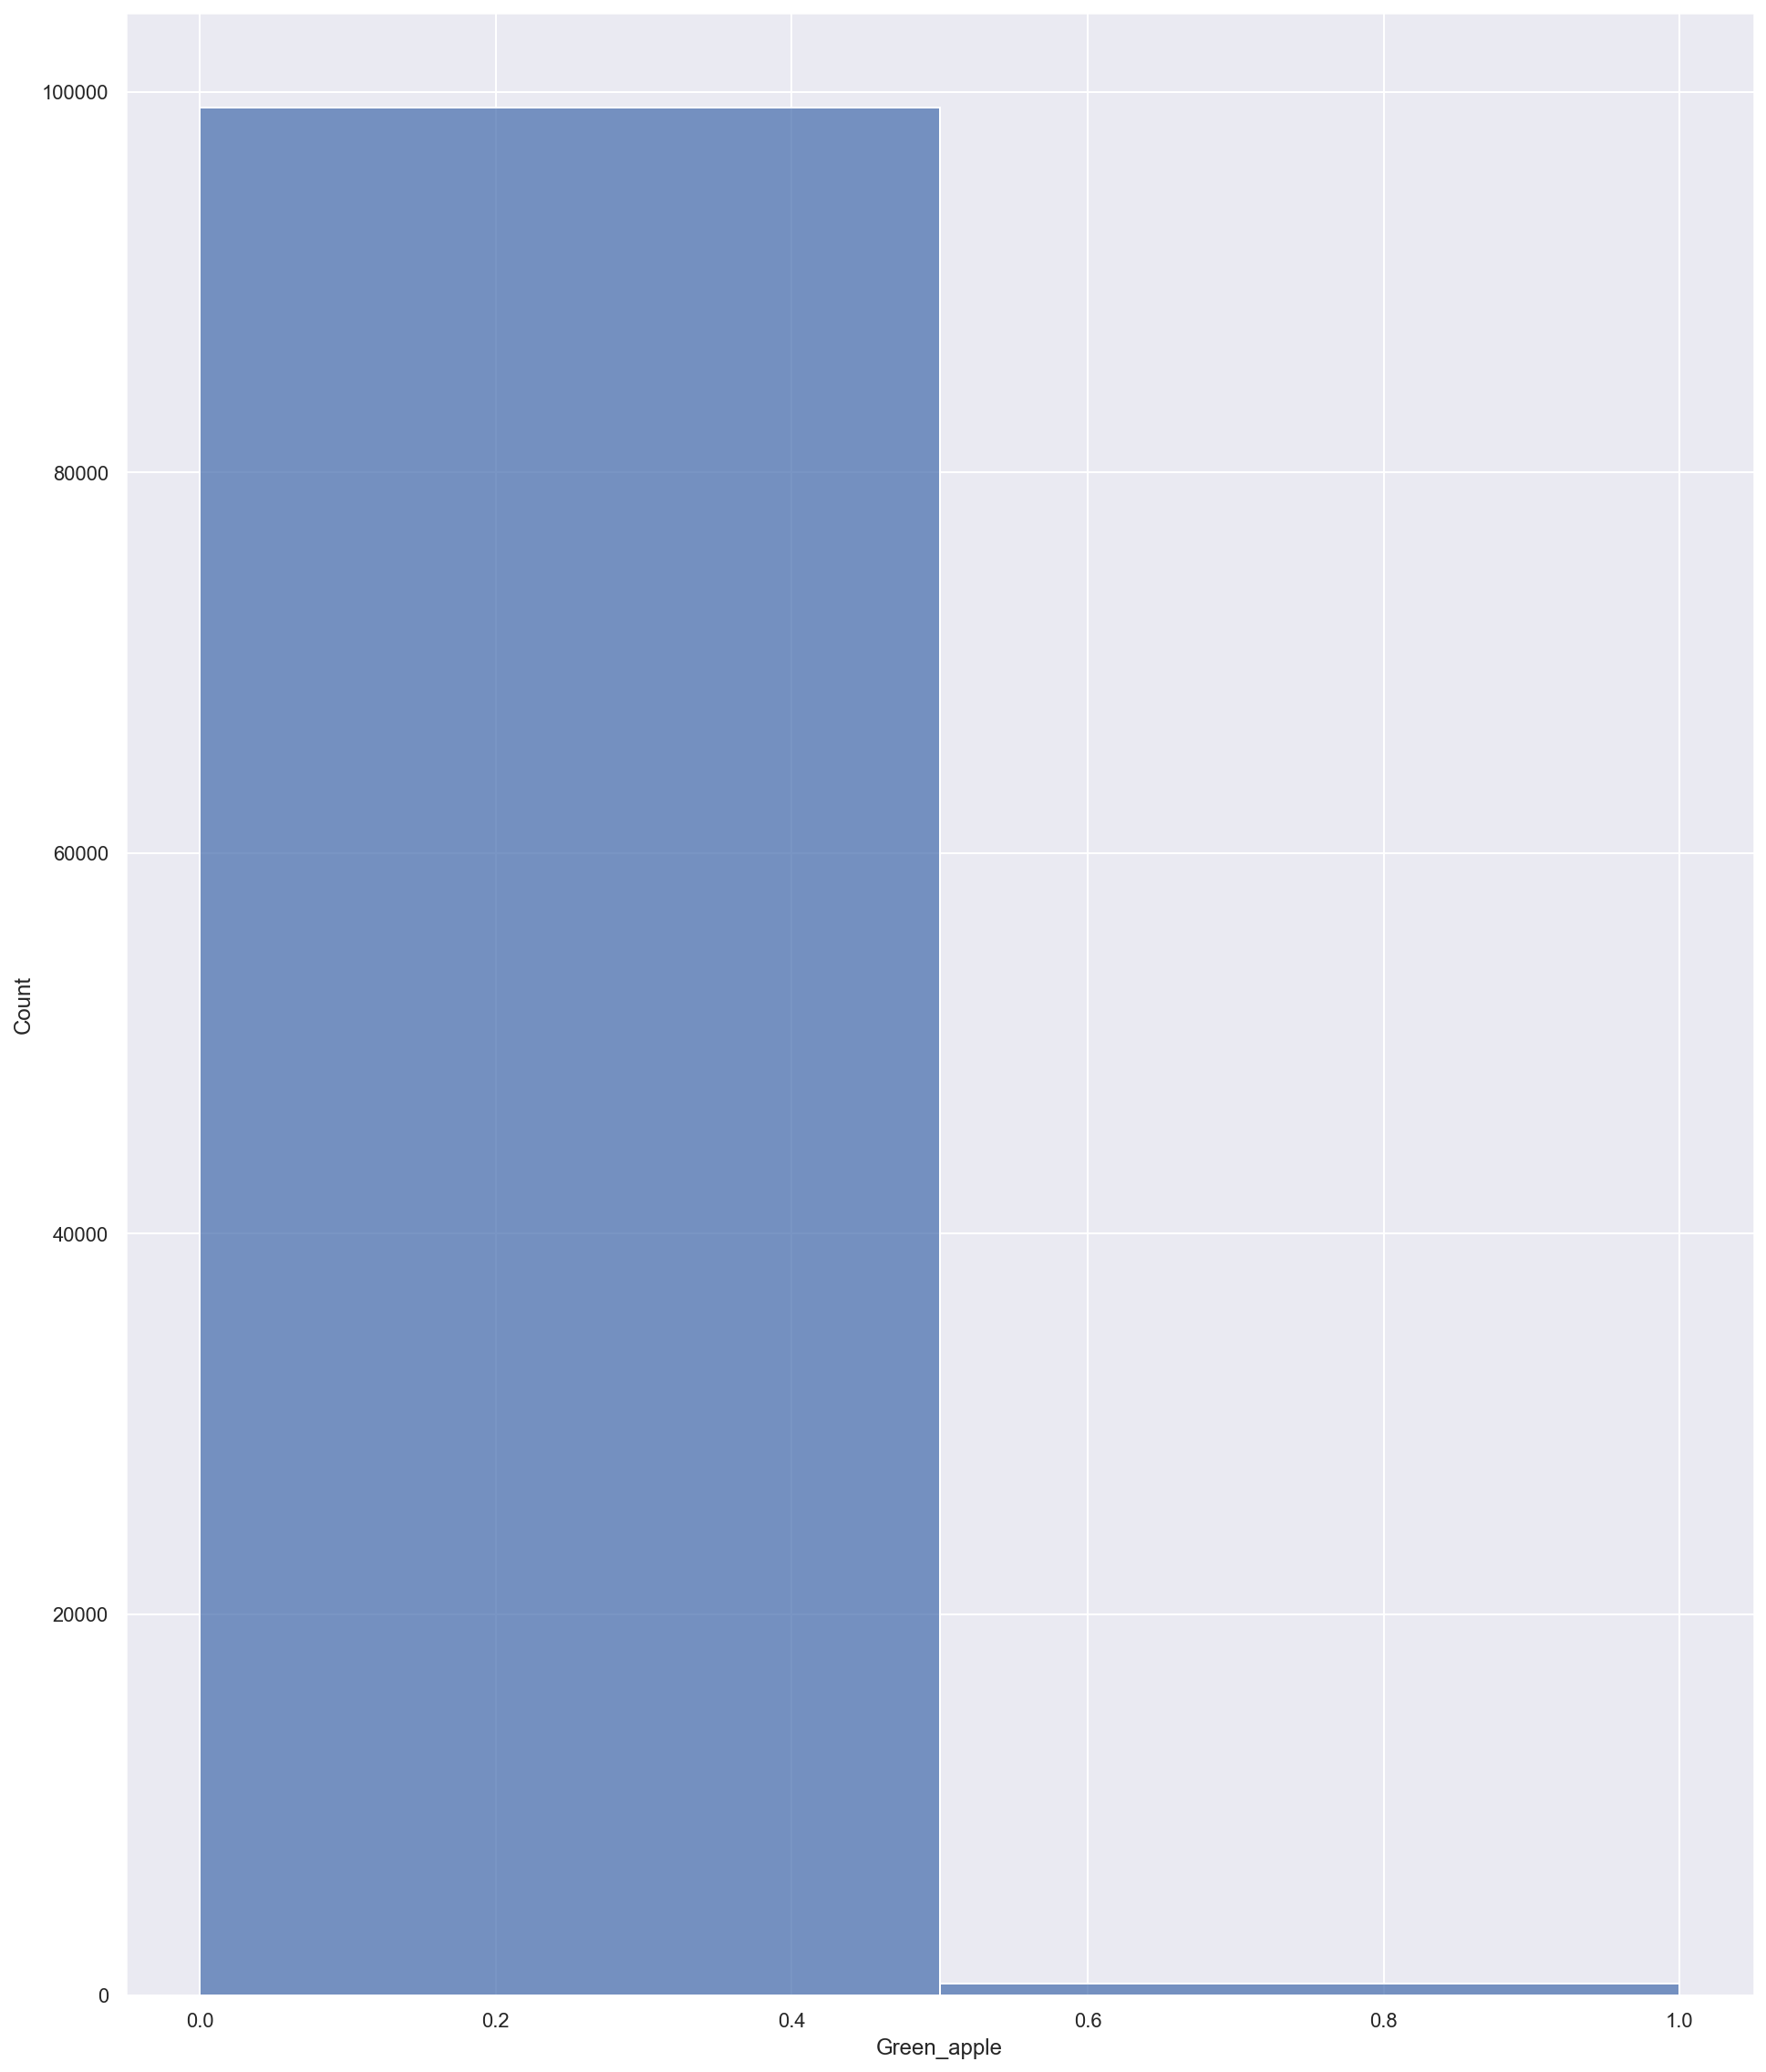

Black_apple


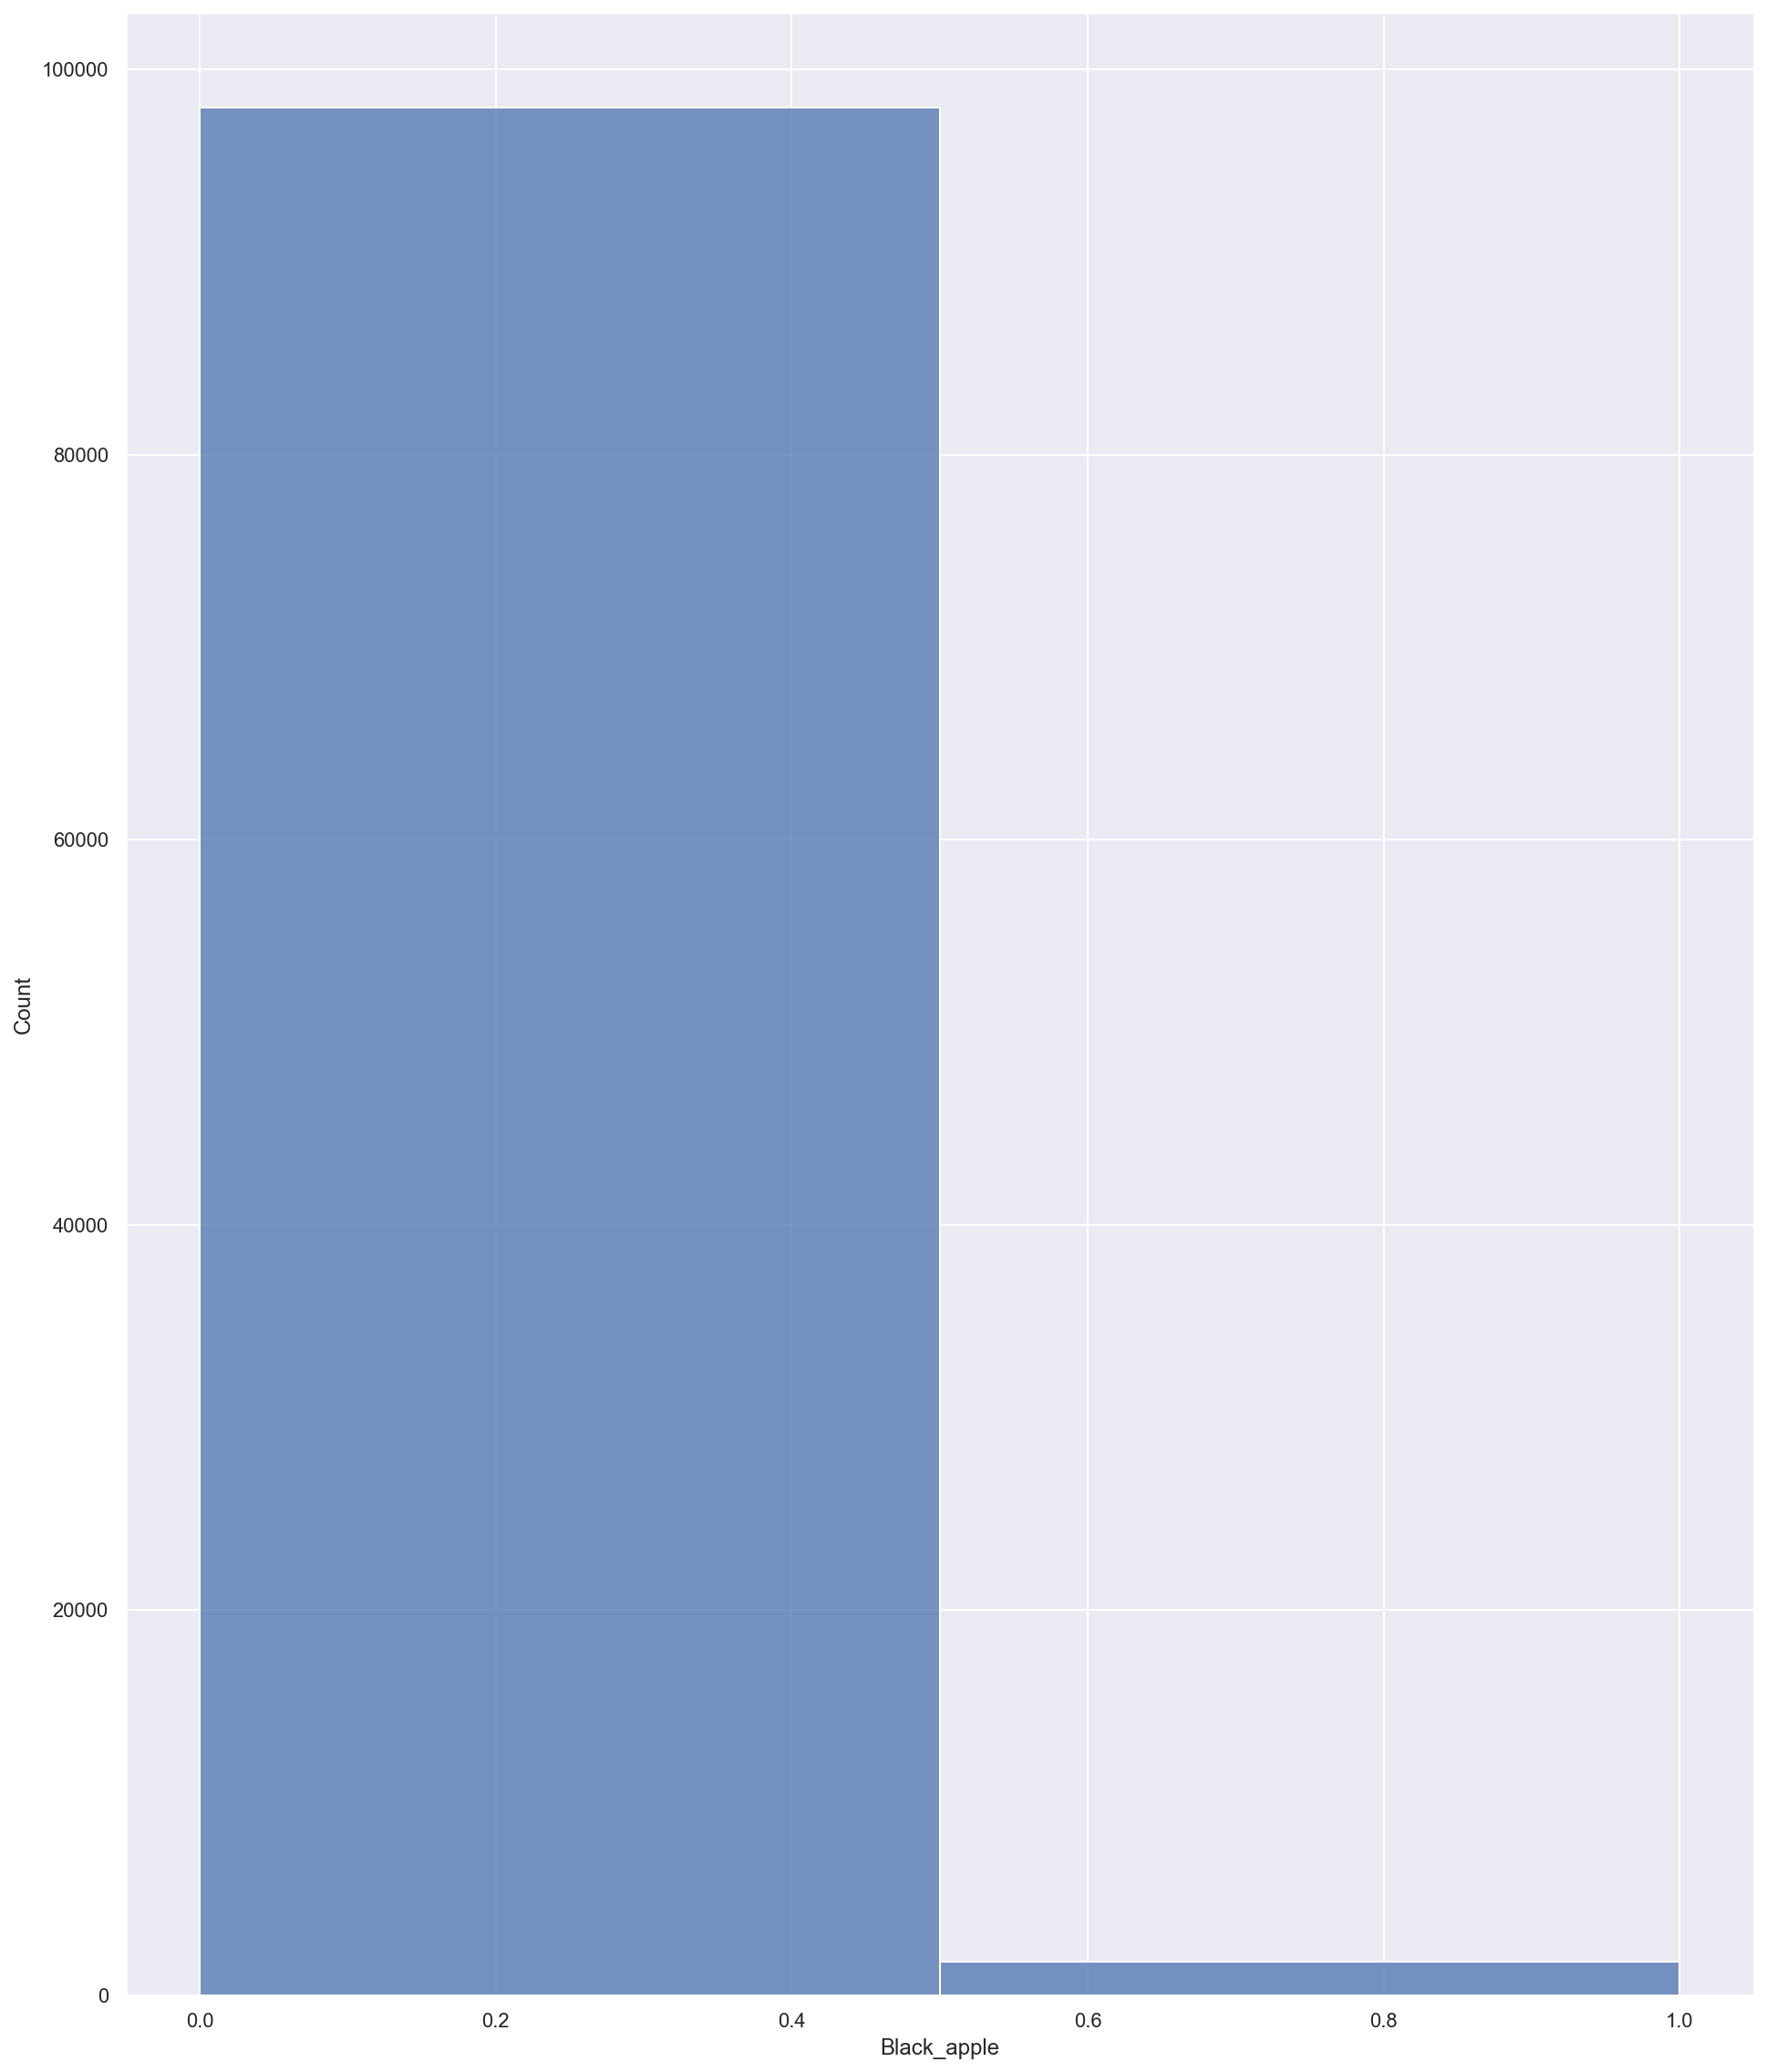

Blue_apple


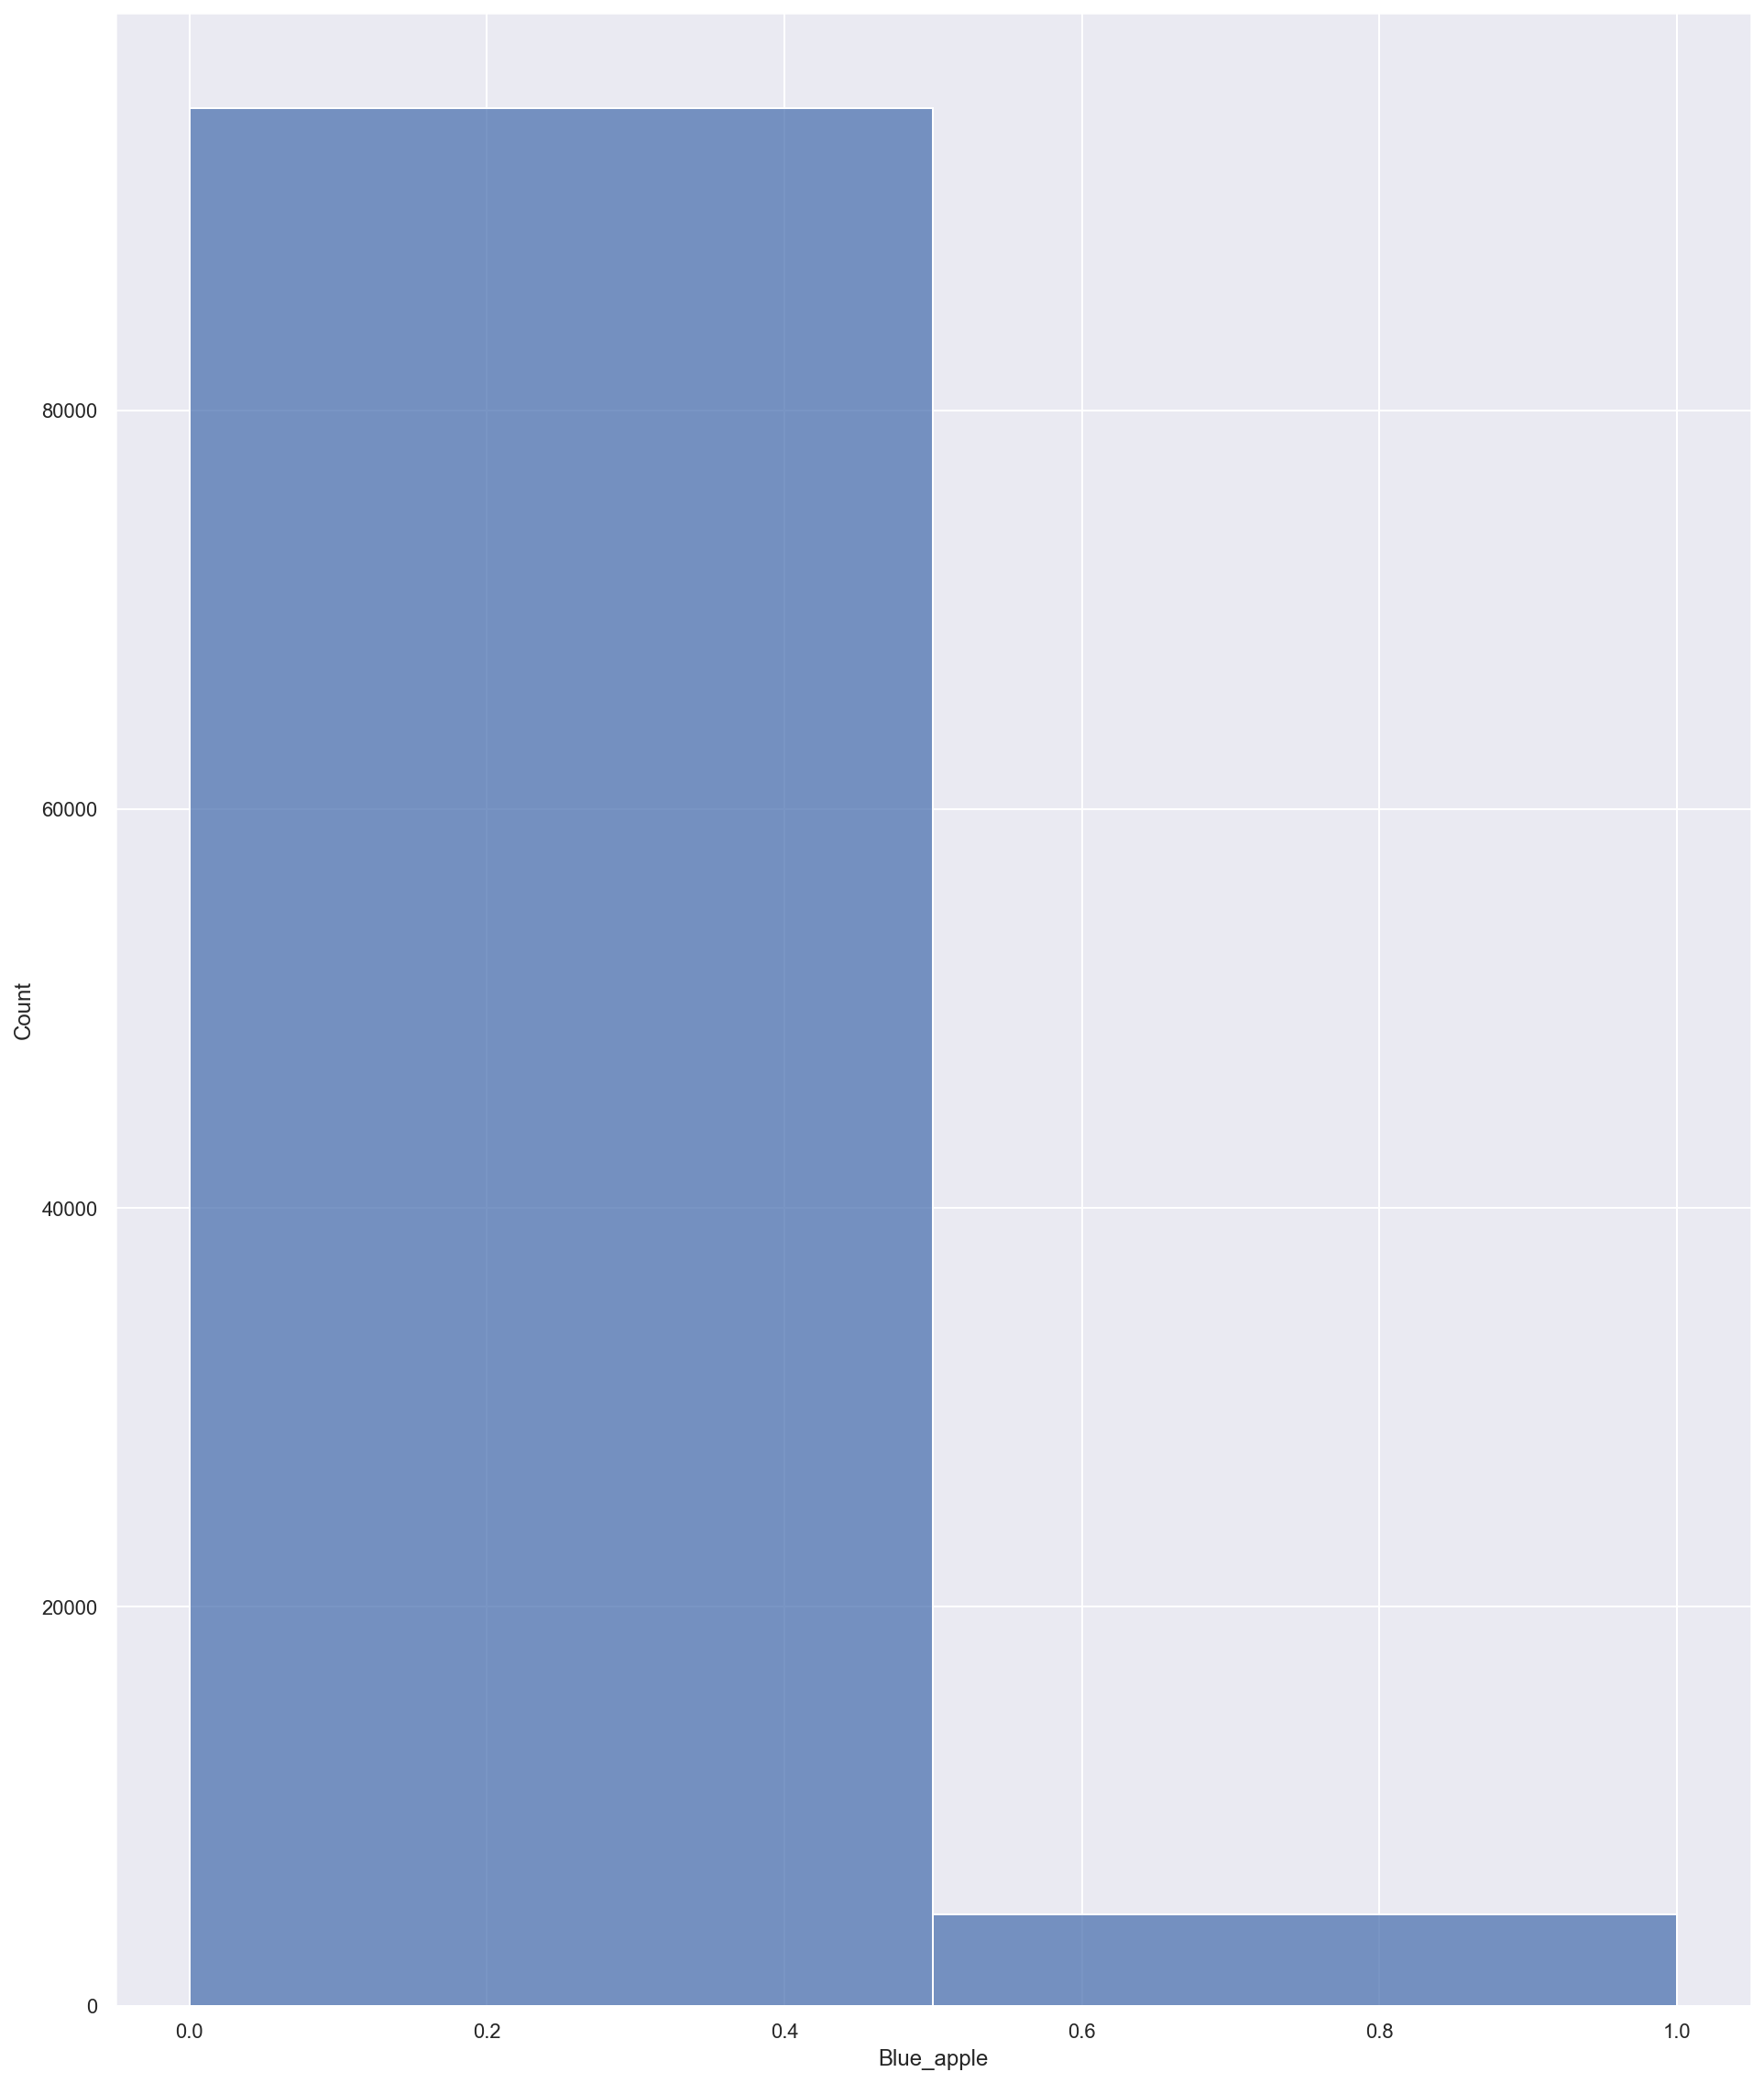

Red_web


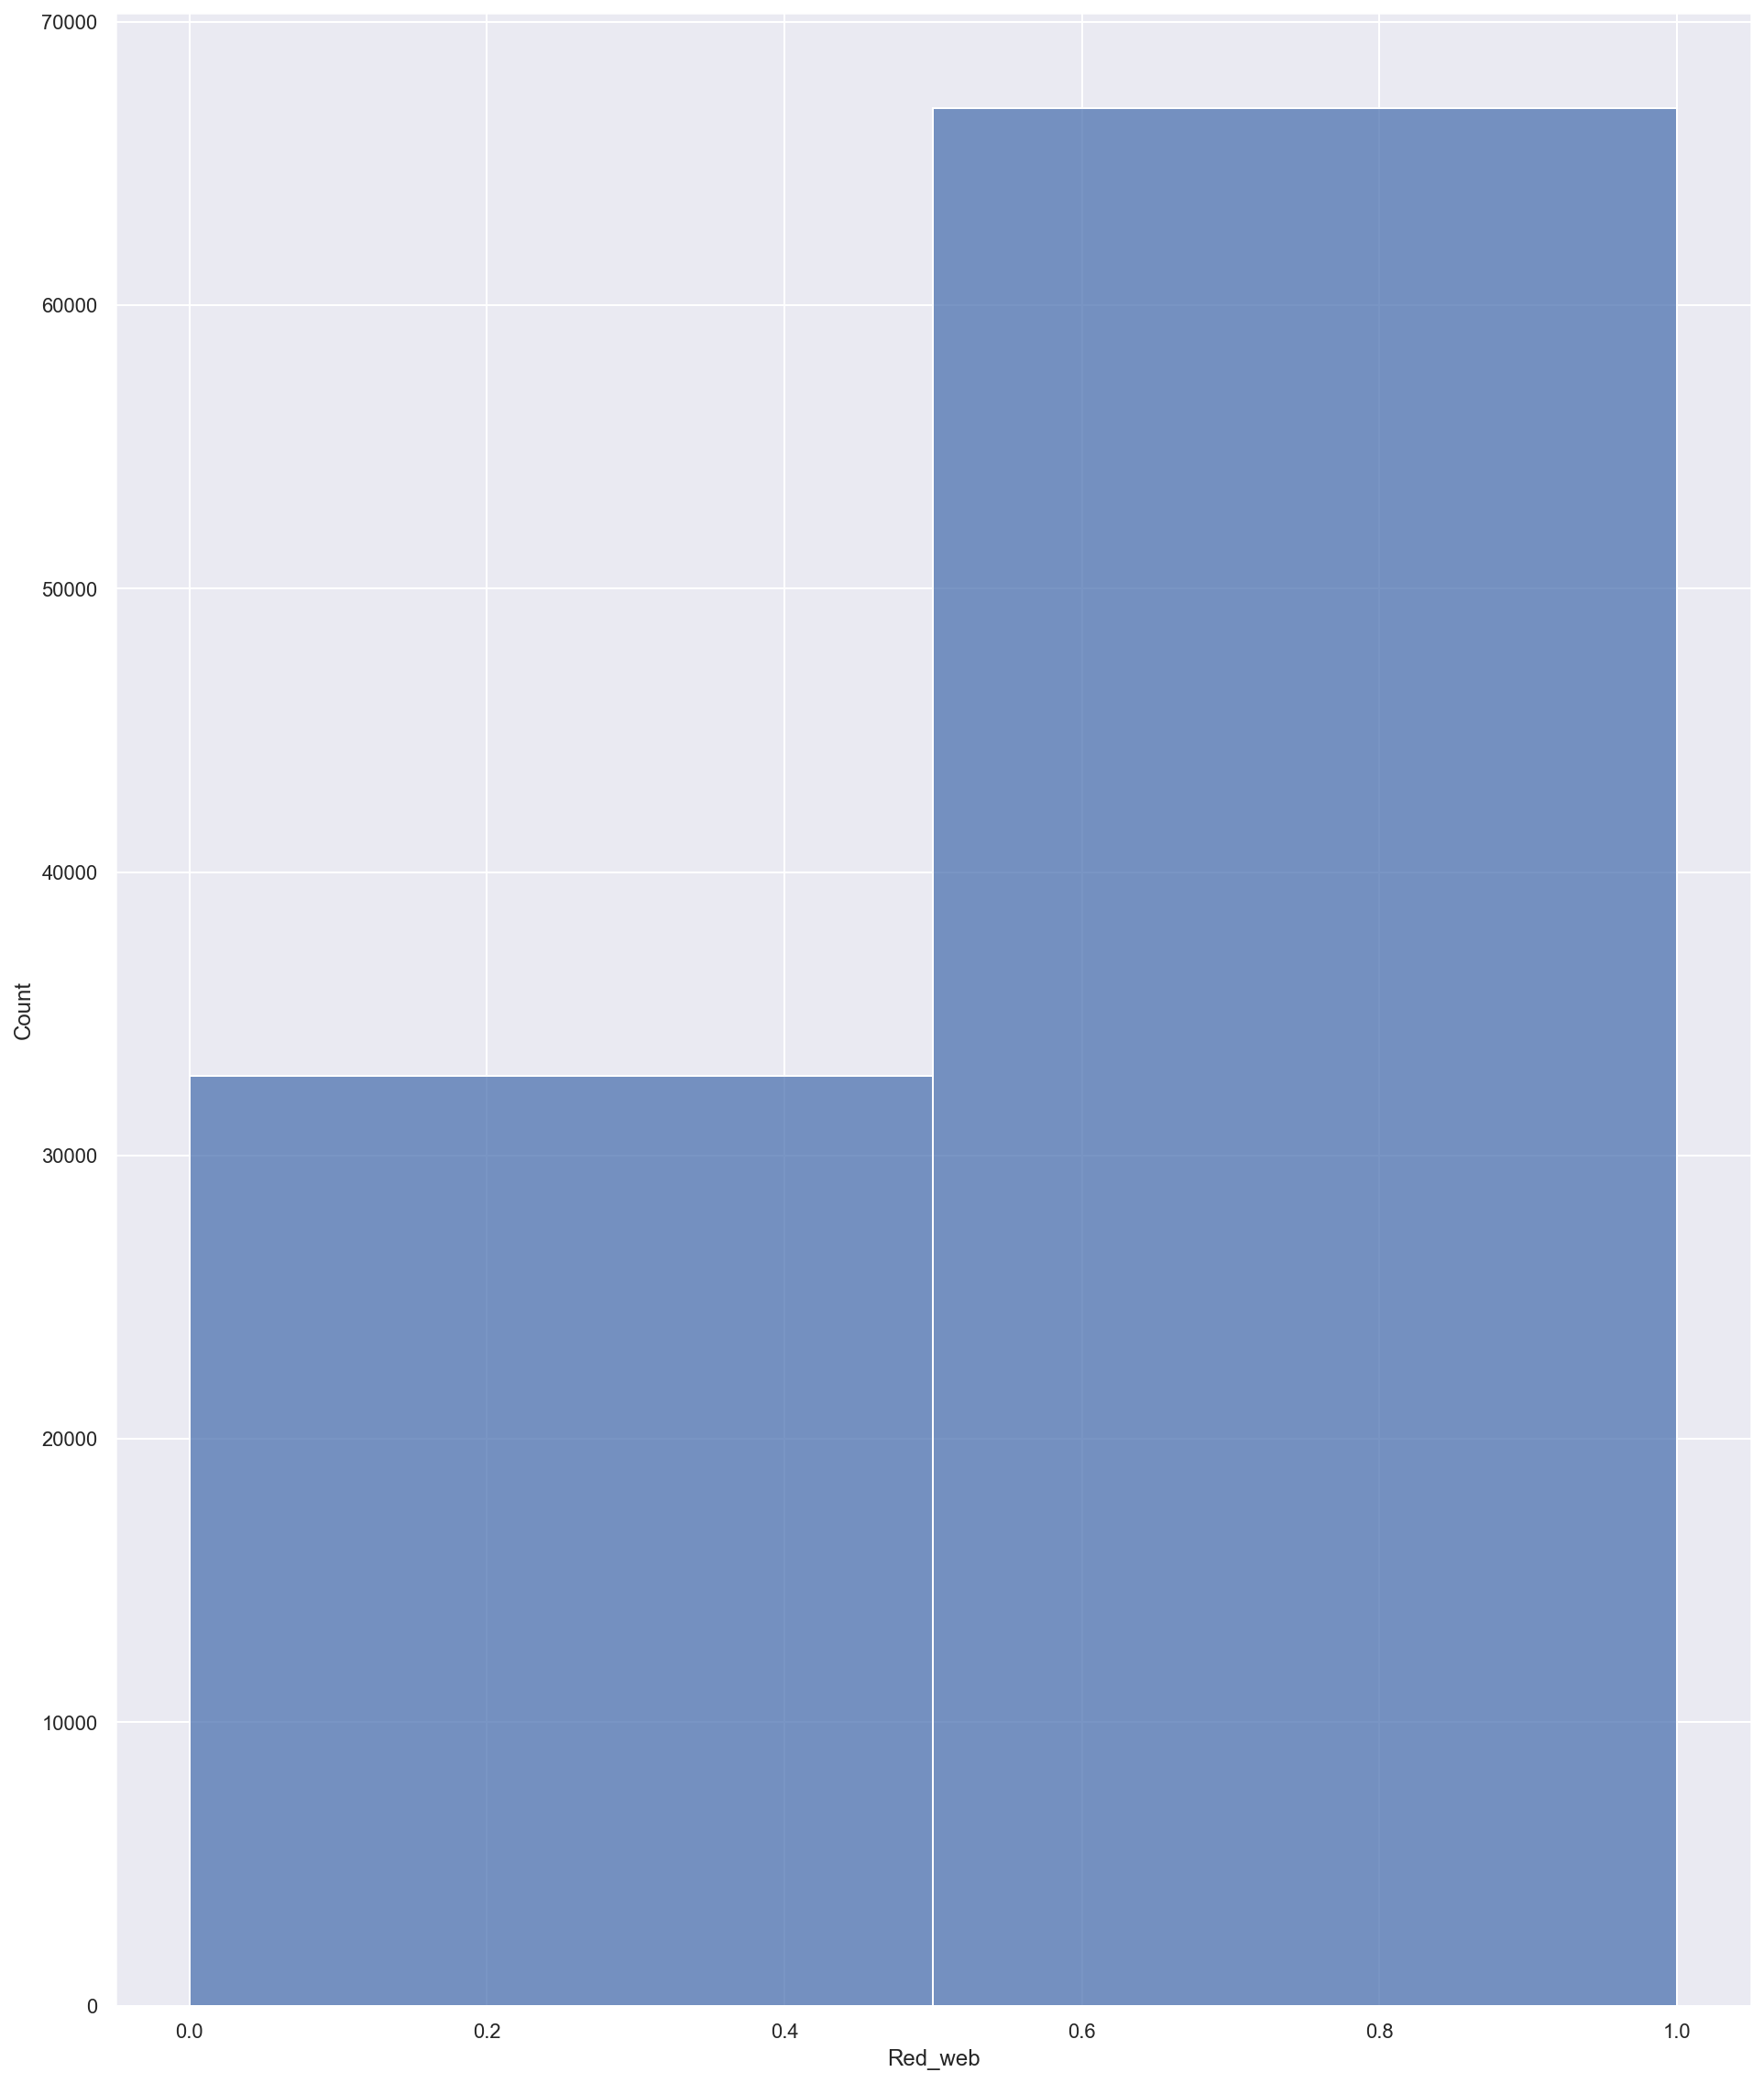

Green_web


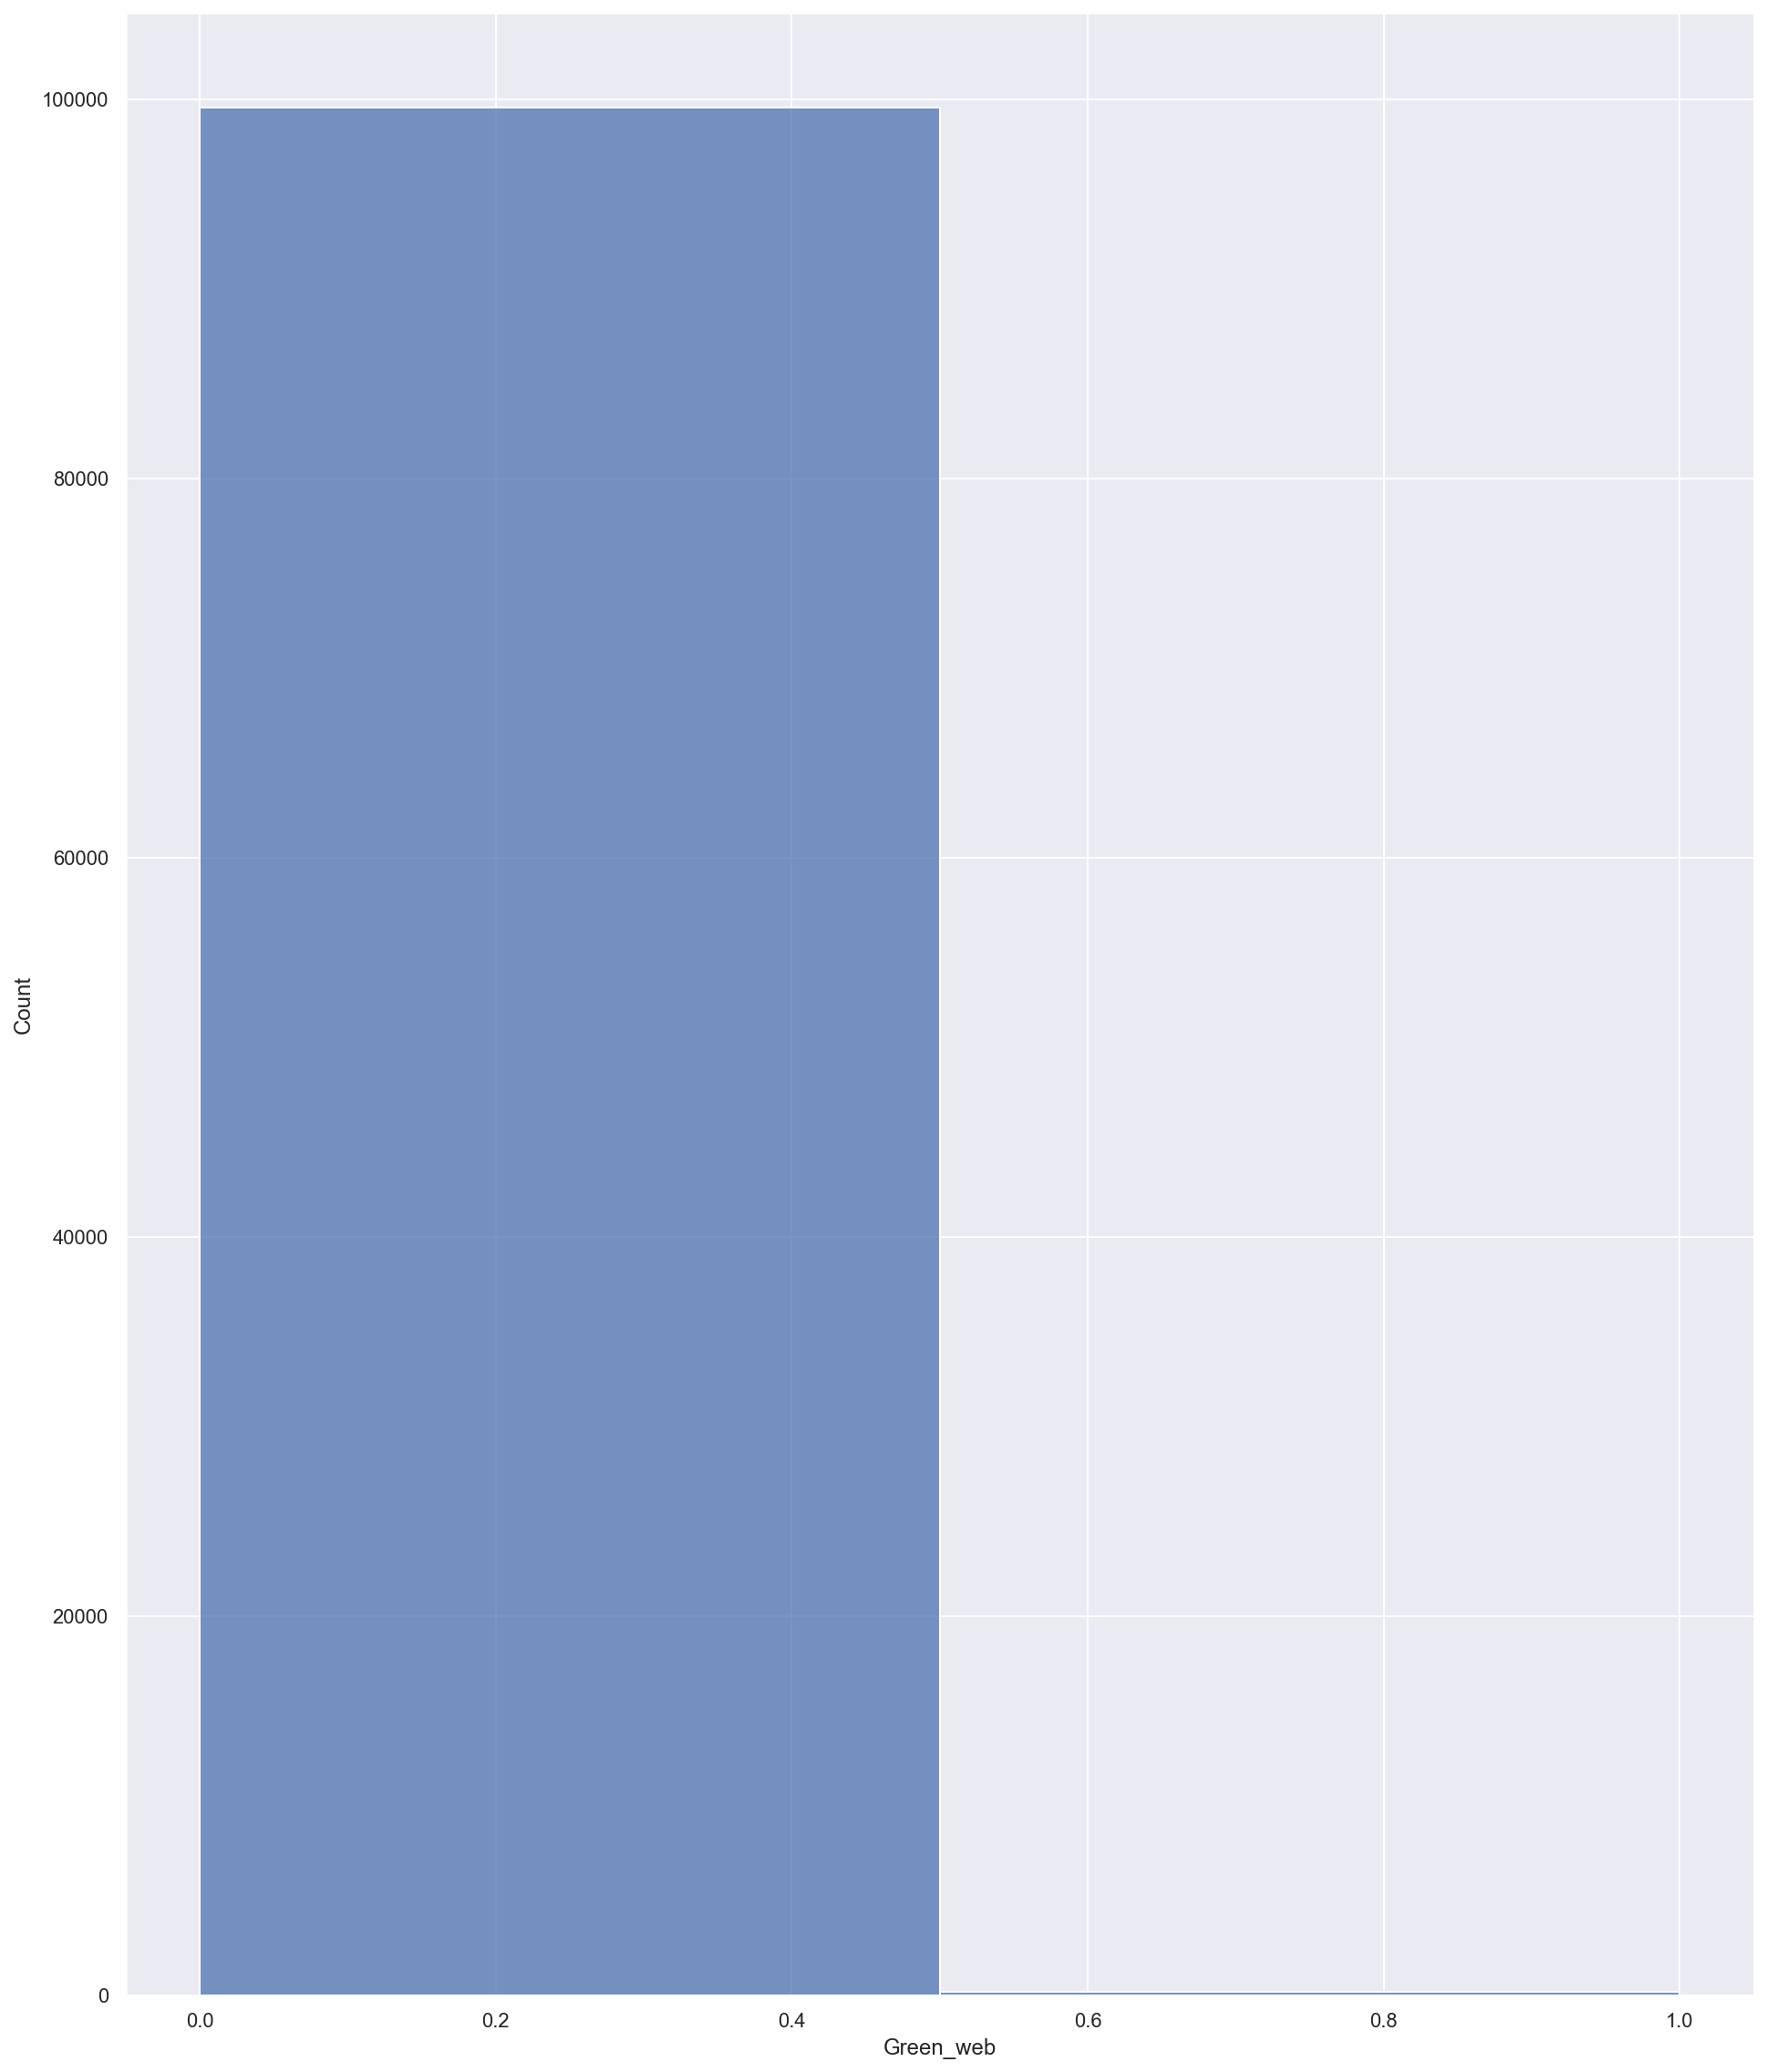

Black_web


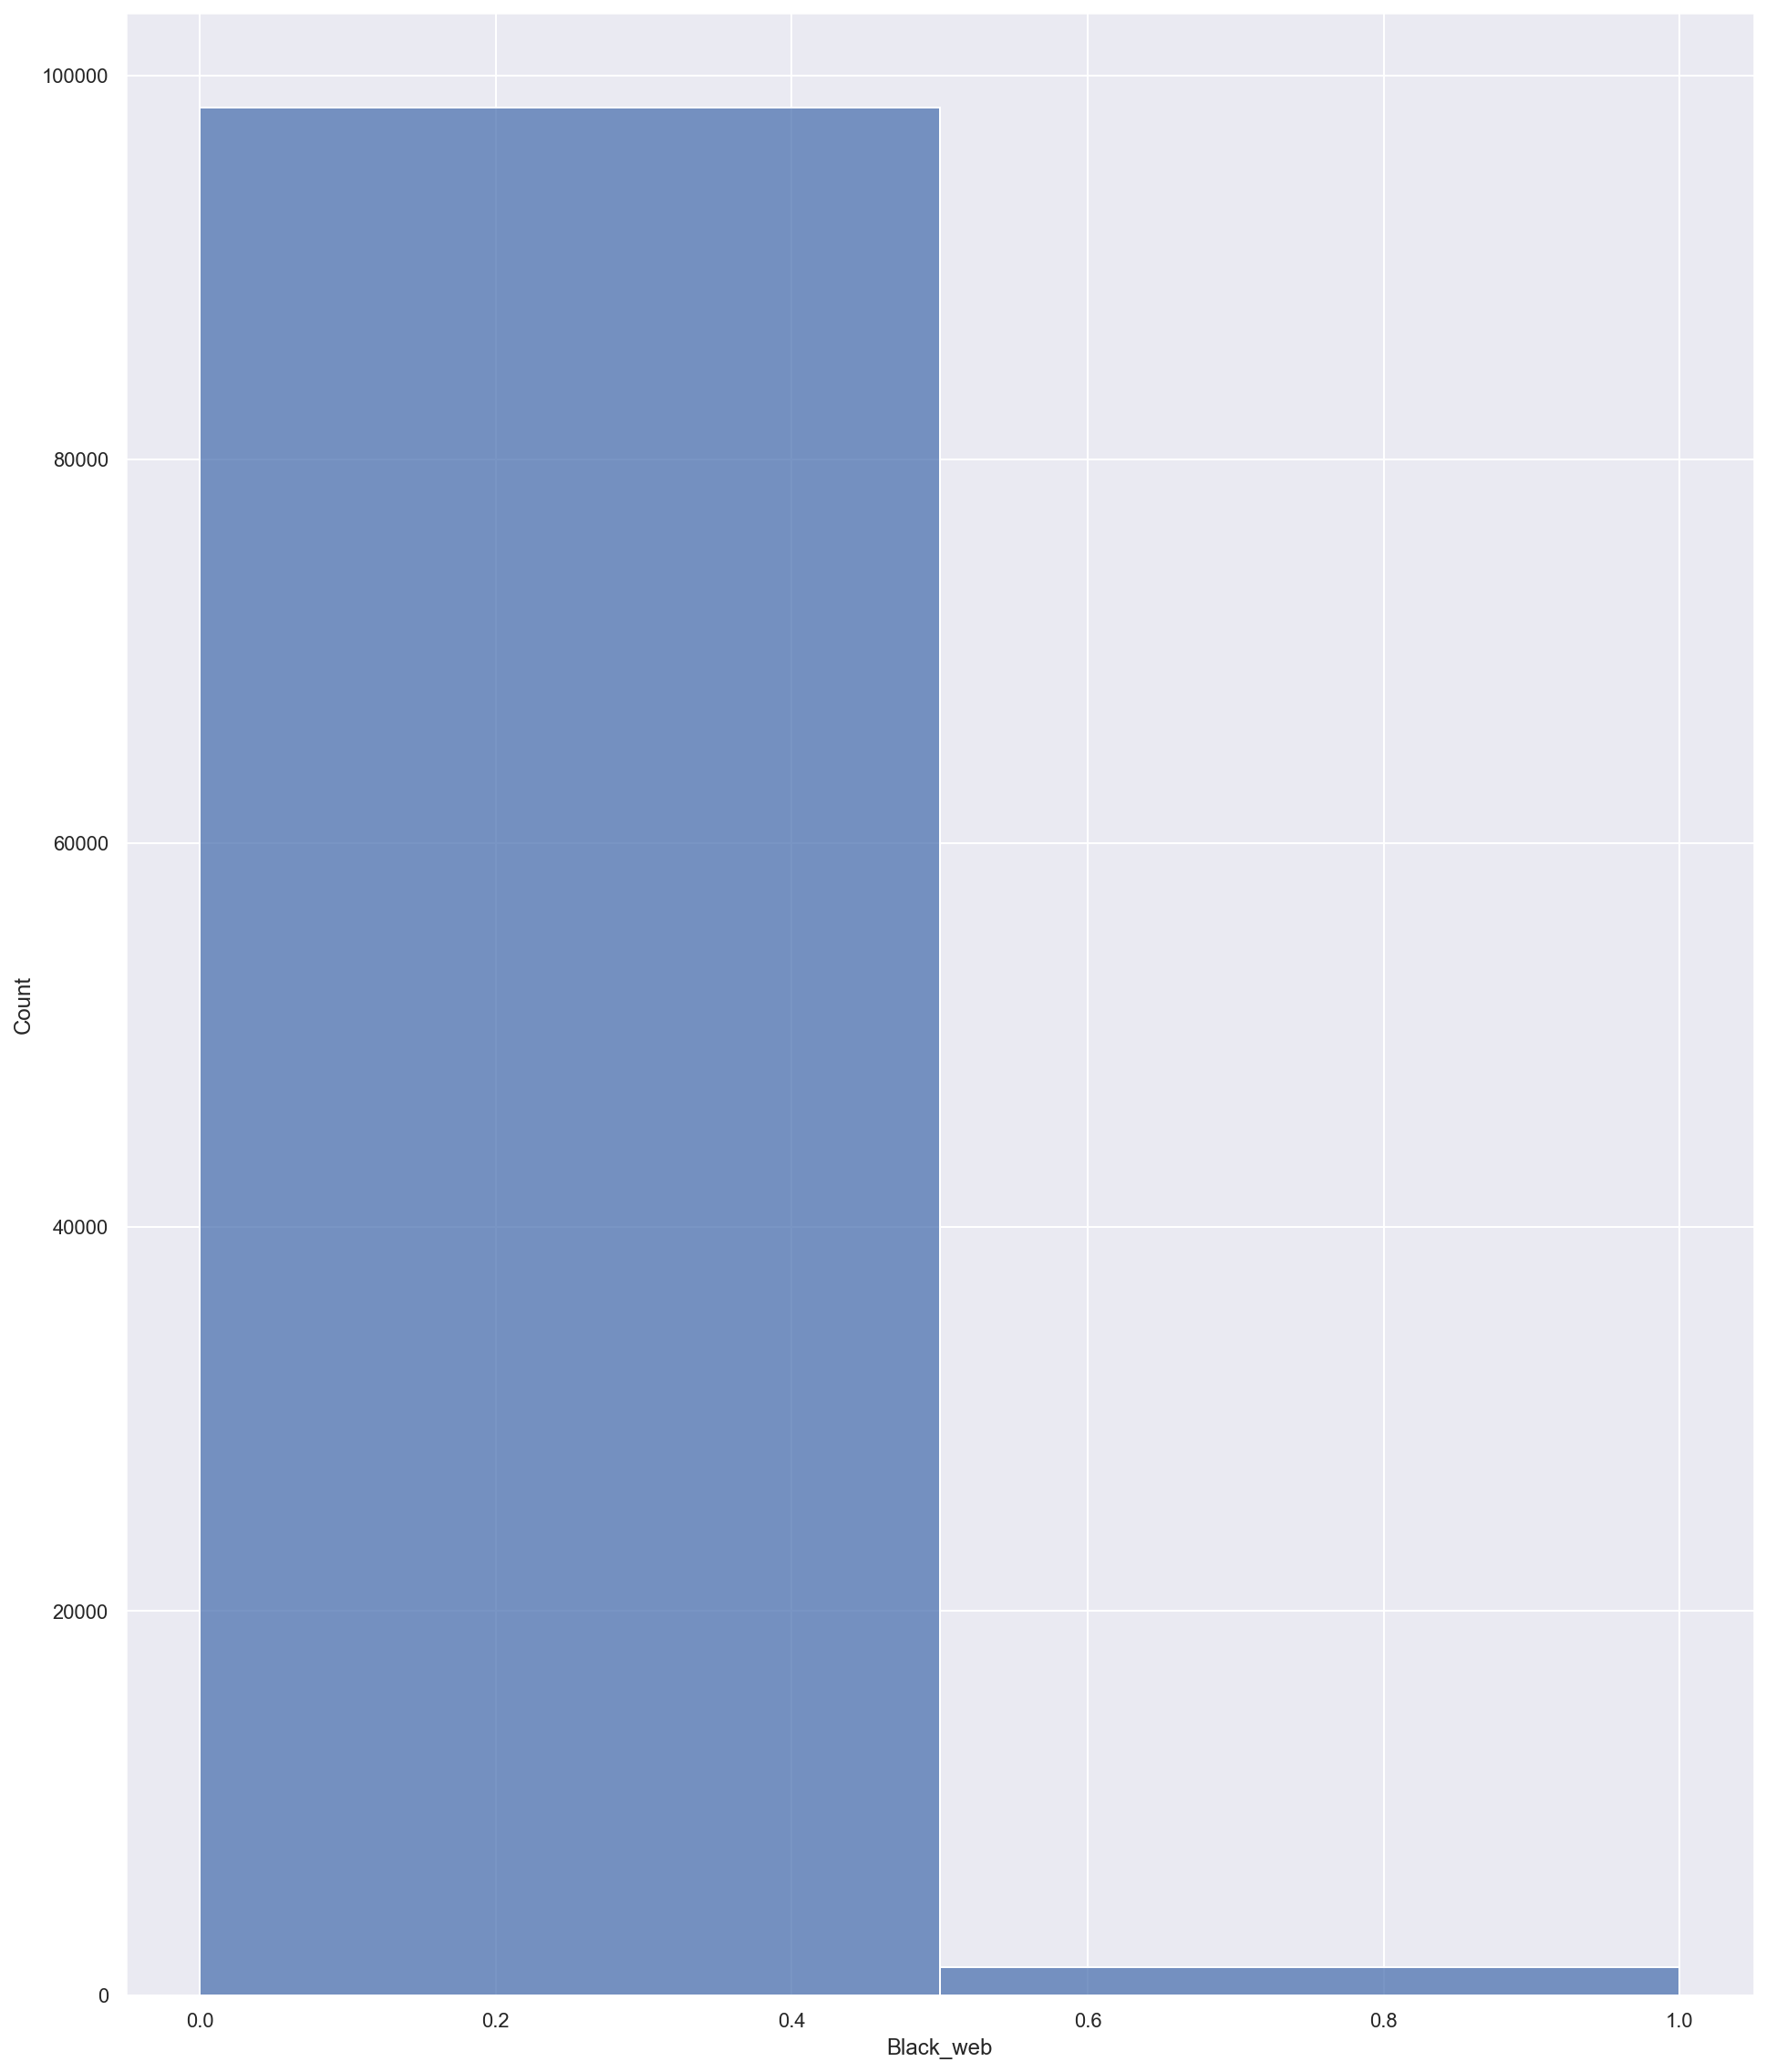

Blue_web


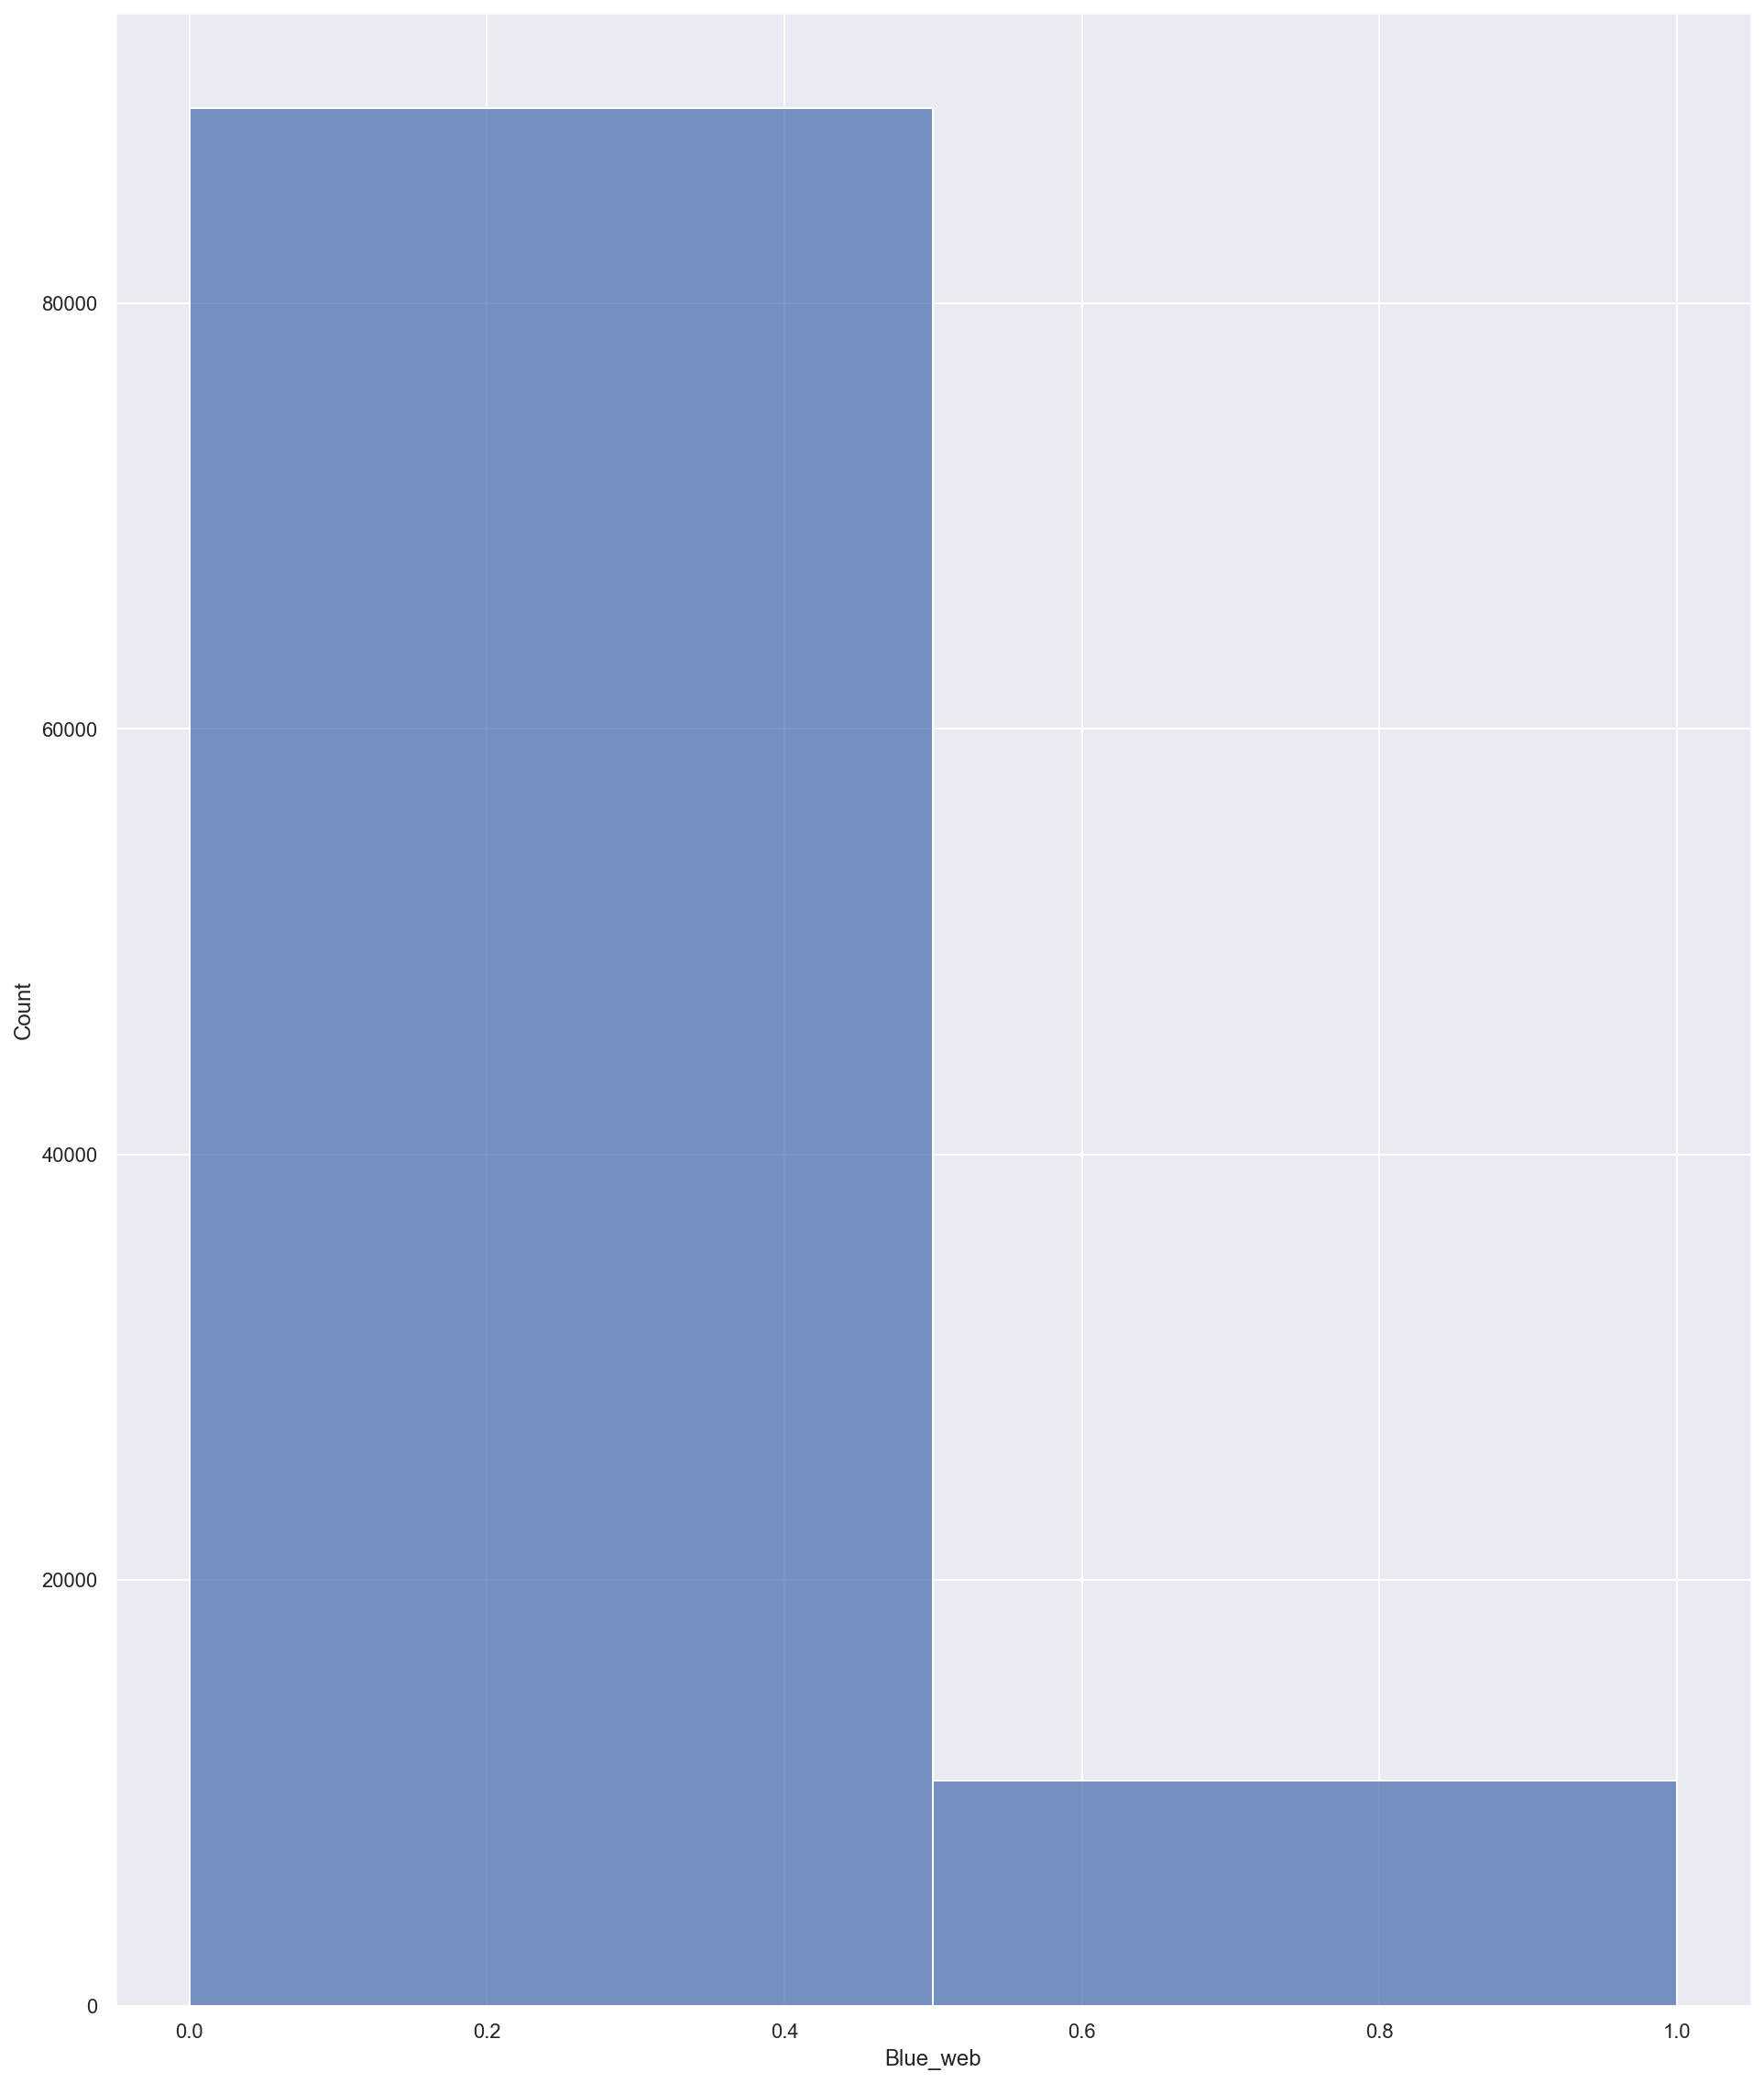

is_msk


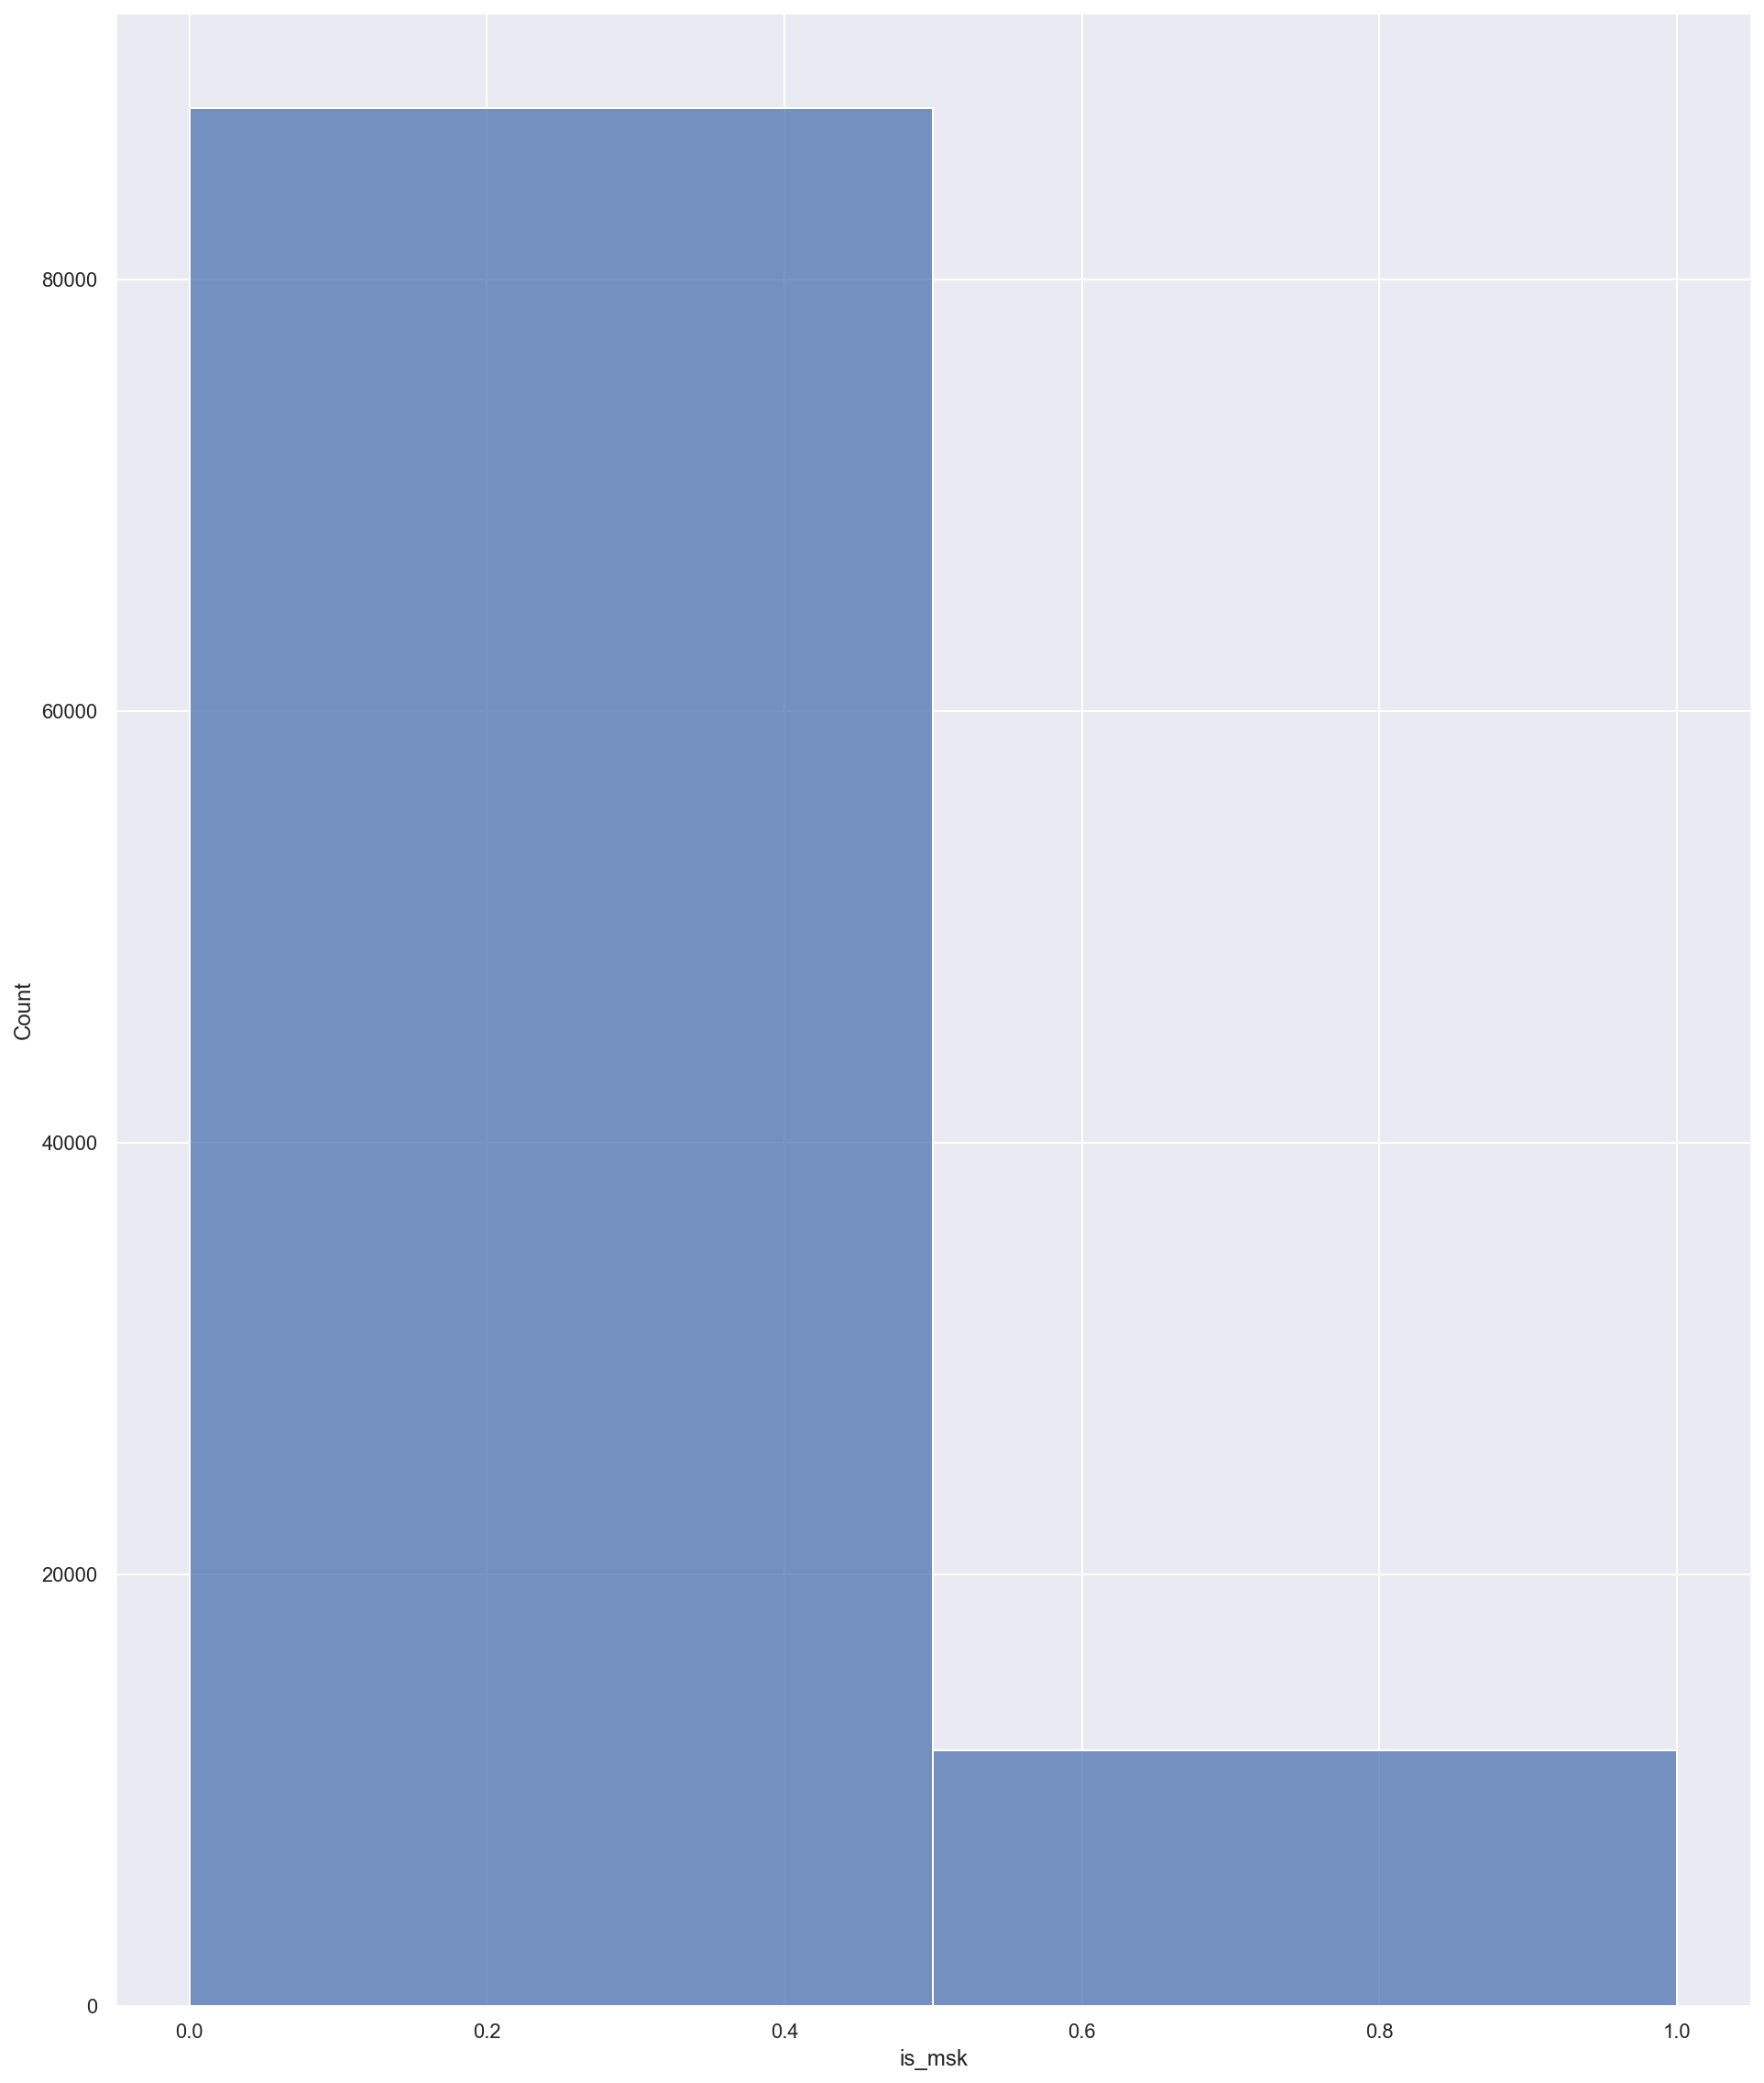

In [169]:
for x in not_numeric:
    print(x)
    sns.set(rc = {'figure.figsize':(16, 20)}) 
    sns.histplot(data=data_cleaned[x], binwidth=0.5)
    plt.show()
    #print('Value Occurence(%)')
    #print(df_vk[i].value_counts(normalize = True))
    #print()

# 3. Корреляция

<AxesSubplot:xlabel='0', ylabel='0'>

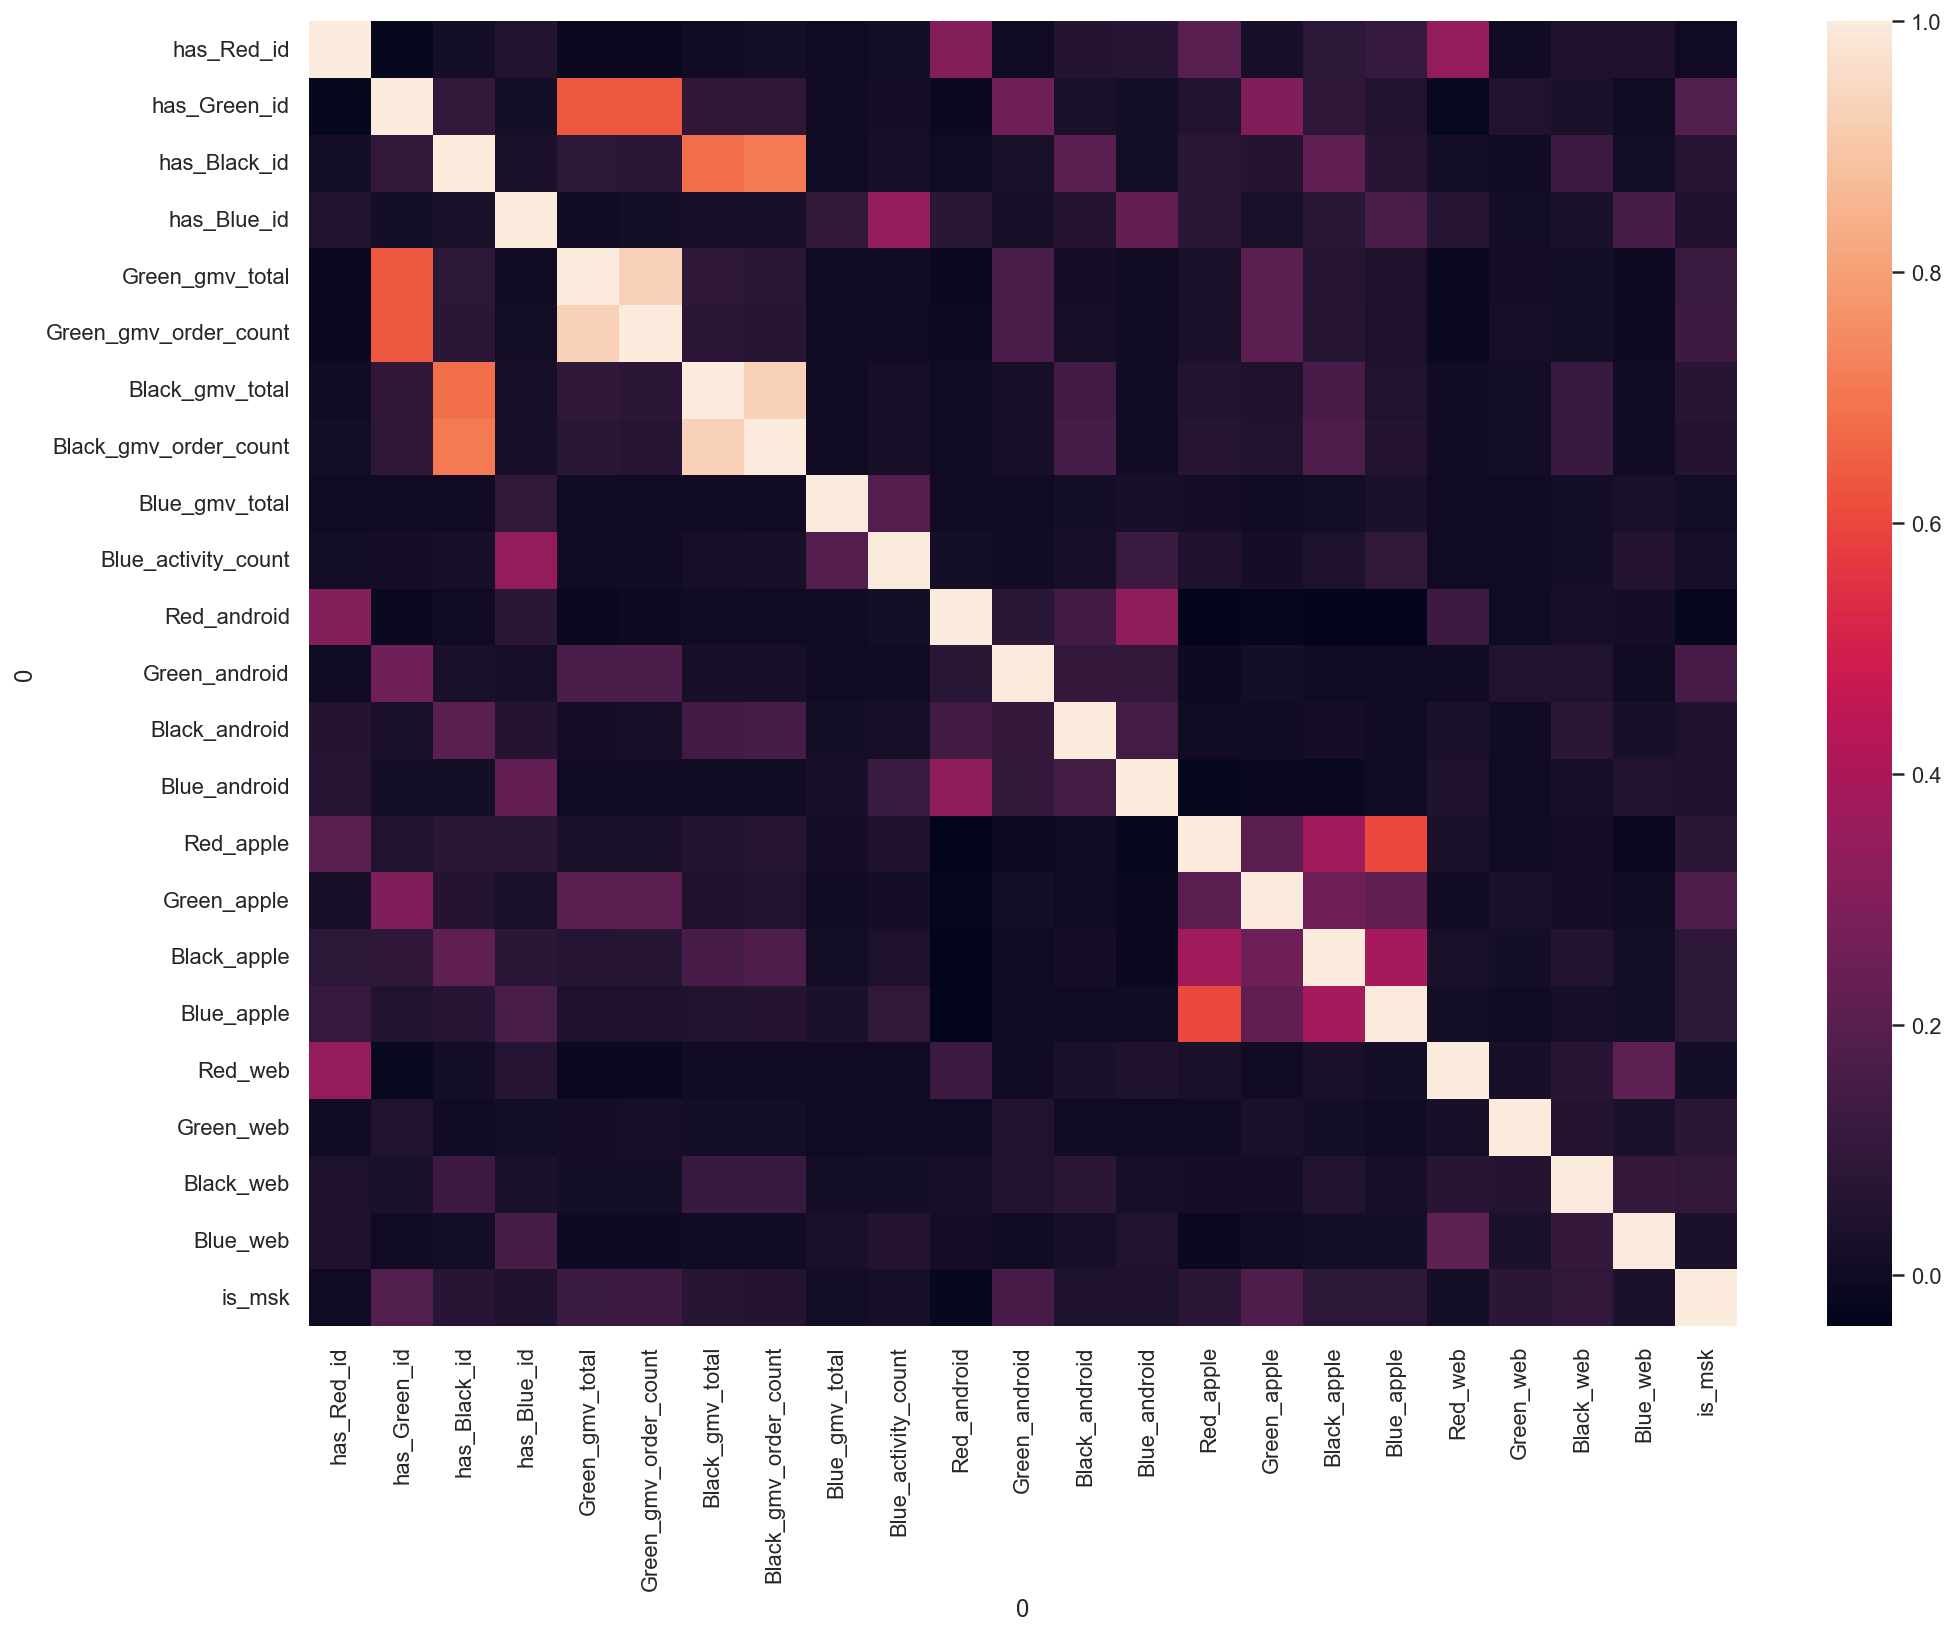

In [170]:
plt.figure(figsize=(16,12))
sns.heatmap(data_cleaned.corr())

**Заметка:** рассмотрим средние чеки по компаниям.

In [194]:
data_cleaned_black = data_cleaned[(data_cleaned['has_Black_id'] == 1.0)]
avg_purch_black = data_cleaned_black['Black_gmv_total'].mean()/data_cleaned_black['Black_gmv_order_count'].mean()

data_cleaned_green = data_cleaned[(data_cleaned['has_Green_id'] == 1.0)]
avg_purch_green = data_cleaned_green['Green_gmv_total'].mean()/data_cleaned_green['Green_gmv_order_count'].mean()

data_cleaned_blue = data_cleaned[(data_cleaned['has_Blue_id'] == 1.0)]
#avg_purch_blue = data_cleaned_blue['Blue_gmv_total'].mean()/data_cleaned_blue['Blue_gmv_order_count'].mean()

data_cleaned_red = data_cleaned[(data_cleaned['has_Red_id'] == 1.0)]

print('Cредний Чек в Black company:', avg_purch_black)
print('Cредний Чек в Green company', avg_purch_green)

Cредний Чек в Black company: 2155.2531066056245
Cредний Чек в Green company 818.4608457321849


In [189]:
print('Red Company')
print('Кол-во зарегистрированных пользователей:', len(data_cleaned_red))
red_andr = len(data_cleaned_red[data_cleaned_red['Red_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(red_andr/data_cleaned.shape[0] *100,2), '%')
red_apple = len(data_cleaned_red[data_cleaned_red['Red_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(red_apple/data_cleaned.shape[0] *100,2), '%')
red_web = len(data_cleaned_red[data_cleaned_red['Red_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(red_web/data_cleaned.shape[0] *100,2), '%')

Red Company
Кол-во зарегистрированных пользователей: 55750
Процент зарег. пользователей имеющих аккаунт Android: 25.11 %
Процент зарег. пользователей имеющих аккаунт Apple: 9.07 %
Процент зарег. пользователей имеющих аккаунт Web: 45.54 %


In [190]:
print('Green Company')
print('Кол-во зарегистрированных пользователей:', len(data_cleaned_green))
green_andr = len(data_cleaned_green[data_cleaned_green['Green_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(green_andr/data_cleaned.shape[0] *100,2), '%')
green_apple = len(data_cleaned_green[data_cleaned_green['Green_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(green_apple/data_cleaned.shape[0] *100,2), '%')
green_web = len(data_cleaned_green[data_cleaned_green['Green_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(green_web/data_cleaned.shape[0] *100,2), '%')

Green Company
Кол-во зарегистрированных пользователей: 833
Процент зарег. пользователей имеющих аккаунт Android: 0.17 %
Процент зарег. пользователей имеющих аккаунт Apple: 0.21 %
Процент зарег. пользователей имеющих аккаунт Web: 0.02 %


In [192]:
print('Black Company')
print('Кол-во зарегистрированных пользователей:', len(data_cleaned_black))
black_andr = len(data_cleaned_black[data_cleaned_black['Black_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(black_andr/data_cleaned.shape[0] *100,2), '%')
black_apple = len(data_cleaned_black[data_cleaned_black['Black_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(green_apple/data_cleaned.shape[0] *100,2), '%')
black_web = len(data_cleaned_black[data_cleaned_black['Black_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(black_web/data_cleaned.shape[0] *100,2), '%')

Black Company
Кол-во зарегистрированных пользователей: 1015
Процент зарег. пользователей имеющих аккаунт Android: 0.22 %
Процент зарег. пользователей имеющих аккаунт Apple: 0.21 %
Процент зарег. пользователей имеющих аккаунт Web: 0.16 %


In [195]:
print('Blue Company')
print('Кол-во зарегистрированных пользователей:', len(data_cleaned_blue))
blue_andr = len(data_cleaned_blue[data_cleaned_blue['Blue_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(black_andr/data_cleaned.shape[0] *100,2), '%')
blue_apple = len(data_cleaned_blue[data_cleaned_blue['Blue_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(blue_apple/data_cleaned.shape[0] *100,2), '%')
blue_web = len(data_cleaned_blue[data_cleaned_blue['Blue_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(blue_web/data_cleaned.shape[0] *100,2), '%')

Blue Company
Кол-во зарегистрированных пользователей: 12613
Процент зарег. пользователей имеющих аккаунт Android: 0.22 %
Процент зарег. пользователей имеющих аккаунт Apple: 1.64 %
Процент зарег. пользователей имеющих аккаунт Web: 2.78 %


-----

In [201]:
data_green = data_cleaned_green['Green_gmv_total']/data_cleaned_green['Green_gmv_order_count']


data_black = data_cleaned_black['Black_gmv_total']/data_cleaned_black['Black_gmv_order_count']


In [199]:
scipy.stats.jarque_bera(np.log(data_green))

Jarque_beraResult(statistic=89.83949537387151, pvalue=0.0)

In [202]:
scipy.stats.jarque_bera(np.log(data_black))

Jarque_beraResult(statistic=136.57459638445064, pvalue=0.0)

**Вывод:** распределния с правой кривизной для средних чеком не являются лог-нормальными, т.к. их логарифмы не являются нормальным распредлением.

## Contingency matrix

**Комментарий:** отношения `not_numeric` показателей нужно использовать матрицу - Contingency matrix.

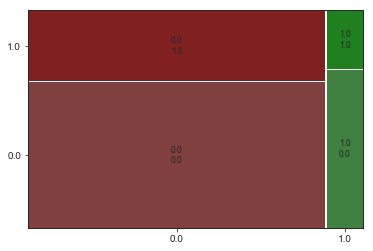

In [15]:
mosaic(data, ['Red_apple', 'Red_android']) # for 4-5 combinations 
plt.show()

In [77]:
# contingency table
xTab = pd.crosstab(data['Red_apple'], data['Red_android'])
xTab

Red_android,0.0,1.0
Red_apple,,
0.0,59937,29189
1.0,7930,2944


In [13]:
# Pearson's chi2-test for independence for dicrerete and not normally distributed variables
t_chi2, pVal_chi2, _, _ = scipy.stats.chi2_contingency(xTab) 

print("Pearson's chi2-test for independence")
print("Test statistic = ", round(t_chi2,3))
print("Test p-value = ", round(pVal_chi2,3))

Pearson's chi2-test for independence
Test statistic =  142.941
Test p-value =  0.0


In [78]:
scipy.stats.chi2_contingency(xTab) 

(142.940999901972,
 6.0552352313982615e-33,
 1,
 array([[60487.14242, 28638.85758],
        [ 7379.85758,  3494.14242]]))